In [1]:
import sys
sys.path.insert(1, '/Users/linusrandud/Documents/UoM/ERP/MscDissertation/Deep-Opt')

In [2]:
import torch
import wandb
import json
import numpy as np
import matplotlib.pyplot as plt
import random
import uuid

/Users/linusrandud/anaconda3/envs/myenv_3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from COProblems.MKP import MKP
from COProblems.QUBO import QUBO
from Models.DOAE import DOAE
from OptimAE import OptimAEHandler

In [4]:
def check_constraints(solution, jobs):
    machine_jobs = [[], []]
    makespans = [0, 0]
    infeasible_count = 0
    
    for job_index, job_assignment in enumerate(solution):
        machine = int(job_assignment)
        job_key = job_index + 1
        job = jobs[job_key]
        machine_jobs[machine].append((job_key, job))
    
    for machine, assigned_jobs in enumerate(machine_jobs):
        current_time = 0
        for job_key, job in sorted(assigned_jobs, key=lambda x: (x[1]['deadline'], x[1]['release'])):
            if current_time < job['release']:
                current_time = job['release']
            current_time += job['duration']
            if current_time > job['deadline']:
                infeasible_count += 1
        makespans[machine] = current_time
    
    if infeasible_count > 0:
        return False, infeasible_count, makespans
    return True, infeasible_count, makespans

def find_extreme_indices(fitnesses, mode='high'):
    if mode not in ['high', 'low']:
        raise ValueError("Mode should be either 'high' or 'low'")

    if mode == 'high':
        extreme_value = max(fitnesses)
    else:
        extreme_value = min(fitnesses)

    return [i for i, value in enumerate(fitnesses) if value == extreme_value]

def convert_tensor_to_unique_np_arrays(tensor):
    np_array = tensor.numpy()
    np_array[np_array == -1] = 0
    unique_arrays = set()
    unique_np_arrays = []
    
    for arr in np_array:
        arr_tuple = tuple(arr)
        if arr_tuple not in unique_arrays:
            unique_arrays.add(arr_tuple)
            unique_np_arrays.append(arr)
    
    unique_np_array = np.array(unique_np_arrays)
    return unique_np_array

def get_solutions(population, fitnesses, mode='low'):
    return convert_tensor_to_unique_np_arrays(population[find_extreme_indices(fitnesses, mode)])

def load_jobs_from_json(file_path):
    with open(file_path, 'r') as f:
        jobs = json.load(f)
    
    # Convert keys to integers
    jobs = {int(k): v for k, v in jobs.items()}
    
    return jobs

In [5]:
# New parameter sets
# datasets = ['ssjsp_4', 'ssjsp_8', 'ssjsp_16', 'ssjsp_20']
datasets = ['ssjsp_20_s50', 'ssjsp_20_s30', 'ssjsp_20_s10']
constraint_methods = [None, 'binary', 'lagrangian']
pop_size_options = [100, 1000, 10000]

# Parameters
base_params = {
    'change_tolerance': 20,
    'problem_size': None,  # Will be set for each dataset
    'pop_size': None,
    'dropout_prob': 0.2,
    'l1_coef': 0.0001,
    'l2_coef': 0.0001,
    'learning_rate': 0.002,
    'max_depth': 6,
    'compression_ratio': 0.8,
    'problem_instance_id': 0,
    'deepest_only': True,
    'encode': True,
    'repair_solutions': True,
    'patience': 5,  # Number of iterations to wait
    'delta_mean_population': 0.1,  # Threshold for mean population change
    'check_constraints': None,
    'penalty_mult': 5
}

# Number of iterations for stability
num_iterations = 5
device = torch.device("cpu")
problem_type = 'QUBO'
use_wandb = True

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.



Starting experiments for dataset ssjsp_20_s50 with population size 100 and constraint method None
Iteration 1/5 for ssjsp_20_s50, constraint method: None, population size: 100


wandb: Currently logged in as: linusrd. Use `wandb login --relogin` to force relogin


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.009765625
Min pop fitness: -10000.0, Mean pop fitness : -9999.6298828125
Iteration 1, Depth 1, Evaluations: 2256, Mean Fitness: -9999.6299, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7900390625
Iteration 1, Depth 2, Evaluations: 4442, Mean Fitness: -9999.7900, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.990234375
Iteration 1, Depth 3, Evaluations: 6624, Mean Fitness: -9999.9902, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 1, Depth 4, Evaluations: 8725, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 1, Depth 5, Evaluations: 10825, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 1, Depth 6, Evaluations: 12925, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min

Iteration 2/5 for ssjsp_20_s50, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9999.2197265625
Min pop fitness: -10000.0, Mean pop fitness : -9999.75
Iteration 2, Depth 1, Evaluations: 2170, Mean Fitness: -9999.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.76953125
Iteration 2, Depth 2, Evaluations: 4280, Mean Fitness: -9999.7695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.76953125
Iteration 2, Depth 3, Evaluations: 6380, Mean Fitness: -9999.7695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 2, Depth 4, Evaluations: 8523, Mean Fitness: -9999.9102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 2, Depth 5, Evaluations: 10623, Mean Fitness: -9999.9102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 2, Depth 6, Evaluations: 12723, Mean Fitness: -9999.9102, Min Fitness: -10000.000

Iteration 3/5 for ssjsp_20_s50, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.2900390625
Min pop fitness: -10000.0, Mean pop fitness : -9999.4501953125
Iteration 3, Depth 1, Evaluations: 2230, Mean Fitness: -9999.4502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6298828125
Iteration 3, Depth 2, Evaluations: 4369, Mean Fitness: -9999.6299, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.73046875
Iteration 3, Depth 3, Evaluations: 6497, Mean Fitness: -9999.7305, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 3, Depth 4, Evaluations: 8630, Mean Fitness: -9999.9102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 3, Depth 5, Evaluations: 10730, Mean Fitness: -9999.9102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 3, Depth 6, Evaluations: 12830, Mean Fitness: -9999.9102, Min Fitness: 

Iteration 4/5 for ssjsp_20_s50, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9999.1103515625
Min pop fitness: -10000.0, Mean pop fitness : -9999.7001953125
Iteration 4, Depth 1, Evaluations: 2229, Mean Fitness: -9999.7002, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.75
Iteration 4, Depth 2, Evaluations: 4375, Mean Fitness: -9999.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.75
Iteration 4, Depth 3, Evaluations: 6475, Mean Fitness: -9999.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.83984375
Iteration 4, Depth 4, Evaluations: 8593, Mean Fitness: -9999.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.83984375
Iteration 4, Depth 5, Evaluations: 10693, Mean Fitness: -9999.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.83984375
Iteration 4, Depth 6, Evaluations: 12793, Mean Fitness: -9999.8398, Min Fitness: -10000.0000
Co

Iteration 5/5 for ssjsp_20_s50, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9999.33984375
Min pop fitness: -10000.0, Mean pop fitness : -9999.76953125
Iteration 5, Depth 1, Evaluations: 2245, Mean Fitness: -9999.7695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8798828125
Iteration 5, Depth 2, Evaluations: 4373, Mean Fitness: -9999.8799, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 5, Depth 3, Evaluations: 6506, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 5, Depth 4, Evaluations: 8606, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 5, Depth 5, Evaluations: 10706, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 5, Depth 6, Evaluations: 12806, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitn


Starting experiments for dataset ssjsp_20_s50 with population size 1000 and constraint method None
Iteration 1/5 for ssjsp_20_s50, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.486328125
Min pop fitness: -10000.0, Mean pop fitness : -9999.4697265625
Iteration 1, Depth 1, Evaluations: 22466, Mean Fitness: -9999.4697, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5908203125
Iteration 1, Depth 2, Evaluations: 43946, Mean Fitness: -9999.5908, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.716796875
Iteration 1, Depth 3, Evaluations: 65225, Mean Fitness: -9999.7168, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.74609375
Iteration 1, Depth 4, Evaluations: 86257, Mean Fitness: -9999.7461, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.791015625
Iteration 1, Depth 5, Evaluations: 107326, Mean Fitness: -9999.7910, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.833984375
Iteration 1, Depth 6, Evaluations: 128443, Mean Fitness: -9999.8340, Min F

Iteration 2/5 for ssjsp_20_s50, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.5947265625
Min pop fitness: -10000.0, Mean pop fitness : -9999.1787109375
Iteration 2, Depth 1, Evaluations: 22421, Mean Fitness: -9999.1787, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.3896484375
Iteration 2, Depth 2, Evaluations: 43792, Mean Fitness: -9999.3896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6796875
Iteration 2, Depth 3, Evaluations: 65389, Mean Fitness: -9999.6797, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.771484375
Iteration 2, Depth 4, Evaluations: 86522, Mean Fitness: -9999.7715, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7919921875
Iteration 2, Depth 5, Evaluations: 107578, Mean Fitness: -9999.7920, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8134765625
Iteration 2, Depth 6, Evaluations: 128604, Mean Fitness: -9999.8135, Min

Iteration 3/5 for ssjsp_20_s50, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.796875
Min pop fitness: -10000.0, Mean pop fitness : -9999.48828125
Iteration 3, Depth 1, Evaluations: 22285, Mean Fitness: -9999.4883, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6396484375
Iteration 3, Depth 2, Evaluations: 43678, Mean Fitness: -9999.6396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7587890625
Iteration 3, Depth 3, Evaluations: 64872, Mean Fitness: -9999.7588, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8134765625
Iteration 3, Depth 4, Evaluations: 85945, Mean Fitness: -9999.8135, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8408203125
Iteration 3, Depth 5, Evaluations: 107034, Mean Fitness: -9999.8408, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.890625
Iteration 3, Depth 6, Evaluations: 128160, Mean Fitness: -9999.8906, Min Fitne

Iteration 4/5 for ssjsp_20_s50, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.5791015625
Min pop fitness: -10000.0, Mean pop fitness : -9999.4404296875
Iteration 4, Depth 1, Evaluations: 22394, Mean Fitness: -9999.4404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6162109375
Iteration 4, Depth 2, Evaluations: 43718, Mean Fitness: -9999.6162, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7333984375
Iteration 4, Depth 3, Evaluations: 65022, Mean Fitness: -9999.7334, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9091796875
Iteration 4, Depth 4, Evaluations: 86360, Mean Fitness: -9999.9092, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.935546875
Iteration 4, Depth 5, Evaluations: 107437, Mean Fitness: -9999.9355, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9423828125
Iteration 4, Depth 6, Evaluations: 128455, Mean Fitness: -9999.9424, 

Iteration 5/5 for ssjsp_20_s50, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.8173828125
Min pop fitness: -10000.0, Mean pop fitness : -9999.4033203125
Iteration 5, Depth 1, Evaluations: 21999, Mean Fitness: -9999.4033, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5419921875
Iteration 5, Depth 2, Evaluations: 43385, Mean Fitness: -9999.5420, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6669921875
Iteration 5, Depth 3, Evaluations: 64590, Mean Fitness: -9999.6670, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7890625
Iteration 5, Depth 4, Evaluations: 85824, Mean Fitness: -9999.7891, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8623046875
Iteration 5, Depth 5, Evaluations: 107039, Mean Fitness: -9999.8623, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8828125
Iteration 5, Depth 6, Evaluations: 128126, Mean Fitness: -9999.8828, Min F


Starting experiments for dataset ssjsp_20_s50 with population size 10000 and constraint method None
Iteration 1/5 for ssjsp_20_s50, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.6015625
Min pop fitness: -10000.0, Mean pop fitness : -9999.337890625
Iteration 1, Depth 1, Evaluations: 222429, Mean Fitness: -9999.3379, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5712890625
Iteration 1, Depth 2, Evaluations: 436317, Mean Fitness: -9999.5713, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7109375
Iteration 1, Depth 3, Evaluations: 648568, Mean Fitness: -9999.7109, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.802734375
Iteration 1, Depth 4, Evaluations: 860565, Mean Fitness: -9999.8027, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.833984375
Iteration 1, Depth 5, Evaluations: 1071184, Mean Fitness: -9999.8340, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8828125
Iteration 1, Depth 6, Evaluations: 1282099, Mean Fitness: -9999.8828, Min F

Iteration 2/5 for ssjsp_20_s50, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.5556640625
Min pop fitness: -10000.0, Mean pop fitness : -9999.4599609375
Iteration 2, Depth 1, Evaluations: 224917, Mean Fitness: -9999.4600, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6142578125
Iteration 2, Depth 2, Evaluations: 438417, Mean Fitness: -9999.6143, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6845703125
Iteration 2, Depth 3, Evaluations: 650015, Mean Fitness: -9999.6846, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7626953125
Iteration 2, Depth 4, Evaluations: 861351, Mean Fitness: -9999.7627, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8740234375
Iteration 2, Depth 5, Evaluations: 1074843, Mean Fitness: -9999.8740, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.88671875
Iteration 2, Depth 6, Evaluations: 1285210, Mean Fitness: -9999.8

Iteration 3/5 for ssjsp_20_s50, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.630859375
Min pop fitness: -10000.0, Mean pop fitness : -9999.287109375
Iteration 3, Depth 1, Evaluations: 222403, Mean Fitness: -9999.2871, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5517578125
Iteration 3, Depth 2, Evaluations: 436393, Mean Fitness: -9999.5518, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6796875
Iteration 3, Depth 3, Evaluations: 648360, Mean Fitness: -9999.6797, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.78125
Iteration 3, Depth 4, Evaluations: 860097, Mean Fitness: -9999.7812, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.84375
Iteration 3, Depth 5, Evaluations: 1071506, Mean Fitness: -9999.8438, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8740234375
Iteration 3, Depth 6, Evaluations: 1282330, Mean Fitness: -9999.8740, Min Fitn

Iteration 4/5 for ssjsp_20_s50, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.544921875
Min pop fitness: -10000.0, Mean pop fitness : -9999.3994140625
Iteration 4, Depth 1, Evaluations: 223974, Mean Fitness: -9999.3994, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5693359375
Iteration 4, Depth 2, Evaluations: 437372, Mean Fitness: -9999.5693, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6845703125
Iteration 4, Depth 3, Evaluations: 649351, Mean Fitness: -9999.6846, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7451171875
Iteration 4, Depth 4, Evaluations: 860434, Mean Fitness: -9999.7451, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7763671875
Iteration 4, Depth 5, Evaluations: 1071094, Mean Fitness: -9999.7764, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.853515625
Iteration 4, Depth 6, Evaluations: 1283371, Mean Fitness: -9999.8

Iteration 5/5 for ssjsp_20_s50, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.6162109375
Min pop fitness: -10000.0, Mean pop fitness : -9999.494140625
Iteration 5, Depth 1, Evaluations: 223666, Mean Fitness: -9999.4941, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.662109375
Iteration 5, Depth 2, Evaluations: 438006, Mean Fitness: -9999.6621, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.775390625
Iteration 5, Depth 3, Evaluations: 650348, Mean Fitness: -9999.7754, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.875
Iteration 5, Depth 4, Evaluations: 863573, Mean Fitness: -9999.8750, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.896484375
Iteration 5, Depth 5, Evaluations: 1074262, Mean Fitness: -9999.8965, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9140625
Iteration 5, Depth 6, Evaluations: 1284751, Mean Fitness: -9999.9141, Min Fit


Starting experiments for dataset ssjsp_20_s50 with population size 100 and constraint method binary
Iteration 1/5 for ssjsp_20_s50, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9982.419921875
Min pop fitness: -10000.0, Mean pop fitness : -9990.5400390625
Iteration 1, Depth 1, Evaluations: 2887, Mean Fitness: -9990.5400, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.25
Iteration 1, Depth 2, Evaluations: 5406, Mean Fitness: -9993.2500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.7001953125
Iteration 1, Depth 3, Evaluations: 7822, Mean Fitness: -9994.7002, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.0
Iteration 1, Depth 4, Evaluations: 10118, Mean Fitness: -9996.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.0498046875
Iteration 1, Depth 5, Evaluations: 12455, Mean Fitness: -9997.0498, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.099609375
Iteration 1, Depth 6, Evaluations: 14779, Mean Fitness: -9998.0996, Min Fitness: -10000.000

Iteration 2/5 for ssjsp_20_s50, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.3896484375
Min pop fitness: -10000.0, Mean pop fitness : -9990.58984375
Iteration 2, Depth 1, Evaluations: 2673, Mean Fitness: -9990.5898, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.7900390625
Iteration 2, Depth 2, Evaluations: 5235, Mean Fitness: -9993.7900, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.009765625
Iteration 2, Depth 3, Evaluations: 7638, Mean Fitness: -9996.0098, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.8095703125
Iteration 2, Depth 4, Evaluations: 9934, Mean Fitness: -9996.8096, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.900390625
Iteration 2, Depth 5, Evaluations: 12218, Mean Fitness: -9997.9004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.009765625
Iteration 2, Depth 6, Evaluations: 14483, Mean Fitness: -9999.0098, Min Fitnes

Iteration 3/5 for ssjsp_20_s50, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9983.5400390625
Min pop fitness: -10000.0, Mean pop fitness : -9990.3095703125
Iteration 3, Depth 1, Evaluations: 2814, Mean Fitness: -9990.3096, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.0
Iteration 3, Depth 2, Evaluations: 5541, Mean Fitness: -9994.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.8798828125
Iteration 3, Depth 3, Evaluations: 7969, Mean Fitness: -9995.8799, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.3203125
Iteration 3, Depth 4, Evaluations: 10289, Mean Fitness: -9997.3203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.33984375
Iteration 3, Depth 5, Evaluations: 12554, Mean Fitness: -9998.3398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.08984375
Iteration 3, Depth 6, Evaluations: 14787, Mean Fitness: -9999.0898, Min Fitness: -10000.

Iteration 4/5 for ssjsp_20_s50, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.8798828125
Min pop fitness: -10000.0, Mean pop fitness : -9991.9404296875
Iteration 4, Depth 1, Evaluations: 2997, Mean Fitness: -9991.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.3896484375
Iteration 4, Depth 2, Evaluations: 5501, Mean Fitness: -9994.3896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.1396484375
Iteration 4, Depth 3, Evaluations: 7774, Mean Fitness: -9995.1396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.2998046875
Iteration 4, Depth 4, Evaluations: 10108, Mean Fitness: -9996.2998, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.419921875
Iteration 4, Depth 5, Evaluations: 12446, Mean Fitness: -9997.4199, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.26953125
Iteration 4, Depth 6, Evaluations: 14732, Mean Fitness: -9998.2695, Min Fit

Iteration 5/5 for ssjsp_20_s50, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.0595703125
Min pop fitness: -10000.0, Mean pop fitness : -9991.7099609375
Iteration 5, Depth 1, Evaluations: 2913, Mean Fitness: -9991.7100, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.1298828125
Iteration 5, Depth 2, Evaluations: 5556, Mean Fitness: -9995.1299, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.8701171875
Iteration 5, Depth 3, Evaluations: 7992, Mean Fitness: -9996.8701, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.6904296875
Iteration 5, Depth 4, Evaluations: 10258, Mean Fitness: -9997.6904, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.75
Iteration 5, Depth 5, Evaluations: 12578, Mean Fitness: -9998.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6103515625
Iteration 5, Depth 6, Evaluations: 14787, Mean Fitness: -9999.6104, Min Fitness:


Starting experiments for dataset ssjsp_20_s50 with population size 1000 and constraint method binary
Iteration 1/5 for ssjsp_20_s50, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9983.34375
Min pop fitness: -10000.0, Mean pop fitness : -9991.017578125
Iteration 1, Depth 1, Evaluations: 29485, Mean Fitness: -9991.0176, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.486328125
Iteration 1, Depth 2, Evaluations: 56168, Mean Fitness: -9994.4863, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.1396484375
Iteration 1, Depth 3, Evaluations: 80215, Mean Fitness: -9996.1396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.439453125
Iteration 1, Depth 4, Evaluations: 103557, Mean Fitness: -9997.4395, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.490234375
Iteration 1, Depth 5, Evaluations: 126389, Mean Fitness: -9998.4902, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.291015625
Iteration 1, Depth 6, Evaluations: 148762, Mean Fitness: -9999.2910, Min Fitn

/var/folders/fh/7sz134vx5jq6_78w16smcs3h0000gn/T/ipykernel_4425/2270195462.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


Iteration 2/5 for ssjsp_20_s50, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.501953125
Min pop fitness: -10000.0, Mean pop fitness : -9991.5244140625
Iteration 2, Depth 1, Evaluations: 29353, Mean Fitness: -9991.5244, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.0830078125
Iteration 2, Depth 2, Evaluations: 56290, Mean Fitness: -9995.0830, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.5380859375
Iteration 2, Depth 3, Evaluations: 79910, Mean Fitness: -9996.5381, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.4697265625
Iteration 2, Depth 4, Evaluations: 102693, Mean Fitness: -9997.4697, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.318359375
Iteration 2, Depth 5, Evaluations: 125298, Mean Fitness: -9998.3184, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.1162109375
Iteration 2, Depth 6, Evaluations: 147876, Mean Fitness: -9999.1162, 

Iteration 3/5 for ssjsp_20_s50, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.1064453125
Min pop fitness: -10000.0, Mean pop fitness : -9991.4296875
Iteration 3, Depth 1, Evaluations: 29379, Mean Fitness: -9991.4297, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.7138671875
Iteration 3, Depth 2, Evaluations: 55347, Mean Fitness: -9994.7139, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.193359375
Iteration 3, Depth 3, Evaluations: 79420, Mean Fitness: -9996.1934, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.26171875
Iteration 3, Depth 4, Evaluations: 102256, Mean Fitness: -9997.2617, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.046875
Iteration 3, Depth 5, Evaluations: 124890, Mean Fitness: -9998.0469, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.8779296875
Iteration 3, Depth 6, Evaluations: 147526, Mean Fitness: -9998.8779, Min Fitn

Iteration 4/5 for ssjsp_20_s50, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9983.98828125
Min pop fitness: -10000.0, Mean pop fitness : -9991.388671875
Iteration 4, Depth 1, Evaluations: 29750, Mean Fitness: -9991.3887, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.791015625
Iteration 4, Depth 2, Evaluations: 56601, Mean Fitness: -9994.7910, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.6083984375
Iteration 4, Depth 3, Evaluations: 80702, Mean Fitness: -9996.6084, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.712890625
Iteration 4, Depth 4, Evaluations: 103867, Mean Fitness: -9997.7129, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5126953125
Iteration 4, Depth 5, Evaluations: 126190, Mean Fitness: -9998.5127, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.1787109375
Iteration 4, Depth 6, Evaluations: 148364, Mean Fitness: -9999.1787, Min

Iteration 5/5 for ssjsp_20_s50, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.4140625
Min pop fitness: -10000.0, Mean pop fitness : -9991.5380859375
Iteration 5, Depth 1, Evaluations: 29655, Mean Fitness: -9991.5381, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.00390625
Iteration 5, Depth 2, Evaluations: 56357, Mean Fitness: -9995.0039, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.1884765625
Iteration 5, Depth 3, Evaluations: 79824, Mean Fitness: -9996.1885, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.4892578125
Iteration 5, Depth 4, Evaluations: 103106, Mean Fitness: -9997.4893, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5185546875
Iteration 5, Depth 5, Evaluations: 126181, Mean Fitness: -9998.5186, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.0654296875
Iteration 5, Depth 6, Evaluations: 148175, Mean Fitness: -9999.0654, Min


Starting experiments for dataset ssjsp_20_s50 with population size 10000 and constraint method binary
Iteration 1/5 for ssjsp_20_s50, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.046875
Min pop fitness: -10000.0, Mean pop fitness : -9991.794921875
Iteration 1, Depth 1, Evaluations: 296026, Mean Fitness: -9991.7949, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.3447265625
Iteration 1, Depth 2, Evaluations: 560676, Mean Fitness: -9995.3447, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.099609375
Iteration 1, Depth 3, Evaluations: 801623, Mean Fitness: -9997.0996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.21484375
Iteration 1, Depth 4, Evaluations: 1032129, Mean Fitness: -9998.2148, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.0029296875
Iteration 1, Depth 5, Evaluations: 1256996, Mean Fitness: -9999.0029, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5234375
Iteration 1, Depth 6, Evaluations: 1475754, Mean Fitness: -9999.5234, Min

Iteration 2/5 for ssjsp_20_s50, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.0595703125
Min pop fitness: -10000.0, Mean pop fitness : -9991.6103515625
Iteration 2, Depth 1, Evaluations: 292750, Mean Fitness: -9991.6104, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.2109375
Iteration 2, Depth 2, Evaluations: 559008, Mean Fitness: -9995.2109, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.82421875
Iteration 2, Depth 3, Evaluations: 798119, Mean Fitness: -9996.8242, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.7587890625
Iteration 2, Depth 4, Evaluations: 1025707, Mean Fitness: -9997.7588, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.451171875
Iteration 2, Depth 5, Evaluations: 1249199, Mean Fitness: -9998.4512, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.1015625
Iteration 2, Depth 6, Evaluations: 1471844, Mean Fitness: -9999.1016, M

Iteration 3/5 for ssjsp_20_s50, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.05078125
Min pop fitness: -10000.0, Mean pop fitness : -9991.6923828125
Iteration 3, Depth 1, Evaluations: 297284, Mean Fitness: -9991.6924, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.390625
Iteration 3, Depth 2, Evaluations: 564564, Mean Fitness: -9995.3906, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.9853515625
Iteration 3, Depth 3, Evaluations: 805575, Mean Fitness: -9996.9854, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.8046875
Iteration 3, Depth 4, Evaluations: 1031564, Mean Fitness: -9997.8047, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5478515625
Iteration 3, Depth 5, Evaluations: 1255659, Mean Fitness: -9998.5479, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.1982421875
Iteration 3, Depth 6, Evaluations: 1477710, Mean Fitness: -9999.1982, M

Iteration 4/5 for ssjsp_20_s50, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.1630859375
Min pop fitness: -10000.0, Mean pop fitness : -9992.3720703125
Iteration 4, Depth 1, Evaluations: 299767, Mean Fitness: -9992.3721, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.353515625
Iteration 4, Depth 2, Evaluations: 556019, Mean Fitness: -9995.3535, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.984375
Iteration 4, Depth 3, Evaluations: 793413, Mean Fitness: -9996.9844, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.9755859375
Iteration 4, Depth 4, Evaluations: 1021969, Mean Fitness: -9997.9756, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.841796875
Iteration 4, Depth 5, Evaluations: 1247958, Mean Fitness: -9998.8418, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.3876953125
Iteration 4, Depth 6, Evaluations: 1467682, Mean Fitness: -9999.3877

Iteration 5/5 for ssjsp_20_s50, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9984.25
Min pop fitness: -10000.0, Mean pop fitness : -9992.2783203125
Iteration 5, Depth 1, Evaluations: 302498, Mean Fitness: -9992.2783, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.4541015625
Iteration 5, Depth 2, Evaluations: 564457, Mean Fitness: -9995.4541, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.8515625
Iteration 5, Depth 3, Evaluations: 799807, Mean Fitness: -9996.8516, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.9228515625
Iteration 5, Depth 4, Evaluations: 1030614, Mean Fitness: -9997.9229, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.681640625
Iteration 5, Depth 5, Evaluations: 1255176, Mean Fitness: -9998.6816, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.2763671875
Iteration 5, Depth 6, Evaluations: 1475701, Mean Fitness: -9999.2764, Min 


Starting experiments for dataset ssjsp_20_s50 with population size 100 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9902.759765625
Min pop fitness: -10000.0, Mean pop fitness : -9966.9404296875
Iteration 1, Depth 1, Evaluations: 3270, Mean Fitness: -9966.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9986.0703125
Iteration 1, Depth 2, Evaluations: 6167, Mean Fitness: -9986.0703, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.2998046875
Iteration 1, Depth 3, Evaluations: 8632, Mean Fitness: -9992.2998, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.099609375
Iteration 1, Depth 4, Evaluations: 11164, Mean Fitness: -9996.0996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5302734375
Iteration 1, Depth 5, Evaluations: 13481, Mean Fitness: -9998.5303, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5
Iteration 1, Depth 6, Evaluations: 15693, Mean Fitness: -9999.5000, Min Fitness: -1000

Iteration 2/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9891.2900390625
Min pop fitness: -10000.0, Mean pop fitness : -9966.7099609375
Iteration 2, Depth 1, Evaluations: 3209, Mean Fitness: -9966.7100, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.1396484375
Iteration 2, Depth 2, Evaluations: 5943, Mean Fitness: -9990.1396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.76953125
Iteration 2, Depth 3, Evaluations: 8524, Mean Fitness: -9996.7695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.26953125
Iteration 2, Depth 4, Evaluations: 10773, Mean Fitness: -9998.2695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.0400390625
Iteration 2, Depth 5, Evaluations: 12976, Mean Fitness: -9999.0400, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6904296875
Iteration 2, Depth 6, Evaluations: 15144, Mean Fitness: -9999.6904, Min Fitn

Iteration 3/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9893.51953125
Min pop fitness: -10000.0, Mean pop fitness : -9968.98046875
Iteration 3, Depth 1, Evaluations: 3045, Mean Fitness: -9968.9805, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.849609375
Iteration 3, Depth 2, Evaluations: 5732, Mean Fitness: -9992.8496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.83984375
Iteration 3, Depth 3, Evaluations: 8209, Mean Fitness: -9996.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.400390625
Iteration 3, Depth 4, Evaluations: 10494, Mean Fitness: -9998.4004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.0595703125
Iteration 3, Depth 5, Evaluations: 12679, Mean Fitness: -9999.0596, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.41015625
Iteration 3, Depth 6, Evaluations: 14833, Mean Fitness: -9999.4102, Min Fitness: -

Iteration 4/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9903.8603515625
Min pop fitness: -10000.0, Mean pop fitness : -9976.8603515625
Iteration 4, Depth 1, Evaluations: 3119, Mean Fitness: -9976.8604, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.51953125
Iteration 4, Depth 2, Evaluations: 5724, Mean Fitness: -9991.5195, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.33984375
Iteration 4, Depth 3, Evaluations: 8213, Mean Fitness: -9996.3398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.080078125
Iteration 4, Depth 4, Evaluations: 10496, Mean Fitness: -9999.0801, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9501953125
Iteration 4, Depth 5, Evaluations: 12743, Mean Fitness: -9999.9502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 4, Depth 6, Evaluations: 14846, Mean Fitness: -10000.0000, Min Fitness: -10

Iteration 5/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9889.650390625
Min pop fitness: -10000.0, Mean pop fitness : -9954.83984375
Iteration 5, Depth 1, Evaluations: 3202, Mean Fitness: -9954.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.0595703125
Iteration 5, Depth 2, Evaluations: 6014, Mean Fitness: -9983.0596, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.099609375
Iteration 5, Depth 3, Evaluations: 8684, Mean Fitness: -9995.0996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.3095703125
Iteration 5, Depth 4, Evaluations: 11097, Mean Fitness: -9997.3096, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.8896484375
Iteration 5, Depth 5, Evaluations: 13378, Mean Fitness: -9998.8896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5498046875
Iteration 5, Depth 6, Evaluations: 15593, Mean Fitness: -9999.5498, Min Fitn


Starting experiments for dataset ssjsp_20_s50 with population size 1000 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9896.306640625
Min pop fitness: -10000.0, Mean pop fitness : -9979.2431640625
Iteration 1, Depth 1, Evaluations: 33805, Mean Fitness: -9979.2432, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.3740234375
Iteration 1, Depth 2, Evaluations: 61144, Mean Fitness: -9994.3740, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.896484375
Iteration 1, Depth 3, Evaluations: 84919, Mean Fitness: -9996.8965, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.12109375
Iteration 1, Depth 4, Evaluations: 107513, Mean Fitness: -9998.1211, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.974609375
Iteration 1, Depth 5, Evaluations: 129655, Mean Fitness: -9998.9746, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6015625
Iteration 1, Depth 6, Evaluations: 151346, Mean Fitness: -9999.6016, Min Fi

Iteration 2/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9896.1630859375
Min pop fitness: -10000.0, Mean pop fitness : -9976.2724609375
Iteration 2, Depth 1, Evaluations: 32611, Mean Fitness: -9976.2725, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.7919921875
Iteration 2, Depth 2, Evaluations: 61186, Mean Fitness: -9993.7920, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.1396484375
Iteration 2, Depth 3, Evaluations: 85628, Mean Fitness: -9997.1396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.408203125
Iteration 2, Depth 4, Evaluations: 108075, Mean Fitness: -9998.4082, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.287109375
Iteration 2, Depth 5, Evaluations: 130365, Mean Fitness: -9999.2871, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6865234375
Iteration 2, Depth 6, Evaluations: 151870, Mean Fitness: -9999.6865, 

Iteration 3/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9891.3701171875
Min pop fitness: -10000.0, Mean pop fitness : -9977.18359375
Iteration 3, Depth 1, Evaluations: 33690, Mean Fitness: -9977.1836, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.5693359375
Iteration 3, Depth 2, Evaluations: 61277, Mean Fitness: -9993.5693, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.0400390625
Iteration 3, Depth 3, Evaluations: 85237, Mean Fitness: -9997.0400, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.1064453125
Iteration 3, Depth 4, Evaluations: 107647, Mean Fitness: -9998.1064, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.96875
Iteration 3, Depth 5, Evaluations: 129769, Mean Fitness: -9998.9688, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6015625
Iteration 3, Depth 6, Evaluations: 151355, Mean Fitness: -9999.6016, Min Fitn

Iteration 4/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9895.5244140625
Min pop fitness: -10000.0, Mean pop fitness : -9975.6494140625
Iteration 4, Depth 1, Evaluations: 32659, Mean Fitness: -9975.6494, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.310546875
Iteration 4, Depth 2, Evaluations: 60304, Mean Fitness: -9993.3105, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.7880859375
Iteration 4, Depth 3, Evaluations: 84591, Mean Fitness: -9996.7881, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.8525390625
Iteration 4, Depth 4, Evaluations: 107661, Mean Fitness: -9998.8525, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.541015625
Iteration 4, Depth 5, Evaluations: 129711, Mean Fitness: -9999.5410, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8349609375
Iteration 4, Depth 6, Evaluations: 151110, Mean Fitness: -9999.8350, 

Iteration 5/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9894.6435546875
Min pop fitness: -10000.0, Mean pop fitness : -9976.6943359375
Iteration 5, Depth 1, Evaluations: 33601, Mean Fitness: -9976.6943, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.0966796875
Iteration 5, Depth 2, Evaluations: 61491, Mean Fitness: -9993.0967, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.310546875
Iteration 5, Depth 3, Evaluations: 85839, Mean Fitness: -9997.3105, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5458984375
Iteration 5, Depth 4, Evaluations: 108299, Mean Fitness: -9998.5459, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.365234375
Iteration 5, Depth 5, Evaluations: 130447, Mean Fitness: -9999.3652, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.666015625
Iteration 5, Depth 6, Evaluations: 151859, Mean Fitness: -9999.6660, M


Starting experiments for dataset ssjsp_20_s50 with population size 10000 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9892.9453125
Min pop fitness: -10000.0, Mean pop fitness : -9976.556640625
Iteration 1, Depth 1, Evaluations: 337687, Mean Fitness: -9976.5566, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.3681640625
Iteration 1, Depth 2, Evaluations: 619301, Mean Fitness: -9993.3682, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.4443359375
Iteration 1, Depth 3, Evaluations: 859024, Mean Fitness: -9997.4443, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5966796875
Iteration 1, Depth 4, Evaluations: 1082662, Mean Fitness: -9998.5967, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.25
Iteration 1, Depth 5, Evaluations: 1301429, Mean Fitness: -9999.2500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.662109375
Iteration 1, Depth 6, Evaluations: 1516528, Mean Fitness: -9999.6621, Min F

Iteration 2/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9895.859375
Min pop fitness: -10000.0, Mean pop fitness : -9977.2607421875
Iteration 2, Depth 1, Evaluations: 337408, Mean Fitness: -9977.2607, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.8271484375
Iteration 2, Depth 2, Evaluations: 611618, Mean Fitness: -9993.8271, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.60546875
Iteration 2, Depth 3, Evaluations: 854666, Mean Fitness: -9997.6055, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.859375
Iteration 2, Depth 4, Evaluations: 1079035, Mean Fitness: -9998.8594, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.494140625
Iteration 2, Depth 5, Evaluations: 1299359, Mean Fitness: -9999.4941, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7841796875
Iteration 2, Depth 6, Evaluations: 1513332, Mean Fitness: -9999.7842, Min

Iteration 3/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9895.30859375
Min pop fitness: -10000.0, Mean pop fitness : -9978.1123046875
Iteration 3, Depth 1, Evaluations: 337971, Mean Fitness: -9978.1123, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.4775390625
Iteration 3, Depth 2, Evaluations: 618969, Mean Fitness: -9993.4775, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.2138671875
Iteration 3, Depth 3, Evaluations: 860217, Mean Fitness: -9997.2139, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7451171875
Iteration 3, Depth 4, Evaluations: 1088674, Mean Fitness: -9998.7451, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.330078125
Iteration 3, Depth 5, Evaluations: 1307110, Mean Fitness: -9999.3301, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7138671875
Iteration 3, Depth 6, Evaluations: 1522242, Mean Fitness: -9999.7

Iteration 4/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9895.005859375
Min pop fitness: -10000.0, Mean pop fitness : -9975.0517578125
Iteration 4, Depth 1, Evaluations: 338574, Mean Fitness: -9975.0518, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.65234375
Iteration 4, Depth 2, Evaluations: 614934, Mean Fitness: -9992.6523, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.740234375
Iteration 4, Depth 3, Evaluations: 856218, Mean Fitness: -9996.7402, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5595703125
Iteration 4, Depth 4, Evaluations: 1087937, Mean Fitness: -9998.5596, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.177734375
Iteration 4, Depth 5, Evaluations: 1308284, Mean Fitness: -9999.1777, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6513671875
Iteration 4, Depth 6, Evaluations: 1525789, Mean Fitness: -9999.651

Iteration 5/5 for ssjsp_20_s50, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9894.0048828125
Min pop fitness: -10000.0, Mean pop fitness : -9977.873046875
Iteration 5, Depth 1, Evaluations: 333747, Mean Fitness: -9977.8730, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.9580078125
Iteration 5, Depth 2, Evaluations: 609188, Mean Fitness: -9993.9580, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.2666015625
Iteration 5, Depth 3, Evaluations: 850818, Mean Fitness: -9997.2666, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.41796875
Iteration 5, Depth 4, Evaluations: 1074730, Mean Fitness: -9998.4180, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.162109375
Iteration 5, Depth 5, Evaluations: 1295821, Mean Fitness: -9999.1621, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.58203125
Iteration 5, Depth 6, Evaluations: 1512020, Mean Fitness: -9999.5820


Starting experiments for dataset ssjsp_20_s30 with population size 100 and constraint method None
Iteration 1/5 for ssjsp_20_s30, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.7001953125
Min pop fitness: -10000.0, Mean pop fitness : -9999.66015625
Iteration 1, Depth 1, Evaluations: 2242, Mean Fitness: -9999.6602, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8701171875
Iteration 1, Depth 2, Evaluations: 4418, Mean Fitness: -9999.8701, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 1, Depth 3, Evaluations: 6527, Mean Fitness: -9999.9102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.919921875
Iteration 1, Depth 4, Evaluations: 8634, Mean Fitness: -9999.9199, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.919921875
Iteration 1, Depth 5, Evaluations: 10734, Mean Fitness: -9999.9199, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.919921875
Iteration 1, Depth 6, Evaluations: 12834, Mean Fitness: -9999.9199, Min Fitness:

Iteration 2/5 for ssjsp_20_s30, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.5302734375
Min pop fitness: -10000.0, Mean pop fitness : -9999.650390625
Iteration 2, Depth 1, Evaluations: 2309, Mean Fitness: -9999.6504, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8603515625
Iteration 2, Depth 2, Evaluations: 4457, Mean Fitness: -9999.8604, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9501953125
Iteration 2, Depth 3, Evaluations: 6582, Mean Fitness: -9999.9502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9599609375
Iteration 2, Depth 4, Evaluations: 8684, Mean Fitness: -9999.9600, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9599609375
Iteration 2, Depth 5, Evaluations: 10784, Mean Fitness: -9999.9600, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 2, Depth 6, Evaluations: 12905, Mean Fitness: -10000.0000, Min Fitness: 

Iteration 3/5 for ssjsp_20_s30, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.509765625
Min pop fitness: -10000.0, Mean pop fitness : -9999.3798828125
Iteration 3, Depth 1, Evaluations: 2224, Mean Fitness: -9999.3799, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.75
Iteration 3, Depth 2, Evaluations: 4434, Mean Fitness: -9999.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.75
Iteration 3, Depth 3, Evaluations: 6534, Mean Fitness: -9999.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.900390625
Iteration 3, Depth 4, Evaluations: 8636, Mean Fitness: -9999.9004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.900390625
Iteration 3, Depth 5, Evaluations: 10736, Mean Fitness: -9999.9004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 3, Depth 6, Evaluations: 12839, Mean Fitness: -9999.9102, Min Fitness: -10000.0000
M

Iteration 4/5 for ssjsp_20_s30, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9999.259765625
Min pop fitness: -10000.0, Mean pop fitness : -9999.4501953125
Iteration 4, Depth 1, Evaluations: 2191, Mean Fitness: -9999.4502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7802734375
Iteration 4, Depth 2, Evaluations: 4374, Mean Fitness: -9999.7803, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7900390625
Iteration 4, Depth 3, Evaluations: 6476, Mean Fitness: -9999.7900, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9599609375
Iteration 4, Depth 4, Evaluations: 8620, Mean Fitness: -9999.9600, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9599609375
Iteration 4, Depth 5, Evaluations: 10720, Mean Fitness: -9999.9600, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9599609375
Iteration 4, Depth 6, Evaluations: 12820, Mean Fitness: -9999.9600, Min Fi

Iteration 5/5 for ssjsp_20_s30, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9997.2001953125
Min pop fitness: -10000.0, Mean pop fitness : -9999.5
Iteration 5, Depth 1, Evaluations: 2290, Mean Fitness: -9999.5000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6396484375
Iteration 5, Depth 2, Evaluations: 4428, Mean Fitness: -9999.6396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8203125
Iteration 5, Depth 3, Evaluations: 6566, Mean Fitness: -9999.8203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8203125
Iteration 5, Depth 4, Evaluations: 8666, Mean Fitness: -9999.8203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8203125
Iteration 5, Depth 5, Evaluations: 10766, Mean Fitness: -9999.8203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.900390625
Iteration 5, Depth 6, Evaluations: 12870, Mean Fitness: -9999.9004, Min Fitness: -10000.0000


Starting experiments for dataset ssjsp_20_s30 with population size 1000 and constraint method None
Iteration 1/5 for ssjsp_20_s30, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.501953125
Min pop fitness: -10000.0, Mean pop fitness : -9999.3662109375
Iteration 1, Depth 1, Evaluations: 22251, Mean Fitness: -9999.3662, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.50390625
Iteration 1, Depth 2, Evaluations: 43792, Mean Fitness: -9999.5039, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.666015625
Iteration 1, Depth 3, Evaluations: 65096, Mean Fitness: -9999.6660, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8154296875
Iteration 1, Depth 4, Evaluations: 86400, Mean Fitness: -9999.8154, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.90234375
Iteration 1, Depth 5, Evaluations: 107707, Mean Fitness: -9999.9023, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9091796875
Iteration 1, Depth 6, Evaluations: 128757, Mean Fitness: -9999.9092, Min F

Iteration 2/5 for ssjsp_20_s30, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.673828125
Min pop fitness: -10000.0, Mean pop fitness : -9999.49609375
Iteration 2, Depth 1, Evaluations: 22421, Mean Fitness: -9999.4961, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.611328125
Iteration 2, Depth 2, Evaluations: 43764, Mean Fitness: -9999.6113, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6865234375
Iteration 2, Depth 3, Evaluations: 64883, Mean Fitness: -9999.6865, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8427734375
Iteration 2, Depth 4, Evaluations: 86194, Mean Fitness: -9999.8428, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8828125
Iteration 2, Depth 5, Evaluations: 107296, Mean Fitness: -9999.8828, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9228515625
Iteration 2, Depth 6, Evaluations: 128357, Mean Fitness: -9999.9229, Min Fi

Iteration 3/5 for ssjsp_20_s30, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.4990234375
Min pop fitness: -10000.0, Mean pop fitness : -9999.3798828125
Iteration 3, Depth 1, Evaluations: 22262, Mean Fitness: -9999.3799, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.54296875
Iteration 3, Depth 2, Evaluations: 43638, Mean Fitness: -9999.5430, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.64453125
Iteration 3, Depth 3, Evaluations: 64865, Mean Fitness: -9999.6445, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.81640625
Iteration 3, Depth 4, Evaluations: 86278, Mean Fitness: -9999.8164, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.83984375
Iteration 3, Depth 5, Evaluations: 107291, Mean Fitness: -9999.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.85546875
Iteration 3, Depth 6, Evaluations: 128350, Mean Fitness: -9999.8555, Min Fitne

Iteration 4/5 for ssjsp_20_s30, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.7802734375
Min pop fitness: -10000.0, Mean pop fitness : -9999.5078125
Iteration 4, Depth 1, Evaluations: 22285, Mean Fitness: -9999.5078, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5927734375
Iteration 4, Depth 2, Evaluations: 43666, Mean Fitness: -9999.5928, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6689453125
Iteration 4, Depth 3, Evaluations: 64857, Mean Fitness: -9999.6689, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.806640625
Iteration 4, Depth 4, Evaluations: 86241, Mean Fitness: -9999.8066, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8447265625
Iteration 4, Depth 5, Evaluations: 107307, Mean Fitness: -9999.8447, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8564453125
Iteration 4, Depth 6, Evaluations: 128330, Mean Fitness: -9999.8564, Min

Iteration 5/5 for ssjsp_20_s30, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.6337890625
Min pop fitness: -10000.0, Mean pop fitness : -9999.4326171875
Iteration 5, Depth 1, Evaluations: 22573, Mean Fitness: -9999.4326, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6142578125
Iteration 5, Depth 2, Evaluations: 44048, Mean Fitness: -9999.6143, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8388671875
Iteration 5, Depth 3, Evaluations: 65817, Mean Fitness: -9999.8389, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8681640625
Iteration 5, Depth 4, Evaluations: 86859, Mean Fitness: -9999.8682, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8974609375
Iteration 5, Depth 5, Evaluations: 107903, Mean Fitness: -9999.8975, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9248046875
Iteration 5, Depth 6, Evaluations: 128986, Mean Fitness: -9999.9248,


Starting experiments for dataset ssjsp_20_s30 with population size 10000 and constraint method None
Iteration 1/5 for ssjsp_20_s30, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.62109375
Min pop fitness: -10000.0, Mean pop fitness : -9999.435546875
Iteration 1, Depth 1, Evaluations: 223453, Mean Fitness: -9999.4355, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5966796875
Iteration 1, Depth 2, Evaluations: 437122, Mean Fitness: -9999.5967, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.658203125
Iteration 1, Depth 3, Evaluations: 648486, Mean Fitness: -9999.6582, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.796875
Iteration 1, Depth 4, Evaluations: 861079, Mean Fitness: -9999.7969, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.841796875
Iteration 1, Depth 5, Evaluations: 1071942, Mean Fitness: -9999.8418, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.85546875
Iteration 1, Depth 6, Evaluations: 1282165, Mean Fitness: -9999.8555, Min 

Iteration 2/5 for ssjsp_20_s30, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.607421875
Min pop fitness: -10000.0, Mean pop fitness : -9999.4208984375
Iteration 2, Depth 1, Evaluations: 223387, Mean Fitness: -9999.4209, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5615234375
Iteration 2, Depth 2, Evaluations: 437108, Mean Fitness: -9999.5615, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6708984375
Iteration 2, Depth 3, Evaluations: 648872, Mean Fitness: -9999.6709, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.732421875
Iteration 2, Depth 4, Evaluations: 859786, Mean Fitness: -9999.7324, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8603515625
Iteration 2, Depth 5, Evaluations: 1073190, Mean Fitness: -9999.8604, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8779296875
Iteration 2, Depth 6, Evaluations: 1283591, Mean Fitness: -9999.8

Iteration 3/5 for ssjsp_20_s30, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.609375
Min pop fitness: -10000.0, Mean pop fitness : -9999.34765625
Iteration 3, Depth 1, Evaluations: 222537, Mean Fitness: -9999.3477, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5234375
Iteration 3, Depth 2, Evaluations: 436411, Mean Fitness: -9999.5234, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.666015625
Iteration 3, Depth 3, Evaluations: 648792, Mean Fitness: -9999.6660, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7763671875
Iteration 3, Depth 4, Evaluations: 860960, Mean Fitness: -9999.7764, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8173828125
Iteration 3, Depth 5, Evaluations: 1071850, Mean Fitness: -9999.8174, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8779296875
Iteration 3, Depth 6, Evaluations: 1283353, Mean Fitness: -9999.8779, Min

Iteration 4/5 for ssjsp_20_s30, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.544921875
Min pop fitness: -10000.0, Mean pop fitness : -9999.263671875
Iteration 4, Depth 1, Evaluations: 222319, Mean Fitness: -9999.2637, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.4658203125
Iteration 4, Depth 2, Evaluations: 435693, Mean Fitness: -9999.4658, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6005859375
Iteration 4, Depth 3, Evaluations: 647806, Mean Fitness: -9999.6006, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.71875
Iteration 4, Depth 4, Evaluations: 859765, Mean Fitness: -9999.7188, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7841796875
Iteration 4, Depth 5, Evaluations: 1070997, Mean Fitness: -9999.7842, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8173828125
Iteration 4, Depth 6, Evaluations: 1281885, Mean Fitness: -9999.8174, 

Iteration 5/5 for ssjsp_20_s30, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.6142578125
Min pop fitness: -10000.0, Mean pop fitness : -9999.380859375
Iteration 5, Depth 1, Evaluations: 222875, Mean Fitness: -9999.3809, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.55078125
Iteration 5, Depth 2, Evaluations: 436332, Mean Fitness: -9999.5508, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6865234375
Iteration 5, Depth 3, Evaluations: 648531, Mean Fitness: -9999.6865, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.861328125
Iteration 5, Depth 4, Evaluations: 861882, Mean Fitness: -9999.8613, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8896484375
Iteration 5, Depth 5, Evaluations: 1072374, Mean Fitness: -9999.8896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.900390625
Iteration 5, Depth 6, Evaluations: 1282581, Mean Fitness: -9999.9004


Starting experiments for dataset ssjsp_20_s30 with population size 100 and constraint method binary
Iteration 1/5 for ssjsp_20_s30, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.4296875
Min pop fitness: -10000.0, Mean pop fitness : -9984.4599609375
Iteration 1, Depth 1, Evaluations: 2847, Mean Fitness: -9984.4600, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.7998046875
Iteration 1, Depth 2, Evaluations: 5777, Mean Fitness: -9991.7998, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.849609375
Iteration 1, Depth 3, Evaluations: 8418, Mean Fitness: -9995.8496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.3896484375
Iteration 1, Depth 4, Evaluations: 10818, Mean Fitness: -9997.3896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7802734375
Iteration 1, Depth 5, Evaluations: 13155, Mean Fitness: -9998.7803, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.2900390625
Iteration 1, Depth 6, Evaluations: 15337, Mean Fitness: -9999.2900, Min Fitn

Iteration 2/5 for ssjsp_20_s30, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9975.26953125
Min pop fitness: -10000.0, Mean pop fitness : -9986.1103515625
Iteration 2, Depth 1, Evaluations: 2963, Mean Fitness: -9986.1104, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.0703125
Iteration 2, Depth 2, Evaluations: 5765, Mean Fitness: -9993.0703, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.740234375
Iteration 2, Depth 3, Evaluations: 8272, Mean Fitness: -9995.7402, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.3095703125
Iteration 2, Depth 4, Evaluations: 10650, Mean Fitness: -9997.3096, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.650390625
Iteration 2, Depth 5, Evaluations: 13027, Mean Fitness: -9998.6504, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.4501953125
Iteration 2, Depth 6, Evaluations: 15242, Mean Fitness: -9999.4502, Min Fitness:

Iteration 3/5 for ssjsp_20_s30, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9977.0703125
Min pop fitness: -10000.0, Mean pop fitness : -9987.1396484375
Iteration 3, Depth 1, Evaluations: 3138, Mean Fitness: -9987.1396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.2197265625
Iteration 3, Depth 2, Evaluations: 5942, Mean Fitness: -9992.2197, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.6201171875
Iteration 3, Depth 3, Evaluations: 8516, Mean Fitness: -9995.6201, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.5400390625
Iteration 3, Depth 4, Evaluations: 11022, Mean Fitness: -9997.5400, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.8603515625
Iteration 3, Depth 5, Evaluations: 13381, Mean Fitness: -9998.8604, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.490234375
Iteration 3, Depth 6, Evaluations: 15578, Mean Fitness: -9999.4902, Min Fitn

Iteration 4/5 for ssjsp_20_s30, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9976.099609375
Min pop fitness: -10000.0, Mean pop fitness : -9987.419921875
Iteration 4, Depth 1, Evaluations: 3002, Mean Fitness: -9987.4199, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.900390625
Iteration 4, Depth 2, Evaluations: 5871, Mean Fitness: -9992.9004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.8896484375
Iteration 4, Depth 3, Evaluations: 8344, Mean Fitness: -9995.8896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.3896484375
Iteration 4, Depth 4, Evaluations: 10672, Mean Fitness: -9997.3896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.1201171875
Iteration 4, Depth 5, Evaluations: 12915, Mean Fitness: -9998.1201, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9697265625
Iteration 4, Depth 6, Evaluations: 15128, Mean Fitness: -9998.9697, Min Fit

Iteration 5/5 for ssjsp_20_s30, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9974.5703125
Min pop fitness: -10000.0, Mean pop fitness : -9984.150390625
Iteration 5, Depth 1, Evaluations: 3025, Mean Fitness: -9984.1504, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.4501953125
Iteration 5, Depth 2, Evaluations: 5744, Mean Fitness: -9991.4502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.75
Iteration 5, Depth 3, Evaluations: 8319, Mean Fitness: -9995.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.669921875
Iteration 5, Depth 4, Evaluations: 10663, Mean Fitness: -9997.6699, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.240234375
Iteration 5, Depth 5, Evaluations: 13041, Mean Fitness: -9999.2402, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.830078125
Iteration 5, Depth 6, Evaluations: 15248, Mean Fitness: -9999.8301, Min Fitness: -10000


Starting experiments for dataset ssjsp_20_s30 with population size 1000 and constraint method binary
Iteration 1/5 for ssjsp_20_s30, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.3203125
Min pop fitness: -10000.0, Mean pop fitness : -9987.1123046875
Iteration 1, Depth 1, Evaluations: 31936, Mean Fitness: -9987.1123, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.65625
Iteration 1, Depth 2, Evaluations: 60545, Mean Fitness: -9993.6562, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.9580078125
Iteration 1, Depth 3, Evaluations: 85060, Mean Fitness: -9995.9580, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.4951171875
Iteration 1, Depth 4, Evaluations: 108637, Mean Fitness: -9997.4951, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.4140625
Iteration 1, Depth 5, Evaluations: 131372, Mean Fitness: -9998.4141, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.259765625
Iteration 1, Depth 6, Evaluations: 153815, Mean Fitness: -9999.2598, Min Fitnes

Iteration 2/5 for ssjsp_20_s30, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.6328125
Min pop fitness: -10000.0, Mean pop fitness : -9988.4013671875
Iteration 2, Depth 1, Evaluations: 33219, Mean Fitness: -9988.4014, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.796875
Iteration 2, Depth 2, Evaluations: 61545, Mean Fitness: -9994.7969, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.9833984375
Iteration 2, Depth 3, Evaluations: 85790, Mean Fitness: -9996.9834, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.046875
Iteration 2, Depth 4, Evaluations: 108650, Mean Fitness: -9998.0469, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7939453125
Iteration 2, Depth 5, Evaluations: 130979, Mean Fitness: -9998.7939, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5107421875
Iteration 2, Depth 6, Evaluations: 153248, Mean Fitness: -9999.5107, Min Fitne

Iteration 3/5 for ssjsp_20_s30, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.244140625
Min pop fitness: -10000.0, Mean pop fitness : -9988.2470703125
Iteration 3, Depth 1, Evaluations: 33363, Mean Fitness: -9988.2471, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.5244140625
Iteration 3, Depth 2, Evaluations: 61982, Mean Fitness: -9994.5244, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.4921875
Iteration 3, Depth 3, Evaluations: 86399, Mean Fitness: -9996.4922, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.966796875
Iteration 3, Depth 4, Evaluations: 109621, Mean Fitness: -9997.9668, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.705078125
Iteration 3, Depth 5, Evaluations: 132071, Mean Fitness: -9998.7051, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.4814453125
Iteration 3, Depth 6, Evaluations: 154449, Mean Fitness: -9999.4814, Min 

Iteration 4/5 for ssjsp_20_s30, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.89453125
Min pop fitness: -10000.0, Mean pop fitness : -9988.4599609375
Iteration 4, Depth 1, Evaluations: 31795, Mean Fitness: -9988.4600, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.318359375
Iteration 4, Depth 2, Evaluations: 59485, Mean Fitness: -9994.3184, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.9296875
Iteration 4, Depth 3, Evaluations: 84158, Mean Fitness: -9996.9297, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.923828125
Iteration 4, Depth 4, Evaluations: 106766, Mean Fitness: -9997.9238, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9853515625
Iteration 4, Depth 5, Evaluations: 129552, Mean Fitness: -9998.9854, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.583984375
Iteration 4, Depth 6, Evaluations: 151624, Mean Fitness: -9999.5840, Min Fi

Iteration 5/5 for ssjsp_20_s30, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.46484375
Min pop fitness: -10000.0, Mean pop fitness : -9987.28515625
Iteration 5, Depth 1, Evaluations: 31529, Mean Fitness: -9987.2852, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.98828125
Iteration 5, Depth 2, Evaluations: 60406, Mean Fitness: -9993.9883, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.4697265625
Iteration 5, Depth 3, Evaluations: 85282, Mean Fitness: -9996.4697, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.798828125
Iteration 5, Depth 4, Evaluations: 108933, Mean Fitness: -9997.7988, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7197265625
Iteration 5, Depth 5, Evaluations: 131724, Mean Fitness: -9998.7197, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.3681640625
Iteration 5, Depth 6, Evaluations: 153903, Mean Fitness: -9999.3682, Min F


Starting experiments for dataset ssjsp_20_s30 with population size 10000 and constraint method binary
Iteration 1/5 for ssjsp_20_s30, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9976.23828125
Min pop fitness: -10000.0, Mean pop fitness : -9988.9873046875
Iteration 1, Depth 1, Evaluations: 325950, Mean Fitness: -9988.9873, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.2177734375
Iteration 1, Depth 2, Evaluations: 607803, Mean Fitness: -9995.2178, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.9677734375
Iteration 1, Depth 3, Evaluations: 847358, Mean Fitness: -9996.9678, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.25
Iteration 1, Depth 4, Evaluations: 1079540, Mean Fitness: -9998.2500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.119140625
Iteration 1, Depth 5, Evaluations: 1304902, Mean Fitness: -9999.1191, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.681640625
Iteration 1, Depth 6, Evaluations: 1524063, Mean Fitness: -9999.6816, Min 

Iteration 2/5 for ssjsp_20_s30, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.9111328125
Min pop fitness: -10000.0, Mean pop fitness : -9988.478515625
Iteration 2, Depth 1, Evaluations: 319736, Mean Fitness: -9988.4785, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.21875
Iteration 2, Depth 2, Evaluations: 597590, Mean Fitness: -9994.2188, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.25
Iteration 2, Depth 3, Evaluations: 842617, Mean Fitness: -9996.2500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.2705078125
Iteration 2, Depth 4, Evaluations: 1070772, Mean Fitness: -9997.2705, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.3681640625
Iteration 2, Depth 5, Evaluations: 1299682, Mean Fitness: -9998.3682, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.310546875
Iteration 2, Depth 6, Evaluations: 1526429, Mean Fitness: -9999.3105, Min Fit

Iteration 3/5 for ssjsp_20_s30, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.6298828125
Min pop fitness: -10000.0, Mean pop fitness : -9988.099609375
Iteration 3, Depth 1, Evaluations: 321312, Mean Fitness: -9988.0996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.4111328125
Iteration 3, Depth 2, Evaluations: 605502, Mean Fitness: -9994.4111, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.6357421875
Iteration 3, Depth 3, Evaluations: 849748, Mean Fitness: -9996.6357, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.9736328125
Iteration 3, Depth 4, Evaluations: 1082420, Mean Fitness: -9997.9736, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.990234375
Iteration 3, Depth 5, Evaluations: 1310194, Mean Fitness: -9998.9902, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5166015625
Iteration 3, Depth 6, Evaluations: 1529603, Mean Fitness: -9999.

Iteration 4/5 for ssjsp_20_s30, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9976.099609375
Min pop fitness: -10000.0, Mean pop fitness : -9988.560546875
Iteration 4, Depth 1, Evaluations: 327395, Mean Fitness: -9988.5605, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.177734375
Iteration 4, Depth 2, Evaluations: 600585, Mean Fitness: -9994.1777, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.69921875
Iteration 4, Depth 3, Evaluations: 846146, Mean Fitness: -9996.6992, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.91796875
Iteration 4, Depth 4, Evaluations: 1076354, Mean Fitness: -9997.9180, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.8818359375
Iteration 4, Depth 5, Evaluations: 1303547, Mean Fitness: -9998.8818, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5263671875
Iteration 4, Depth 6, Evaluations: 1524078, Mean Fitness: -9999.5264,

Iteration 5/5 for ssjsp_20_s30, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9975.935546875
Min pop fitness: -10000.0, Mean pop fitness : -9988.0712890625
Iteration 5, Depth 1, Evaluations: 323268, Mean Fitness: -9988.0713, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.521484375
Iteration 5, Depth 2, Evaluations: 608862, Mean Fitness: -9994.5215, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.640625
Iteration 5, Depth 3, Evaluations: 852663, Mean Fitness: -9996.6406, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.8916015625
Iteration 5, Depth 4, Evaluations: 1086515, Mean Fitness: -9997.8916, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9384765625
Iteration 5, Depth 5, Evaluations: 1315592, Mean Fitness: -9998.9385, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5107421875
Iteration 5, Depth 6, Evaluations: 1534861, Mean Fitness: -9999.5107


Starting experiments for dataset ssjsp_20_s30 with population size 100 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9881.9296875
Min pop fitness: -10000.0, Mean pop fitness : -9959.5302734375
Iteration 1, Depth 1, Evaluations: 3384, Mean Fitness: -9959.5303, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.7001953125
Iteration 1, Depth 2, Evaluations: 6349, Mean Fitness: -9991.7002, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.2197265625
Iteration 1, Depth 3, Evaluations: 8745, Mean Fitness: -9996.2197, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.0
Iteration 1, Depth 4, Evaluations: 11139, Mean Fitness: -9998.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.1796875
Iteration 1, Depth 5, Evaluations: 13390, Mean Fitness: -9999.1797, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.900390625
Iteration 1, Depth 6, Evaluations: 15584, Mean Fitness: -9999.9004, Min Fitness: -10000.

Iteration 2/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9896.83984375
Min pop fitness: -10000.0, Mean pop fitness : -9963.2001953125
Iteration 2, Depth 1, Evaluations: 3418, Mean Fitness: -9963.2002, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9984.6904296875
Iteration 2, Depth 2, Evaluations: 6373, Mean Fitness: -9984.6904, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.5703125
Iteration 2, Depth 3, Evaluations: 8992, Mean Fitness: -9994.5703, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.3896484375
Iteration 2, Depth 4, Evaluations: 11453, Mean Fitness: -9997.3896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.599609375
Iteration 2, Depth 5, Evaluations: 13711, Mean Fitness: -9998.5996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9501953125
Iteration 2, Depth 6, Evaluations: 15874, Mean Fitness: -9999.9502, Min Fitnes

Iteration 3/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9891.5595703125
Min pop fitness: -10000.0, Mean pop fitness : -9958.98046875
Iteration 3, Depth 1, Evaluations: 3436, Mean Fitness: -9958.9805, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9985.3203125
Iteration 3, Depth 2, Evaluations: 6269, Mean Fitness: -9985.3203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.4501953125
Iteration 3, Depth 3, Evaluations: 8744, Mean Fitness: -9995.4502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.580078125
Iteration 3, Depth 4, Evaluations: 11284, Mean Fitness: -9998.5801, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.48046875
Iteration 3, Depth 5, Evaluations: 13557, Mean Fitness: -9999.4805, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 3, Depth 6, Evaluations: 15741, Mean Fitness: -10000.0000, Min Fitness: -10000

Iteration 4/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9889.080078125
Min pop fitness: -10000.0, Mean pop fitness : -9952.6904296875
Iteration 4, Depth 1, Evaluations: 3170, Mean Fitness: -9952.6904, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.419921875
Iteration 4, Depth 2, Evaluations: 5828, Mean Fitness: -9983.4199, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.669921875
Iteration 4, Depth 3, Evaluations: 8568, Mean Fitness: -9995.6699, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9404296875
Iteration 4, Depth 4, Evaluations: 10968, Mean Fitness: -9998.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.83984375
Iteration 4, Depth 5, Evaluations: 13133, Mean Fitness: -9999.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 4, Depth 6, Evaluations: 15247, Mean Fitness: -10000.0000, Min Fitness: -10

Iteration 5/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9890.23046875
Min pop fitness: -10000.0, Mean pop fitness : -9956.6396484375
Iteration 5, Depth 1, Evaluations: 3152, Mean Fitness: -9956.6396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9983.9697265625
Iteration 5, Depth 2, Evaluations: 5920, Mean Fitness: -9983.9697, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.8095703125
Iteration 5, Depth 3, Evaluations: 8514, Mean Fitness: -9990.8096, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7900390625
Iteration 5, Depth 4, Evaluations: 11096, Mean Fitness: -9998.7900, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.75
Iteration 5, Depth 5, Evaluations: 13307, Mean Fitness: -9999.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.849609375
Iteration 5, Depth 6, Evaluations: 15413, Mean Fitness: -9999.8496, Min Fitness: -1


Starting experiments for dataset ssjsp_20_s30 with population size 1000 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9877.935546875
Min pop fitness: -10000.0, Mean pop fitness : -9966.2216796875
Iteration 1, Depth 1, Evaluations: 34829, Mean Fitness: -9966.2217, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.203125
Iteration 1, Depth 2, Evaluations: 64314, Mean Fitness: -9992.2031, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.5634765625
Iteration 1, Depth 3, Evaluations: 89178, Mean Fitness: -9996.5635, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.2490234375
Iteration 1, Depth 4, Evaluations: 112273, Mean Fitness: -9998.2490, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.27734375
Iteration 1, Depth 5, Evaluations: 134643, Mean Fitness: -9999.2773, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.630859375
Iteration 1, Depth 6, Evaluations: 156051, Mean Fitness: -9999.6309, Min Fi

Iteration 2/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9879.326171875
Min pop fitness: -10000.0, Mean pop fitness : -9969.572265625
Iteration 2, Depth 1, Evaluations: 34872, Mean Fitness: -9969.5723, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.509765625
Iteration 2, Depth 2, Evaluations: 64826, Mean Fitness: -9993.5098, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.6474609375
Iteration 2, Depth 3, Evaluations: 89309, Mean Fitness: -9997.6475, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.931640625
Iteration 2, Depth 4, Evaluations: 111968, Mean Fitness: -9998.9316, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.416015625
Iteration 2, Depth 5, Evaluations: 133888, Mean Fitness: -9999.4160, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7958984375
Iteration 2, Depth 6, Evaluations: 155261, Mean Fitness: -9999.7959, Min

Iteration 3/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9882.6611328125
Min pop fitness: -10000.0, Mean pop fitness : -9966.1787109375
Iteration 3, Depth 1, Evaluations: 33883, Mean Fitness: -9966.1787, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.373046875
Iteration 3, Depth 2, Evaluations: 62993, Mean Fitness: -9992.3730, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.1767578125
Iteration 3, Depth 3, Evaluations: 88173, Mean Fitness: -9997.1768, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5947265625
Iteration 3, Depth 4, Evaluations: 110731, Mean Fitness: -9998.5947, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.3818359375
Iteration 3, Depth 5, Evaluations: 132965, Mean Fitness: -9999.3818, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7197265625
Iteration 3, Depth 6, Evaluations: 154424, Mean Fitness: -9999.7197,

Iteration 4/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9882.953125
Min pop fitness: -10000.0, Mean pop fitness : -9969.6943359375
Iteration 4, Depth 1, Evaluations: 35186, Mean Fitness: -9969.6943, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.9638671875
Iteration 4, Depth 2, Evaluations: 63655, Mean Fitness: -9992.9639, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.275390625
Iteration 4, Depth 3, Evaluations: 88343, Mean Fitness: -9997.2754, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.365234375
Iteration 4, Depth 4, Evaluations: 110810, Mean Fitness: -9998.3652, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.2783203125
Iteration 4, Depth 5, Evaluations: 132921, Mean Fitness: -9999.2783, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.755859375
Iteration 4, Depth 6, Evaluations: 154423, Mean Fitness: -9999.7559, Min F

Iteration 5/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9885.99609375
Min pop fitness: -10000.0, Mean pop fitness : -9969.822265625
Iteration 5, Depth 1, Evaluations: 34926, Mean Fitness: -9969.8223, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.02734375
Iteration 5, Depth 2, Evaluations: 63261, Mean Fitness: -9992.0273, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.943359375
Iteration 5, Depth 3, Evaluations: 88553, Mean Fitness: -9996.9434, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5517578125
Iteration 5, Depth 4, Evaluations: 111416, Mean Fitness: -9998.5518, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.267578125
Iteration 5, Depth 5, Evaluations: 133684, Mean Fitness: -9999.2676, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.72265625
Iteration 5, Depth 6, Evaluations: 155415, Mean Fitness: -9999.7227, Min Fit


Starting experiments for dataset ssjsp_20_s30 with population size 10000 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9883.9873046875
Min pop fitness: -10000.0, Mean pop fitness : -9968.400390625
Iteration 1, Depth 1, Evaluations: 352015, Mean Fitness: -9968.4004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.2177734375
Iteration 1, Depth 2, Evaluations: 645448, Mean Fitness: -9993.2178, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.7490234375
Iteration 1, Depth 3, Evaluations: 890999, Mean Fitness: -9997.7490, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9228515625
Iteration 1, Depth 4, Evaluations: 1116203, Mean Fitness: -9998.9229, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5791015625
Iteration 1, Depth 5, Evaluations: 1333857, Mean Fitness: -9999.5791, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7734375
Iteration 1, Depth 6, Evaluations: 1546715, Mean Fitness: -9999.77

Iteration 2/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9882.16796875
Min pop fitness: -10000.0, Mean pop fitness : -9966.4677734375
Iteration 2, Depth 1, Evaluations: 344825, Mean Fitness: -9966.4678, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.4873046875
Iteration 2, Depth 2, Evaluations: 636950, Mean Fitness: -9992.4873, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.04296875
Iteration 2, Depth 3, Evaluations: 884319, Mean Fitness: -9997.0430, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.4873046875
Iteration 2, Depth 4, Evaluations: 1112263, Mean Fitness: -9998.4873, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.3203125
Iteration 2, Depth 5, Evaluations: 1333009, Mean Fitness: -9999.3203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7294921875
Iteration 2, Depth 6, Evaluations: 1547276, Mean Fitness: -9999.7295,

Iteration 3/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9881.9404296875
Min pop fitness: -10000.0, Mean pop fitness : -9965.5068359375
Iteration 3, Depth 1, Evaluations: 335222, Mean Fitness: -9965.5068, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.091796875
Iteration 3, Depth 2, Evaluations: 636217, Mean Fitness: -9992.0918, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.8330078125
Iteration 3, Depth 3, Evaluations: 885938, Mean Fitness: -9996.8330, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.248046875
Iteration 3, Depth 4, Evaluations: 1112076, Mean Fitness: -9998.2480, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.1435546875
Iteration 3, Depth 5, Evaluations: 1335099, Mean Fitness: -9999.1436, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5556640625
Iteration 3, Depth 6, Evaluations: 1551794, Mean Fitness: -9999.

Iteration 4/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9883.4609375
Min pop fitness: -10000.0, Mean pop fitness : -9967.7314453125
Iteration 4, Depth 1, Evaluations: 342862, Mean Fitness: -9967.7314, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.1884765625
Iteration 4, Depth 2, Evaluations: 641119, Mean Fitness: -9992.1885, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.01953125
Iteration 4, Depth 3, Evaluations: 888400, Mean Fitness: -9997.0195, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7880859375
Iteration 4, Depth 4, Evaluations: 1119485, Mean Fitness: -9998.7881, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5615234375
Iteration 4, Depth 5, Evaluations: 1339717, Mean Fitness: -9999.5615, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7900390625
Iteration 4, Depth 6, Evaluations: 1552607, Mean Fitness: -9999.790

Iteration 5/5 for ssjsp_20_s30, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9884.5107421875
Min pop fitness: -10000.0, Mean pop fitness : -9969.8017578125
Iteration 5, Depth 1, Evaluations: 338318, Mean Fitness: -9969.8018, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.1796875
Iteration 5, Depth 2, Evaluations: 624236, Mean Fitness: -9992.1797, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.5791015625
Iteration 5, Depth 3, Evaluations: 873438, Mean Fitness: -9996.5791, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.9580078125
Iteration 5, Depth 4, Evaluations: 1101583, Mean Fitness: -9997.9580, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.97265625
Iteration 5, Depth 5, Evaluations: 1326761, Mean Fitness: -9998.9727, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.546875
Iteration 5, Depth 6, Evaluations: 1544698, Mean Fitness: -9999.5469, M


Starting experiments for dataset ssjsp_20_s10 with population size 100 and constraint method None
Iteration 1/5 for ssjsp_20_s10, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9997.740234375
Min pop fitness: -10000.0, Mean pop fitness : -9999.349609375
Iteration 1, Depth 1, Evaluations: 2245, Mean Fitness: -9999.3496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8095703125
Iteration 1, Depth 2, Evaluations: 4445, Mean Fitness: -9999.8096, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8603515625
Iteration 1, Depth 3, Evaluations: 6564, Mean Fitness: -9999.8604, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8798828125
Iteration 1, Depth 4, Evaluations: 8681, Mean Fitness: -9999.8799, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8798828125
Iteration 1, Depth 5, Evaluations: 10781, Mean Fitness: -9999.8799, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 1, Depth 6, Evaluations: 12905, Mean Fitness: -10000.0000, Min Fitness: -

Iteration 2/5 for ssjsp_20_s10, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.5703125
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 2, Depth 1, Evaluations: 2301, Mean Fitness: -9999.9102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 2, Depth 2, Evaluations: 4405, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 2, Depth 3, Evaluations: 6505, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 2, Depth 4, Evaluations: 8605, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 2, Depth 5, Evaluations: 10705, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 2, Depth 6, Evaluations: 12805, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Completed Iteration 

Iteration 3/5 for ssjsp_20_s10, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.51953125
Min pop fitness: -10000.0, Mean pop fitness : -9999.33984375
Iteration 3, Depth 1, Evaluations: 2226, Mean Fitness: -9999.3398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6103515625
Iteration 3, Depth 2, Evaluations: 4371, Mean Fitness: -9999.6104, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.73046875
Iteration 3, Depth 3, Evaluations: 6534, Mean Fitness: -9999.7305, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8798828125
Iteration 3, Depth 4, Evaluations: 8696, Mean Fitness: -9999.8799, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.900390625
Iteration 3, Depth 5, Evaluations: 10800, Mean Fitness: -9999.9004, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.900390625
Iteration 3, Depth 6, Evaluations: 12900, Mean Fitness: -9999.9004, Min Fitness: 

Iteration 4/5 for ssjsp_20_s10, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9996.7099609375
Min pop fitness: -10000.0, Mean pop fitness : -9999.6298828125
Iteration 4, Depth 1, Evaluations: 2391, Mean Fitness: -9999.6299, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.66015625
Iteration 4, Depth 2, Evaluations: 4520, Mean Fitness: -9999.6602, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8896484375
Iteration 4, Depth 3, Evaluations: 6696, Mean Fitness: -9999.8896, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 4, Depth 4, Evaluations: 8831, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 4, Depth 5, Evaluations: 10931, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -10000.0
Iteration 4, Depth 6, Evaluations: 13031, Mean Fitness: -10000.0000, Min Fitness: -10000.0000
Min

Iteration 5/5 for ssjsp_20_s10, constraint method: None, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.6201171875
Min pop fitness: -10000.0, Mean pop fitness : -9999.4501953125
Iteration 5, Depth 1, Evaluations: 2196, Mean Fitness: -9999.4502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5595703125
Iteration 5, Depth 2, Evaluations: 4343, Mean Fitness: -9999.5596, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6201171875
Iteration 5, Depth 3, Evaluations: 6451, Mean Fitness: -9999.6201, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6201171875
Iteration 5, Depth 4, Evaluations: 8551, Mean Fitness: -9999.6201, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.66015625
Iteration 5, Depth 5, Evaluations: 10664, Mean Fitness: -9999.6602, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.91015625
Iteration 5, Depth 6, Evaluations: 12818, Mean Fitness: -9999.9102, Min Fitne


Starting experiments for dataset ssjsp_20_s10 with population size 1000 and constraint method None
Iteration 1/5 for ssjsp_20_s10, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.5771484375
Min pop fitness: -10000.0, Mean pop fitness : -9999.412109375
Iteration 1, Depth 1, Evaluations: 22471, Mean Fitness: -9999.4121, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5791015625
Iteration 1, Depth 2, Evaluations: 43904, Mean Fitness: -9999.5791, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.80078125
Iteration 1, Depth 3, Evaluations: 65337, Mean Fitness: -9999.8008, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.822265625
Iteration 1, Depth 4, Evaluations: 86434, Mean Fitness: -9999.8223, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.880859375
Iteration 1, Depth 5, Evaluations: 107583, Mean Fitness: -9999.8809, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8916015625
Iteration 1, Depth 6, Evaluations: 128615, Mean Fitness: -9999.8916, Min 

Iteration 2/5 for ssjsp_20_s10, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.7470703125
Min pop fitness: -10000.0, Mean pop fitness : -9999.2822265625
Iteration 2, Depth 1, Evaluations: 22103, Mean Fitness: -9999.2822, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6025390625
Iteration 2, Depth 2, Evaluations: 43511, Mean Fitness: -9999.6025, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7451171875
Iteration 2, Depth 3, Evaluations: 64661, Mean Fitness: -9999.7451, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7958984375
Iteration 2, Depth 4, Evaluations: 85735, Mean Fitness: -9999.7959, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.833984375
Iteration 2, Depth 5, Evaluations: 106837, Mean Fitness: -9999.8340, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.873046875
Iteration 2, Depth 6, Evaluations: 127923, Mean Fitness: -9999.8730, M

Iteration 3/5 for ssjsp_20_s10, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.552734375
Min pop fitness: -10000.0, Mean pop fitness : -9999.1767578125
Iteration 3, Depth 1, Evaluations: 22307, Mean Fitness: -9999.1768, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.55859375
Iteration 3, Depth 2, Evaluations: 43814, Mean Fitness: -9999.5586, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7255859375
Iteration 3, Depth 3, Evaluations: 65109, Mean Fitness: -9999.7256, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.783203125
Iteration 3, Depth 4, Evaluations: 86224, Mean Fitness: -9999.7832, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.888671875
Iteration 3, Depth 5, Evaluations: 107479, Mean Fitness: -9999.8887, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8994140625
Iteration 3, Depth 6, Evaluations: 128514, Mean Fitness: -9999.8994, Min 

Iteration 4/5 for ssjsp_20_s10, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.373046875
Min pop fitness: -10000.0, Mean pop fitness : -9999.4130859375
Iteration 4, Depth 1, Evaluations: 22428, Mean Fitness: -9999.4131, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.62109375
Iteration 4, Depth 2, Evaluations: 43813, Mean Fitness: -9999.6211, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8203125
Iteration 4, Depth 3, Evaluations: 65222, Mean Fitness: -9999.8203, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8623046875
Iteration 4, Depth 4, Evaluations: 86303, Mean Fitness: -9999.8623, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8916015625
Iteration 4, Depth 5, Evaluations: 107372, Mean Fitness: -9999.8916, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.90625
Iteration 4, Depth 6, Evaluations: 128410, Mean Fitness: -9999.9062, Min Fitnes

Iteration 5/5 for ssjsp_20_s10, constraint method: None, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.8017578125
Min pop fitness: -10000.0, Mean pop fitness : -9999.462890625
Iteration 5, Depth 1, Evaluations: 22216, Mean Fitness: -9999.4629, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.603515625
Iteration 5, Depth 2, Evaluations: 43691, Mean Fitness: -9999.6035, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6357421875
Iteration 5, Depth 3, Evaluations: 64844, Mean Fitness: -9999.6357, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.78515625
Iteration 5, Depth 4, Evaluations: 86064, Mean Fitness: -9999.7852, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.822265625
Iteration 5, Depth 5, Evaluations: 107134, Mean Fitness: -9999.8223, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8798828125
Iteration 5, Depth 6, Evaluations: 128305, Mean Fitness: -9999.8799, Min 


Starting experiments for dataset ssjsp_20_s10 with population size 10000 and constraint method None
Iteration 1/5 for ssjsp_20_s10, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.6298828125
Min pop fitness: -10000.0, Mean pop fitness : -9999.453125
Iteration 1, Depth 1, Evaluations: 223627, Mean Fitness: -9999.4531, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5859375
Iteration 1, Depth 2, Evaluations: 437573, Mean Fitness: -9999.5859, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.689453125
Iteration 1, Depth 3, Evaluations: 649749, Mean Fitness: -9999.6895, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7578125
Iteration 1, Depth 4, Evaluations: 860922, Mean Fitness: -9999.7578, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.837890625
Iteration 1, Depth 5, Evaluations: 1073220, Mean Fitness: -9999.8379, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8671875
Iteration 1, Depth 6, Evaluations: 1284058, Mean Fitness: -9999.8672, Min Fitn

Iteration 2/5 for ssjsp_20_s10, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.6201171875
Min pop fitness: -10000.0, Mean pop fitness : -9999.4541015625
Iteration 2, Depth 1, Evaluations: 223543, Mean Fitness: -9999.4541, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5732421875
Iteration 2, Depth 2, Evaluations: 436738, Mean Fitness: -9999.5732, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.6640625
Iteration 2, Depth 3, Evaluations: 648658, Mean Fitness: -9999.6641, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7421875
Iteration 2, Depth 4, Evaluations: 860170, Mean Fitness: -9999.7422, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8115234375
Iteration 2, Depth 5, Evaluations: 1071605, Mean Fitness: -9999.8115, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8369140625
Iteration 2, Depth 6, Evaluations: 1281991, Mean Fitness: -9999.8369,

Iteration 3/5 for ssjsp_20_s10, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.611328125
Min pop fitness: -10000.0, Mean pop fitness : -9999.3544921875
Iteration 3, Depth 1, Evaluations: 223123, Mean Fitness: -9999.3545, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.51953125
Iteration 3, Depth 2, Evaluations: 436562, Mean Fitness: -9999.5195, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.642578125
Iteration 3, Depth 3, Evaluations: 648466, Mean Fitness: -9999.6426, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7451171875
Iteration 3, Depth 4, Evaluations: 860540, Mean Fitness: -9999.7451, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.841796875
Iteration 3, Depth 5, Evaluations: 1072946, Mean Fitness: -9999.8418, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.865234375
Iteration 3, Depth 6, Evaluations: 1283618, Mean Fitness: -9999.8652,

Iteration 4/5 for ssjsp_20_s10, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.58203125
Min pop fitness: -10000.0, Mean pop fitness : -9999.34765625
Iteration 4, Depth 1, Evaluations: 223355, Mean Fitness: -9999.3477, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5546875
Iteration 4, Depth 2, Evaluations: 436952, Mean Fitness: -9999.5547, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.666015625
Iteration 4, Depth 3, Evaluations: 648842, Mean Fitness: -9999.6660, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.779296875
Iteration 4, Depth 4, Evaluations: 861510, Mean Fitness: -9999.7793, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.830078125
Iteration 4, Depth 5, Evaluations: 1072639, Mean Fitness: -9999.8301, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.8828125
Iteration 4, Depth 6, Evaluations: 1283876, Mean Fitness: -9999.8828, Min Fi

Iteration 5/5 for ssjsp_20_s10, constraint method: None, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9998.5859375
Min pop fitness: -10000.0, Mean pop fitness : -9999.46875
Iteration 5, Depth 1, Evaluations: 224054, Mean Fitness: -9999.4688, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5927734375
Iteration 5, Depth 2, Evaluations: 437995, Mean Fitness: -9999.5928, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.701171875
Iteration 5, Depth 3, Evaluations: 650164, Mean Fitness: -9999.7012, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7822265625
Iteration 5, Depth 4, Evaluations: 861813, Mean Fitness: -9999.7822, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.884765625
Iteration 5, Depth 5, Evaluations: 1074955, Mean Fitness: -9999.8848, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9130859375
Iteration 5, Depth 6, Evaluations: 1285605, Mean Fitness: -9999.9131, Min


Starting experiments for dataset ssjsp_20_s10 with population size 100 and constraint method binary
Iteration 1/5 for ssjsp_20_s10, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9968.66015625
Min pop fitness: -10000.0, Mean pop fitness : -9981.4501953125
Iteration 1, Depth 1, Evaluations: 3071, Mean Fitness: -9981.4502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.6201171875
Iteration 1, Depth 2, Evaluations: 5922, Mean Fitness: -9990.6201, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.169921875
Iteration 1, Depth 3, Evaluations: 8348, Mean Fitness: -9994.1699, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.490234375
Iteration 1, Depth 4, Evaluations: 10679, Mean Fitness: -9996.4902, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.7001953125
Iteration 1, Depth 5, Evaluations: 12964, Mean Fitness: -9997.7002, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.849609375
Iteration 1, Depth 6, Evaluations: 15272, Mean Fitness: -9998.8496, Min Fitne

Iteration 2/5 for ssjsp_20_s10, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9967.240234375
Min pop fitness: -10000.0, Mean pop fitness : -9982.0400390625
Iteration 2, Depth 1, Evaluations: 3144, Mean Fitness: -9982.0400, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.33984375
Iteration 2, Depth 2, Evaluations: 5876, Mean Fitness: -9991.3398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.7099609375
Iteration 2, Depth 3, Evaluations: 8275, Mean Fitness: -9994.7100, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.349609375
Iteration 2, Depth 4, Evaluations: 10640, Mean Fitness: -9996.3496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.41015625
Iteration 2, Depth 5, Evaluations: 12944, Mean Fitness: -9997.4102, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.25
Iteration 2, Depth 6, Evaluations: 15384, Mean Fitness: -9999.2500, Min Fitness: -1000

Iteration 3/5 for ssjsp_20_s10, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9967.580078125
Min pop fitness: -10000.0, Mean pop fitness : -9980.26953125
Iteration 3, Depth 1, Evaluations: 3108, Mean Fitness: -9980.2695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.48046875
Iteration 3, Depth 2, Evaluations: 5890, Mean Fitness: -9989.4805, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.0498046875
Iteration 3, Depth 3, Evaluations: 8595, Mean Fitness: -9994.0498, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.919921875
Iteration 3, Depth 4, Evaluations: 10946, Mean Fitness: -9995.9199, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.58984375
Iteration 3, Depth 5, Evaluations: 13152, Mean Fitness: -9996.5898, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.91015625
Iteration 3, Depth 6, Evaluations: 15622, Mean Fitness: -9998.9102, Min Fitness: -

Iteration 4/5 for ssjsp_20_s10, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9964.6796875
Min pop fitness: -10000.0, Mean pop fitness : -9978.83984375
Iteration 4, Depth 1, Evaluations: 3303, Mean Fitness: -9978.8398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9986.2001953125
Iteration 4, Depth 2, Evaluations: 5988, Mean Fitness: -9986.2002, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.26953125
Iteration 4, Depth 3, Evaluations: 8822, Mean Fitness: -9993.2695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.9404296875
Iteration 4, Depth 4, Evaluations: 11385, Mean Fitness: -9996.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.2001953125
Iteration 4, Depth 5, Evaluations: 13670, Mean Fitness: -9998.2002, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.2998046875
Iteration 4, Depth 6, Evaluations: 15966, Mean Fitness: -9999.2998, Min Fitness:

Iteration 5/5 for ssjsp_20_s10, constraint method: binary, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9963.75
Min pop fitness: -9995.0, Mean pop fitness : -9977.73046875
Iteration 5, Depth 1, Evaluations: 3155, Mean Fitness: -9977.7305, Min Fitness: -9995.0000
Min pop fitness: -9995.0, Mean pop fitness : -9988.9296875
Iteration 5, Depth 2, Evaluations: 6105, Mean Fitness: -9988.9297, Min Fitness: -9995.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.7900390625
Iteration 5, Depth 3, Evaluations: 8664, Mean Fitness: -9993.7900, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.509765625
Iteration 5, Depth 4, Evaluations: 11075, Mean Fitness: -9995.5098, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.7998046875
Iteration 5, Depth 5, Evaluations: 13432, Mean Fitness: -9996.7998, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.5
Iteration 5, Depth 6, Evaluations: 15890, Mean Fitness: -9998.5000, Min Fitness: -10000.0000
Min pop


Starting experiments for dataset ssjsp_20_s10 with population size 1000 and constraint method binary
Iteration 1/5 for ssjsp_20_s10, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.3251953125
Min pop fitness: -10000.0, Mean pop fitness : -9982.5556640625
Iteration 1, Depth 1, Evaluations: 32653, Mean Fitness: -9982.5557, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.1982421875
Iteration 1, Depth 2, Evaluations: 61479, Mean Fitness: -9991.1982, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.1220703125
Iteration 1, Depth 3, Evaluations: 87314, Mean Fitness: -9995.1221, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.4560546875
Iteration 1, Depth 4, Evaluations: 110391, Mean Fitness: -9996.4561, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.3447265625
Iteration 1, Depth 5, Evaluations: 133010, Mean Fitness: -9997.3447, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.431640625
Iteration 1, Depth 6, Evaluations: 156010, Mean Fitness: -9998.4316,

Iteration 2/5 for ssjsp_20_s10, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.8134765625
Min pop fitness: -10000.0, Mean pop fitness : -9984.5654296875
Iteration 2, Depth 1, Evaluations: 34442, Mean Fitness: -9984.5654, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.962890625
Iteration 2, Depth 2, Evaluations: 63094, Mean Fitness: -9992.9629, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.447265625
Iteration 2, Depth 3, Evaluations: 87625, Mean Fitness: -9995.4473, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.595703125
Iteration 2, Depth 4, Evaluations: 110654, Mean Fitness: -9996.5957, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.71484375
Iteration 2, Depth 5, Evaluations: 133658, Mean Fitness: -9997.7148, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.6669921875
Iteration 2, Depth 6, Evaluations: 156350, Mean Fitness: -9998.6670, Min

Iteration 3/5 for ssjsp_20_s10, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.595703125
Min pop fitness: -10000.0, Mean pop fitness : -9981.4892578125
Iteration 3, Depth 1, Evaluations: 32312, Mean Fitness: -9981.4893, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.384765625
Iteration 3, Depth 2, Evaluations: 62305, Mean Fitness: -9991.3848, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.1279296875
Iteration 3, Depth 3, Evaluations: 87937, Mean Fitness: -9995.1279, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.2197265625
Iteration 3, Depth 4, Evaluations: 110902, Mean Fitness: -9996.2197, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.5888671875
Iteration 3, Depth 5, Evaluations: 134333, Mean Fitness: -9997.5889, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7412109375
Iteration 3, Depth 6, Evaluations: 157383, Mean Fitness: -9998.7412, 

Iteration 4/5 for ssjsp_20_s10, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.880859375
Min pop fitness: -10000.0, Mean pop fitness : -9982.9755859375
Iteration 4, Depth 1, Evaluations: 34148, Mean Fitness: -9982.9756, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.763671875
Iteration 4, Depth 2, Evaluations: 63388, Mean Fitness: -9991.7637, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.02734375
Iteration 4, Depth 3, Evaluations: 89004, Mean Fitness: -9995.0273, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.09375
Iteration 4, Depth 4, Evaluations: 112029, Mean Fitness: -9996.0938, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.4365234375
Iteration 4, Depth 5, Evaluations: 135562, Mean Fitness: -9997.4365, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.359375
Iteration 4, Depth 6, Evaluations: 158156, Mean Fitness: -9998.3594, Min Fitness

Iteration 5/5 for ssjsp_20_s10, constraint method: binary, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9967.0751953125
Min pop fitness: -10000.0, Mean pop fitness : -9983.357421875
Iteration 5, Depth 1, Evaluations: 33144, Mean Fitness: -9983.3574, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.34765625
Iteration 5, Depth 2, Evaluations: 62055, Mean Fitness: -9992.3477, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.2783203125
Iteration 5, Depth 3, Evaluations: 87073, Mean Fitness: -9995.2783, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.666015625
Iteration 5, Depth 4, Evaluations: 110706, Mean Fitness: -9996.6660, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.5380859375
Iteration 5, Depth 5, Evaluations: 133199, Mean Fitness: -9997.5381, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.53125
Iteration 5, Depth 6, Evaluations: 156255, Mean Fitness: -9998.5312, Min Fit


Starting experiments for dataset ssjsp_20_s10 with population size 10000 and constraint method binary
Iteration 1/5 for ssjsp_20_s10, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.951171875
Min pop fitness: -10000.0, Mean pop fitness : -9982.7451171875
Iteration 1, Depth 1, Evaluations: 341313, Mean Fitness: -9982.7451, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9991.78125
Iteration 1, Depth 2, Evaluations: 636309, Mean Fitness: -9991.7812, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.8232421875
Iteration 1, Depth 3, Evaluations: 887611, Mean Fitness: -9994.8232, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.5908203125
Iteration 1, Depth 4, Evaluations: 1123018, Mean Fitness: -9996.5908, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.6162109375
Iteration 1, Depth 5, Evaluations: 1351747, Mean Fitness: -9997.6162, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7177734375
Iteration 1, Depth 6, Evaluations: 1582842, Mean Fitness: -9998.7178

Iteration 2/5 for ssjsp_20_s10, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.822265625
Min pop fitness: -10000.0, Mean pop fitness : -9982.7607421875
Iteration 2, Depth 1, Evaluations: 334902, Mean Fitness: -9982.7607, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.1708984375
Iteration 2, Depth 2, Evaluations: 634733, Mean Fitness: -9992.1709, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.1923828125
Iteration 2, Depth 3, Evaluations: 883577, Mean Fitness: -9995.1924, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.65234375
Iteration 2, Depth 4, Evaluations: 1121226, Mean Fitness: -9996.6523, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.7255859375
Iteration 2, Depth 5, Evaluations: 1350384, Mean Fitness: -9997.7256, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.72265625
Iteration 2, Depth 6, Evaluations: 1577982, Mean Fitness: -9998.722

Iteration 3/5 for ssjsp_20_s10, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.568359375
Min pop fitness: -10000.0, Mean pop fitness : -9984.97265625
Iteration 3, Depth 1, Evaluations: 345518, Mean Fitness: -9984.9727, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.765625
Iteration 3, Depth 2, Evaluations: 628611, Mean Fitness: -9992.7656, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.2353515625
Iteration 3, Depth 3, Evaluations: 872428, Mean Fitness: -9995.2354, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.4267578125
Iteration 3, Depth 4, Evaluations: 1102224, Mean Fitness: -9996.4268, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.435546875
Iteration 3, Depth 5, Evaluations: 1330062, Mean Fitness: -9997.4355, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.302734375
Iteration 3, Depth 6, Evaluations: 1557055, Mean Fitness: -9998.3027, M

Iteration 4/5 for ssjsp_20_s10, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.7431640625
Min pop fitness: -10000.0, Mean pop fitness : -9983.9189453125
Iteration 4, Depth 1, Evaluations: 339196, Mean Fitness: -9983.9189, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.275390625
Iteration 4, Depth 2, Evaluations: 628748, Mean Fitness: -9992.2754, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.5244140625
Iteration 4, Depth 3, Evaluations: 878025, Mean Fitness: -9995.5244, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.0029296875
Iteration 4, Depth 4, Evaluations: 1111309, Mean Fitness: -9997.0029, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.2724609375
Iteration 4, Depth 5, Evaluations: 1343999, Mean Fitness: -9998.2725, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.998046875
Iteration 4, Depth 6, Evaluations: 1567266, Mean Fitness: -9998.

Iteration 5/5 for ssjsp_20_s10, constraint method: binary, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9966.7265625
Min pop fitness: -10000.0, Mean pop fitness : -9983.8076171875
Iteration 5, Depth 1, Evaluations: 332867, Mean Fitness: -9983.8076, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9992.17578125
Iteration 5, Depth 2, Evaluations: 621663, Mean Fitness: -9992.1758, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.404296875
Iteration 5, Depth 3, Evaluations: 874208, Mean Fitness: -9995.4043, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.939453125
Iteration 5, Depth 4, Evaluations: 1108743, Mean Fitness: -9996.9395, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.0400390625
Iteration 5, Depth 5, Evaluations: 1338285, Mean Fitness: -9998.0400, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9619140625
Iteration 5, Depth 6, Evaluations: 1564722, Mean Fitness: -9998.9619,


Starting experiments for dataset ssjsp_20_s10 with population size 100 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9851.490234375
Min pop fitness: -9995.0, Mean pop fitness : -9945.259765625
Iteration 1, Depth 1, Evaluations: 3218, Mean Fitness: -9945.2598, Min Fitness: -9995.0000
Min pop fitness: -9995.0, Mean pop fitness : -9981.23046875
Iteration 1, Depth 2, Evaluations: 6120, Mean Fitness: -9981.2305, Min Fitness: -9995.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.849609375
Iteration 1, Depth 3, Evaluations: 8655, Mean Fitness: -9990.8496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9993.75
Iteration 1, Depth 4, Evaluations: 11165, Mean Fitness: -9993.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.75
Iteration 1, Depth 5, Evaluations: 13668, Mean Fitness: -9996.7500, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.1396484375
Iteration 1, Depth 6, Evaluations: 15971, Mean Fitness: -9998.1396, Min Fitness: -10000.0000
Min p

Iteration 2/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9871.1796875
Min pop fitness: -10000.0, Mean pop fitness : -9961.169921875
Iteration 2, Depth 1, Evaluations: 3399, Mean Fitness: -9961.1699, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.51953125
Iteration 2, Depth 2, Evaluations: 6141, Mean Fitness: -9988.5195, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.8095703125
Iteration 2, Depth 3, Evaluations: 8732, Mean Fitness: -9994.8096, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.4296875
Iteration 2, Depth 4, Evaluations: 11205, Mean Fitness: -9997.4297, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.349609375
Iteration 2, Depth 5, Evaluations: 13622, Mean Fitness: -9999.3496, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7998046875
Iteration 2, Depth 6, Evaluations: 15778, Mean Fitness: -9999.7998, Min Fitness: -

Iteration 3/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9870.2998046875
Min pop fitness: -10000.0, Mean pop fitness : -9940.650390625
Iteration 3, Depth 1, Evaluations: 3334, Mean Fitness: -9940.6504, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9976.08984375
Iteration 3, Depth 2, Evaluations: 6299, Mean Fitness: -9976.0898, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.599609375
Iteration 3, Depth 3, Evaluations: 8877, Mean Fitness: -9990.5996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.080078125
Iteration 3, Depth 4, Evaluations: 11286, Mean Fitness: -9995.0801, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.150390625
Iteration 3, Depth 5, Evaluations: 13694, Mean Fitness: -9998.1504, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.4501953125
Iteration 3, Depth 6, Evaluations: 16039, Mean Fitness: -9999.4502, Min Fitness

Iteration 4/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9884.51953125
Min pop fitness: -10000.0, Mean pop fitness : -9959.48046875
Iteration 4, Depth 1, Evaluations: 3406, Mean Fitness: -9959.4805, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.0703125
Iteration 4, Depth 2, Evaluations: 6203, Mean Fitness: -9989.0703, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.599609375
Iteration 4, Depth 3, Evaluations: 8700, Mean Fitness: -9995.5996, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.58984375
Iteration 4, Depth 4, Evaluations: 11139, Mean Fitness: -9997.5898, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9501953125
Iteration 4, Depth 5, Evaluations: 13516, Mean Fitness: -9998.9502, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.4501953125
Iteration 4, Depth 6, Evaluations: 15710, Mean Fitness: -9999.4502, Min Fitness: -1

Iteration 5/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 100


Instance has been loaded
Min pop fitness: -9995.0, Mean pop fitness : -9881.5498046875
Min pop fitness: -10000.0, Mean pop fitness : -9944.0498046875
Iteration 5, Depth 1, Evaluations: 3350, Mean Fitness: -9944.0498, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9981.33984375
Iteration 5, Depth 2, Evaluations: 6423, Mean Fitness: -9981.3398, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.26953125
Iteration 5, Depth 3, Evaluations: 9202, Mean Fitness: -9994.2695, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.830078125
Iteration 5, Depth 4, Evaluations: 11654, Mean Fitness: -9997.8301, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.7001953125
Iteration 5, Depth 5, Evaluations: 14017, Mean Fitness: -9999.7002, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.9501953125
Iteration 5, Depth 6, Evaluations: 16147, Mean Fitness: -9999.9502, Min Fitnes


Starting experiments for dataset ssjsp_20_s10 with population size 1000 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9875.841796875
Min pop fitness: -10000.0, Mean pop fitness : -9957.181640625
Iteration 1, Depth 1, Evaluations: 34238, Mean Fitness: -9957.1816, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.853515625
Iteration 1, Depth 2, Evaluations: 64916, Mean Fitness: -9989.8535, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.4306640625
Iteration 1, Depth 3, Evaluations: 90080, Mean Fitness: -9995.4307, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.1630859375
Iteration 1, Depth 4, Evaluations: 113608, Mean Fitness: -9997.1631, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.53515625
Iteration 1, Depth 5, Evaluations: 136870, Mean Fitness: -9998.5352, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.55859375
Iteration 1, Depth 6, Evaluations: 159426, Mean Fitness: -9999.5586, Min F

Iteration 2/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9874.0703125
Min pop fitness: -10000.0, Mean pop fitness : -9959.939453125
Iteration 2, Depth 1, Evaluations: 34616, Mean Fitness: -9959.9395, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.029296875
Iteration 2, Depth 2, Evaluations: 64803, Mean Fitness: -9990.0293, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.6396484375
Iteration 2, Depth 3, Evaluations: 90260, Mean Fitness: -9995.6396, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.5537109375
Iteration 2, Depth 4, Evaluations: 114120, Mean Fitness: -9997.5537, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.7451171875
Iteration 2, Depth 5, Evaluations: 136913, Mean Fitness: -9998.7451, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.2177734375
Iteration 2, Depth 6, Evaluations: 158667, Mean Fitness: -9999.2178, Min

Iteration 3/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9869.1318359375
Min pop fitness: -10000.0, Mean pop fitness : -9958.0849609375
Iteration 3, Depth 1, Evaluations: 35829, Mean Fitness: -9958.0850, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.0947265625
Iteration 3, Depth 2, Evaluations: 66617, Mean Fitness: -9990.0947, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.517578125
Iteration 3, Depth 3, Evaluations: 91851, Mean Fitness: -9994.5176, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.703125
Iteration 3, Depth 4, Evaluations: 115622, Mean Fitness: -9996.7031, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.1806640625
Iteration 3, Depth 5, Evaluations: 138463, Mean Fitness: -9998.1807, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.2060546875
Iteration 3, Depth 6, Evaluations: 161148, Mean Fitness: -9999.2061, Min

Iteration 4/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9874.8857421875
Min pop fitness: -10000.0, Mean pop fitness : -9958.6357421875
Iteration 4, Depth 1, Evaluations: 34083, Mean Fitness: -9958.6357, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.552734375
Iteration 4, Depth 2, Evaluations: 64666, Mean Fitness: -9989.5527, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.140625
Iteration 4, Depth 3, Evaluations: 89862, Mean Fitness: -9995.1406, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.2880859375
Iteration 4, Depth 4, Evaluations: 113337, Mean Fitness: -9997.2881, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.2939453125
Iteration 4, Depth 5, Evaluations: 136248, Mean Fitness: -9998.2939, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.4189453125
Iteration 4, Depth 6, Evaluations: 158827, Mean Fitness: -9999.4189, Min

Iteration 5/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 1000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9868.291015625
Min pop fitness: -10000.0, Mean pop fitness : -9956.681640625
Iteration 5, Depth 1, Evaluations: 34230, Mean Fitness: -9956.6816, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.8154296875
Iteration 5, Depth 2, Evaluations: 64869, Mean Fitness: -9989.8154, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.1328125
Iteration 5, Depth 3, Evaluations: 90338, Mean Fitness: -9995.1328, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.306640625
Iteration 5, Depth 4, Evaluations: 114932, Mean Fitness: -9997.3066, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9814453125
Iteration 5, Depth 5, Evaluations: 138309, Mean Fitness: -9998.9814, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.755859375
Iteration 5, Depth 6, Evaluations: 160296, Mean Fitness: -9999.7559, Min F


Starting experiments for dataset ssjsp_20_s10 with population size 10000 and constraint method lagrangian
Iteration 1/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9870.599609375
Min pop fitness: -10000.0, Mean pop fitness : -9960.3125
Iteration 1, Depth 1, Evaluations: 347845, Mean Fitness: -9960.3125, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.9833984375
Iteration 1, Depth 2, Evaluations: 649924, Mean Fitness: -9989.9834, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.896484375
Iteration 1, Depth 3, Evaluations: 906444, Mean Fitness: -9994.8965, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9996.861328125
Iteration 1, Depth 4, Evaluations: 1140340, Mean Fitness: -9996.8613, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.3056640625
Iteration 1, Depth 5, Evaluations: 1372573, Mean Fitness: -9998.3057, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.333984375
Iteration 1, Depth 6, Evaluations: 1597644, Mean Fitness: -9999.3340, Mi

Iteration 2/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9871.166015625
Min pop fitness: -10000.0, Mean pop fitness : -9956.9208984375
Iteration 2, Depth 1, Evaluations: 352267, Mean Fitness: -9956.9209, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.640625
Iteration 2, Depth 2, Evaluations: 657627, Mean Fitness: -9988.6406, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9994.6611328125
Iteration 2, Depth 3, Evaluations: 916100, Mean Fitness: -9994.6611, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.302734375
Iteration 2, Depth 4, Evaluations: 1158788, Mean Fitness: -9997.3027, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.806640625
Iteration 2, Depth 5, Evaluations: 1389787, Mean Fitness: -9998.8066, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.568359375
Iteration 2, Depth 6, Evaluations: 1609938, Mean Fitness: -9999.5684, 

Iteration 3/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9869.537109375
Min pop fitness: -10000.0, Mean pop fitness : -9956.0654296875
Iteration 3, Depth 1, Evaluations: 343569, Mean Fitness: -9956.0654, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9989.193359375
Iteration 3, Depth 2, Evaluations: 652500, Mean Fitness: -9989.1934, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.8935546875
Iteration 3, Depth 3, Evaluations: 914665, Mean Fitness: -9995.8936, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.9404296875
Iteration 3, Depth 4, Evaluations: 1151158, Mean Fitness: -9997.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.9404296875
Iteration 3, Depth 5, Evaluations: 1376177, Mean Fitness: -9998.9404, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.5908203125
Iteration 3, Depth 6, Evaluations: 1595557, Mean Fitness: -9999.

Iteration 4/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9870.75
Min pop fitness: -10000.0, Mean pop fitness : -9959.369140625
Iteration 4, Depth 1, Evaluations: 351441, Mean Fitness: -9959.3691, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9990.2822265625
Iteration 4, Depth 2, Evaluations: 662485, Mean Fitness: -9990.2822, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.291015625
Iteration 4, Depth 3, Evaluations: 915616, Mean Fitness: -9995.2910, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.267578125
Iteration 4, Depth 4, Evaluations: 1151716, Mean Fitness: -9997.2676, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.6015625
Iteration 4, Depth 5, Evaluations: 1381322, Mean Fitness: -9998.6016, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.337890625
Iteration 4, Depth 6, Evaluations: 1602383, Mean Fitness: -9999.3379, Min Fit

Iteration 5/5 for ssjsp_20_s10, constraint method: lagrangian, population size: 10000


Instance has been loaded
Min pop fitness: -10000.0, Mean pop fitness : -9871.6337890625
Min pop fitness: -10000.0, Mean pop fitness : -9957.8154296875
Iteration 5, Depth 1, Evaluations: 349725, Mean Fitness: -9957.8154, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9988.0283203125
Iteration 5, Depth 2, Evaluations: 653564, Mean Fitness: -9988.0283, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9995.2021484375
Iteration 5, Depth 3, Evaluations: 919585, Mean Fitness: -9995.2021, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9997.703125
Iteration 5, Depth 4, Evaluations: 1162602, Mean Fitness: -9997.7031, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9998.912109375
Iteration 5, Depth 5, Evaluations: 1387641, Mean Fitness: -9998.9121, Min Fitness: -10000.0000
Min pop fitness: -10000.0, Mean pop fitness : -9999.51953125
Iteration 5, Depth 6, Evaluations: 1606736, Mean Fitness: -9999.5195,

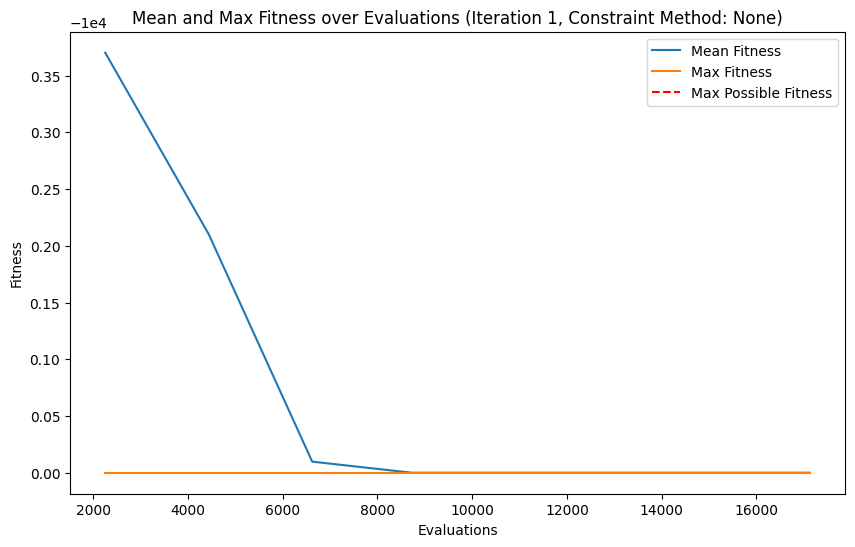

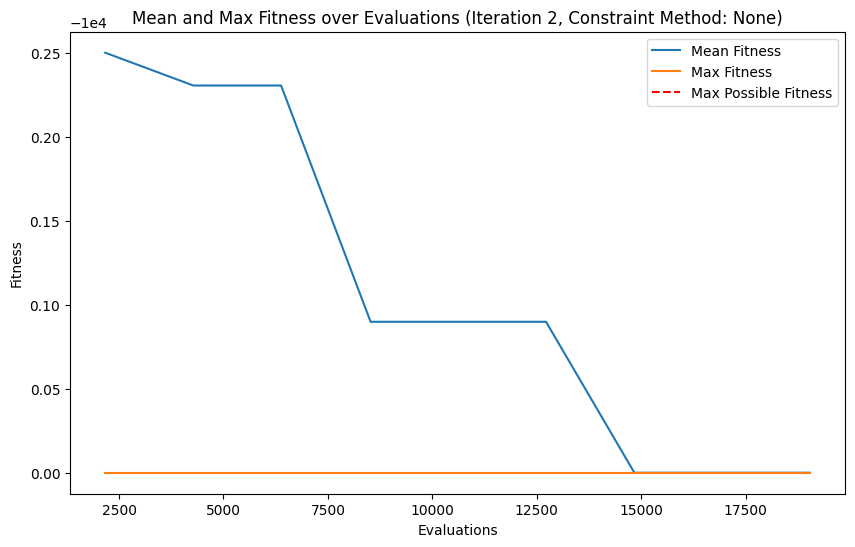

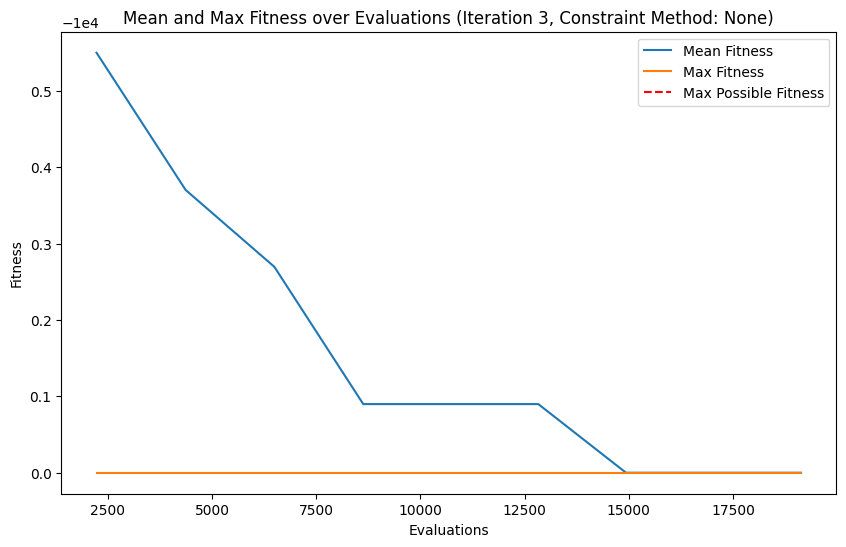

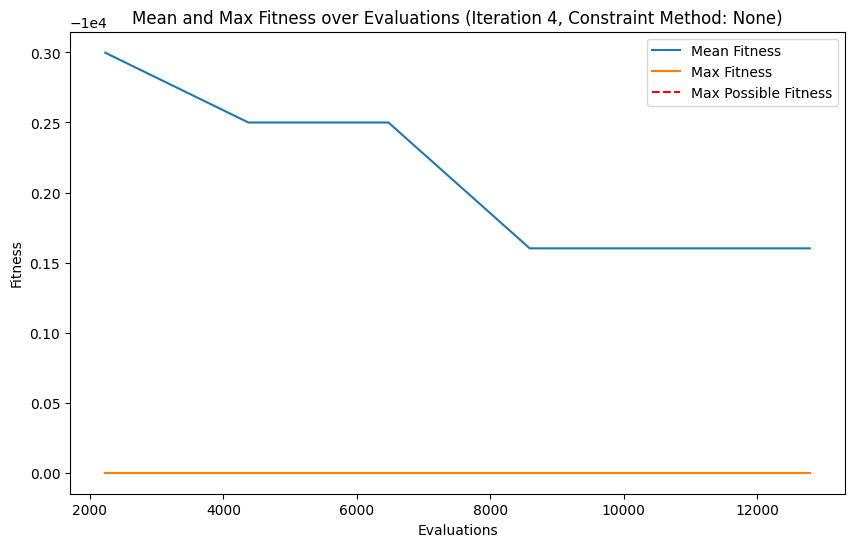

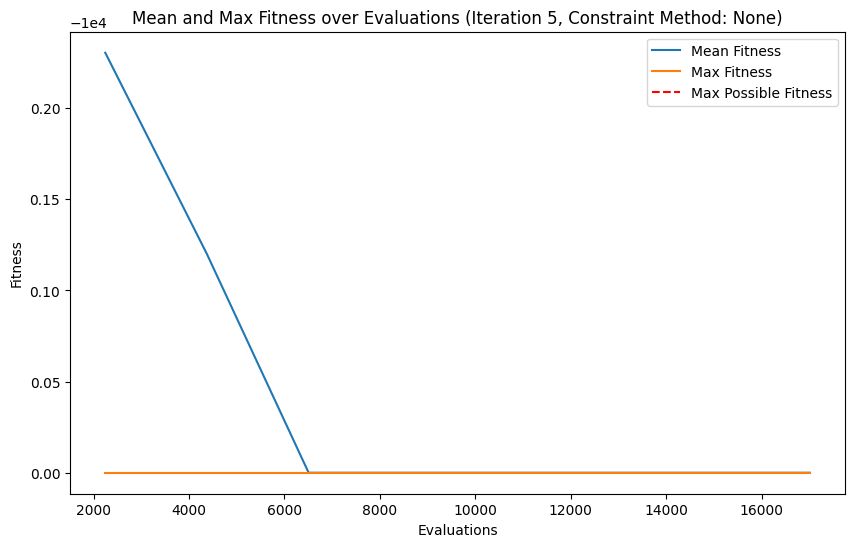

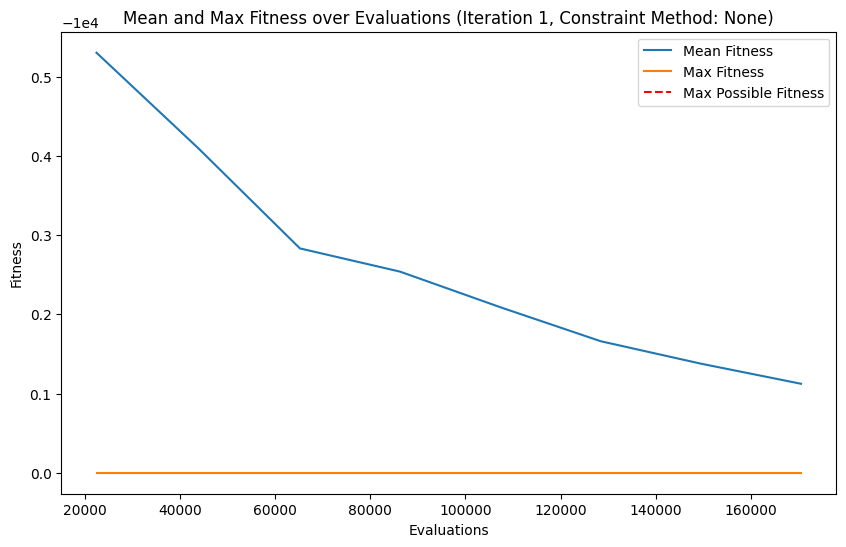

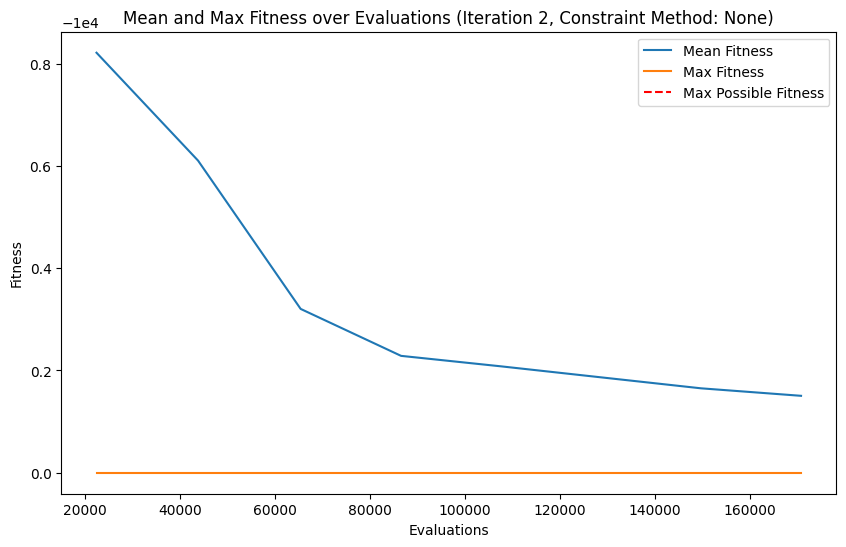

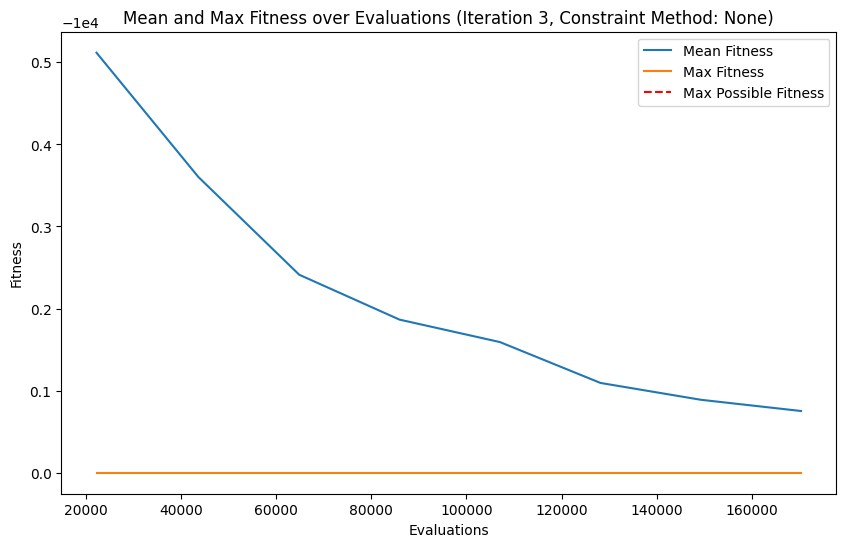

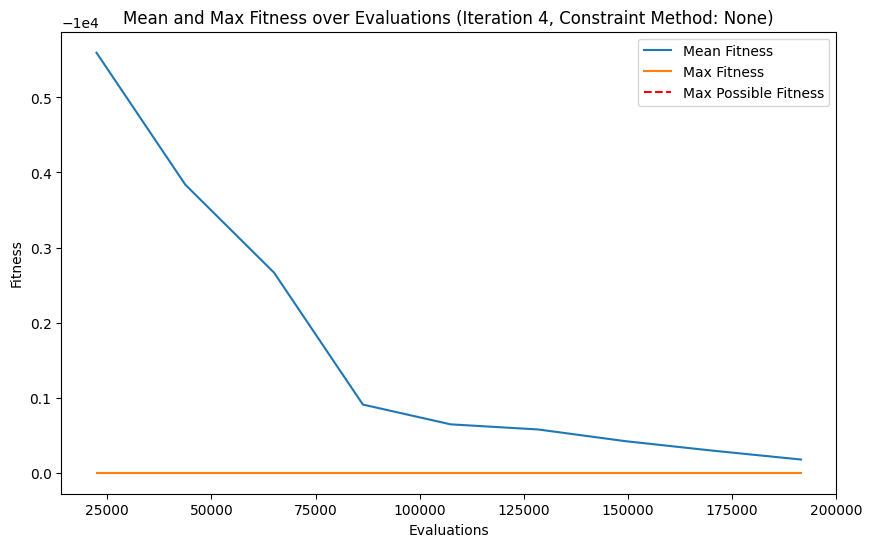

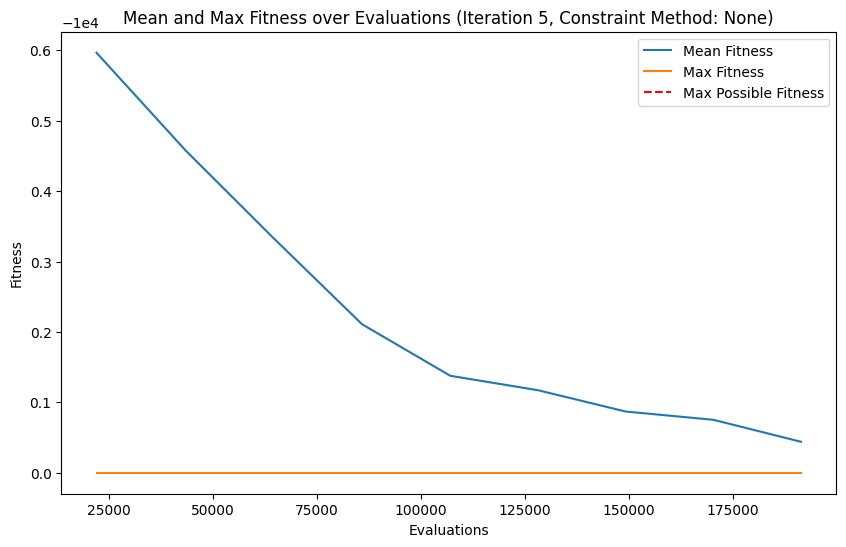

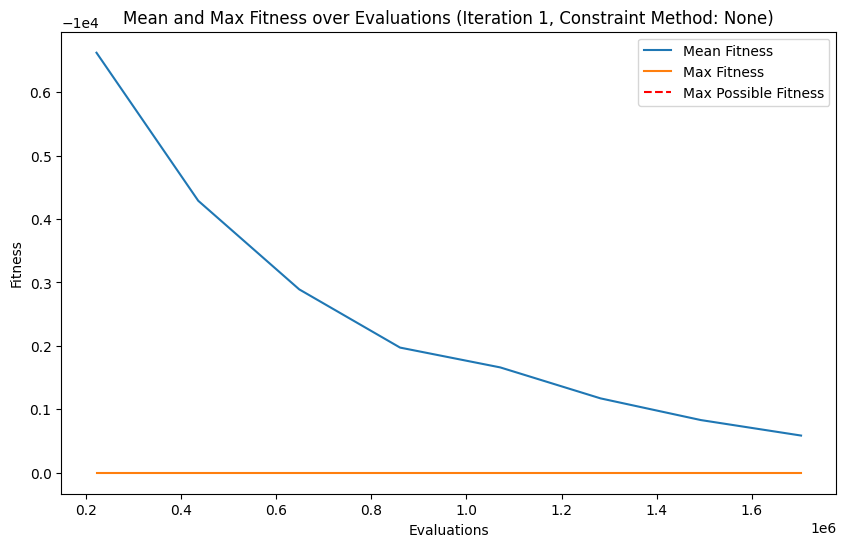

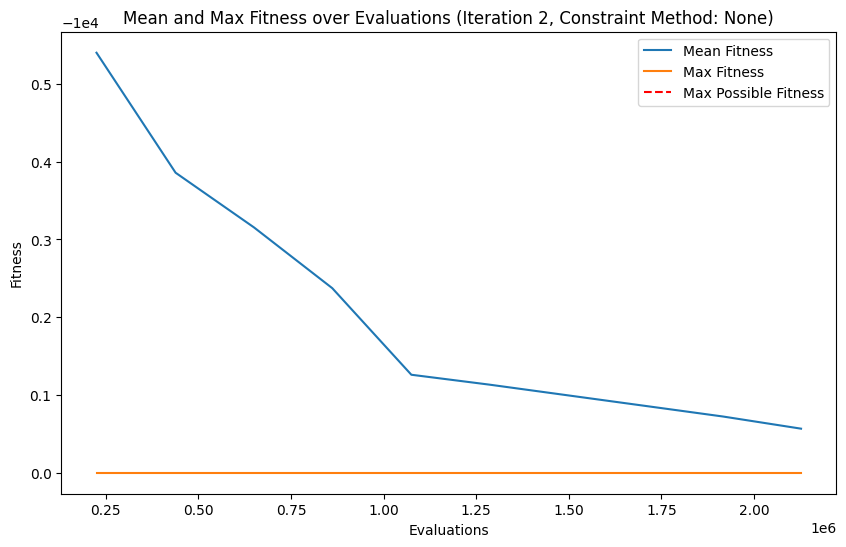

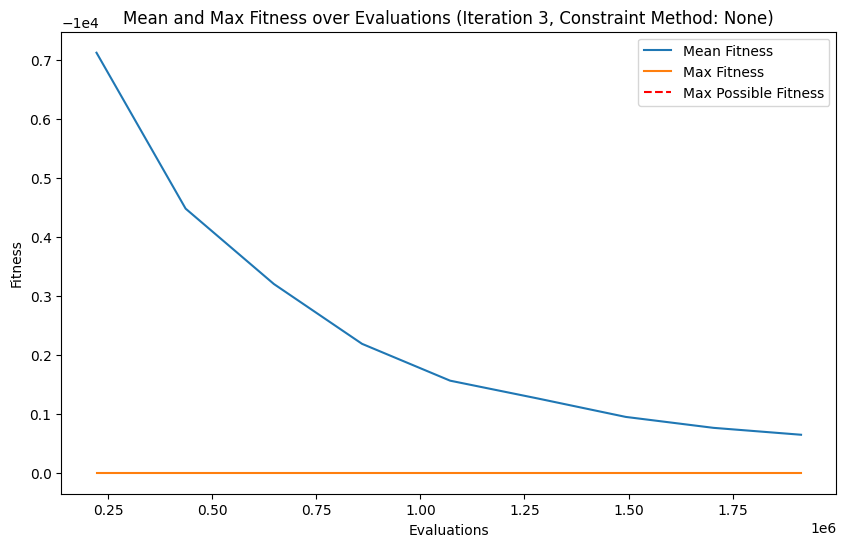

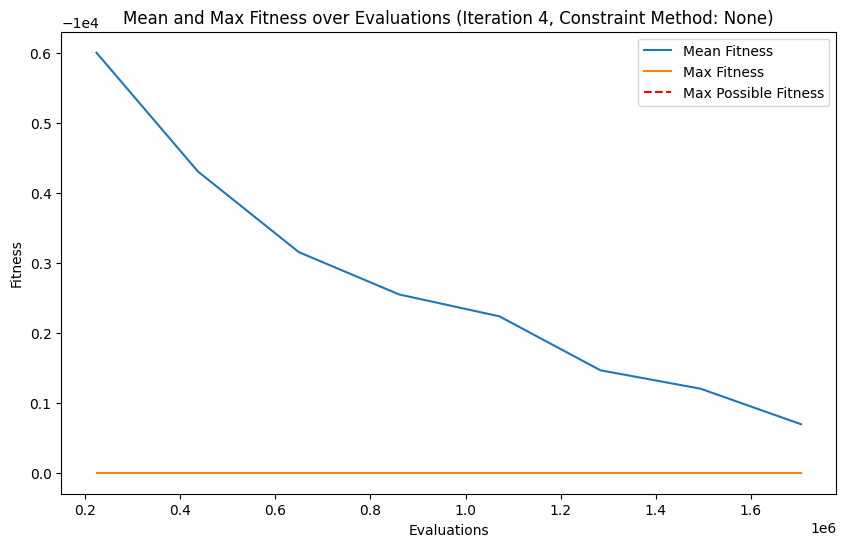

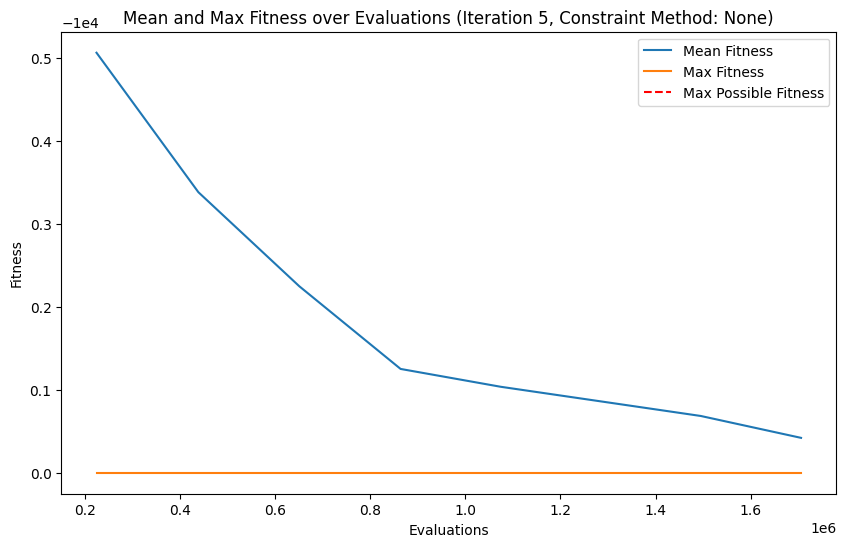

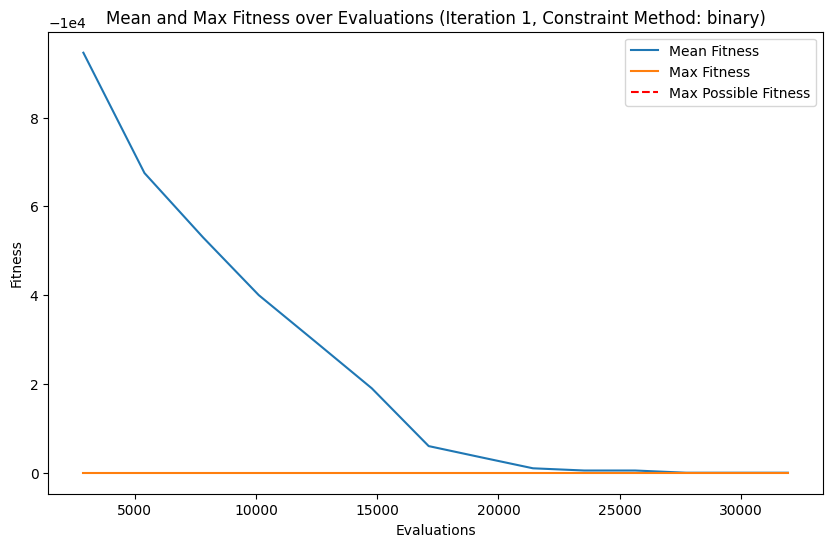

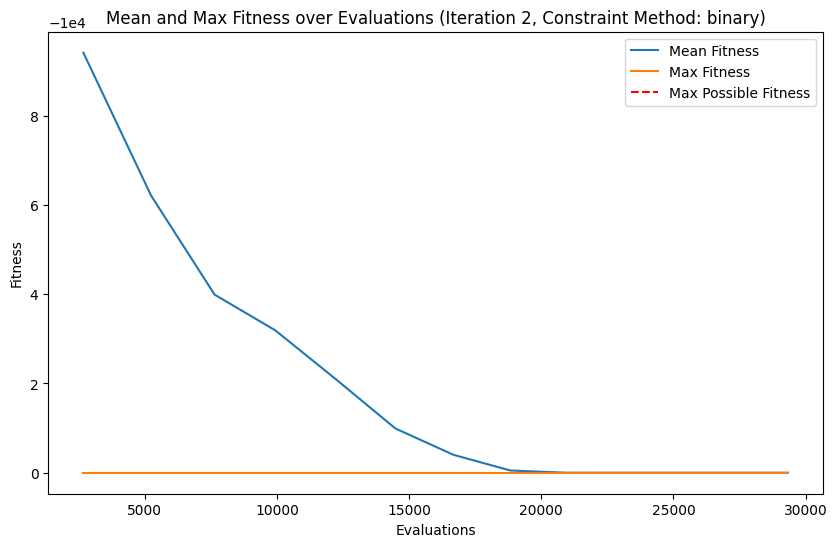

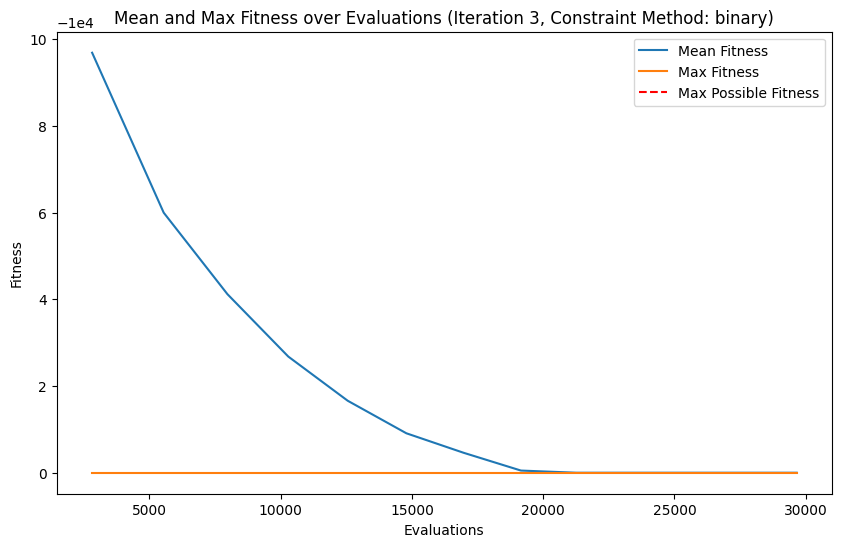

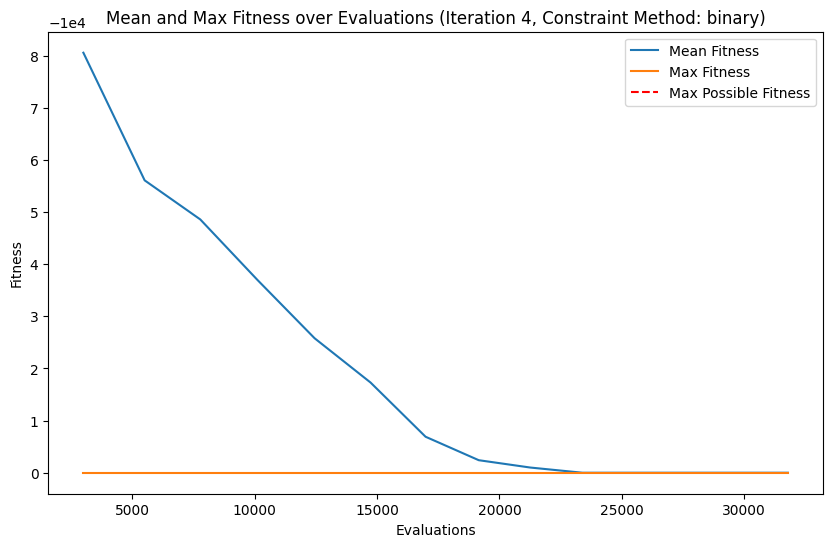

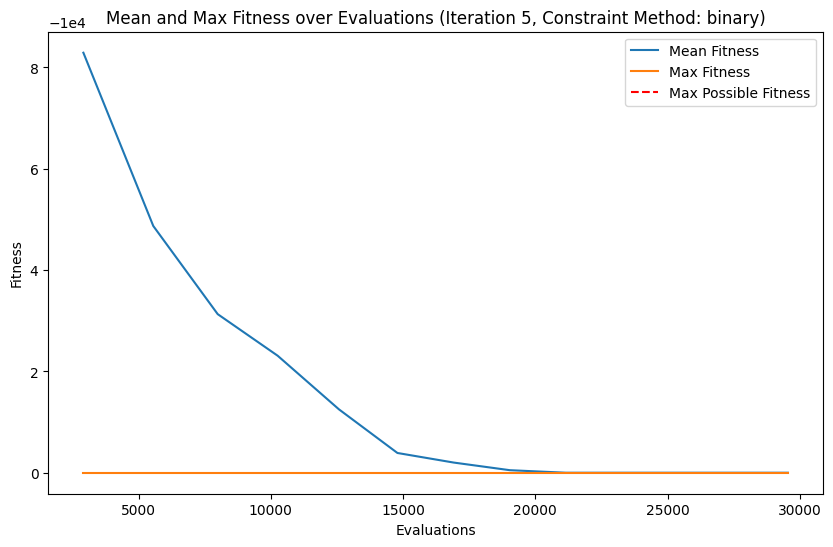

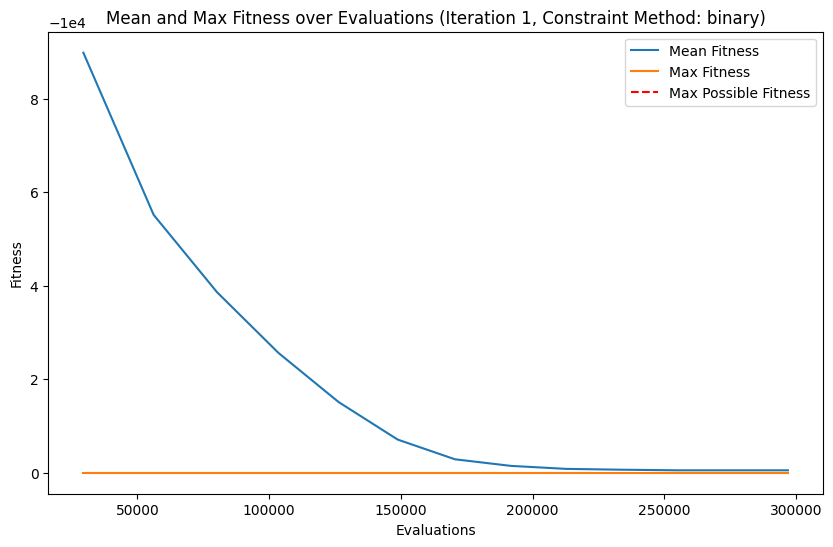

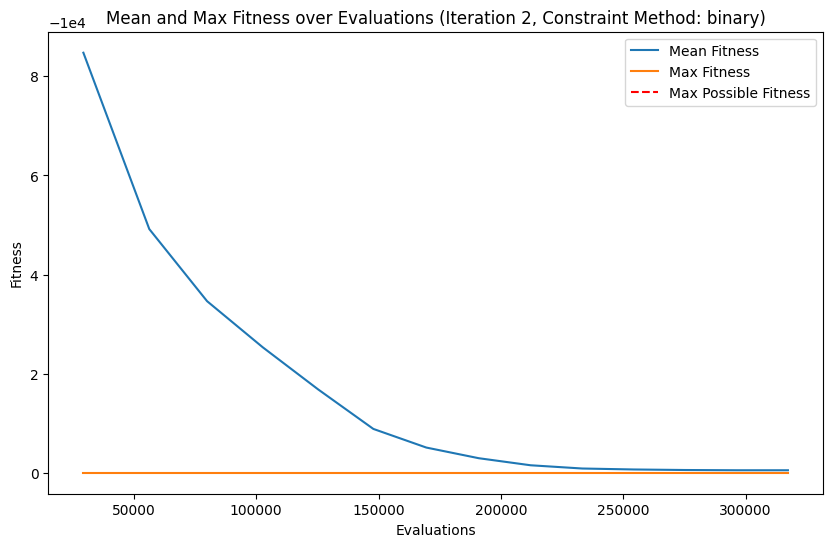

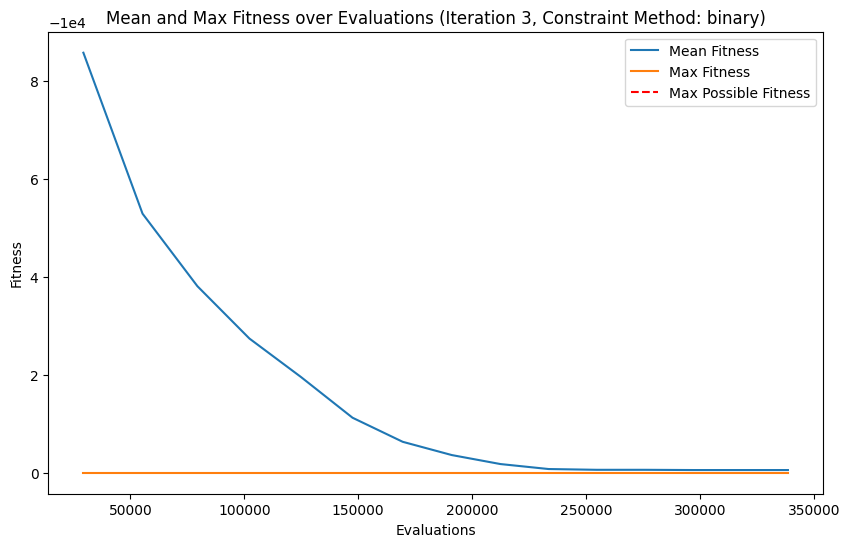

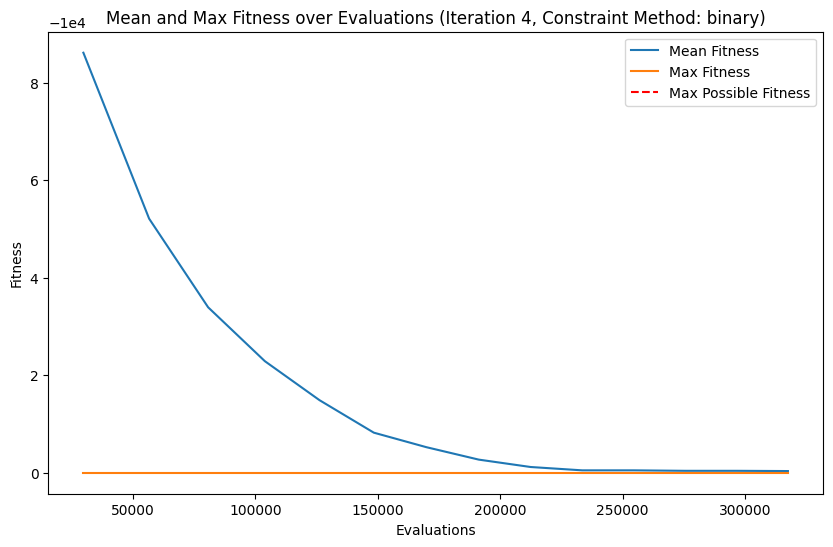

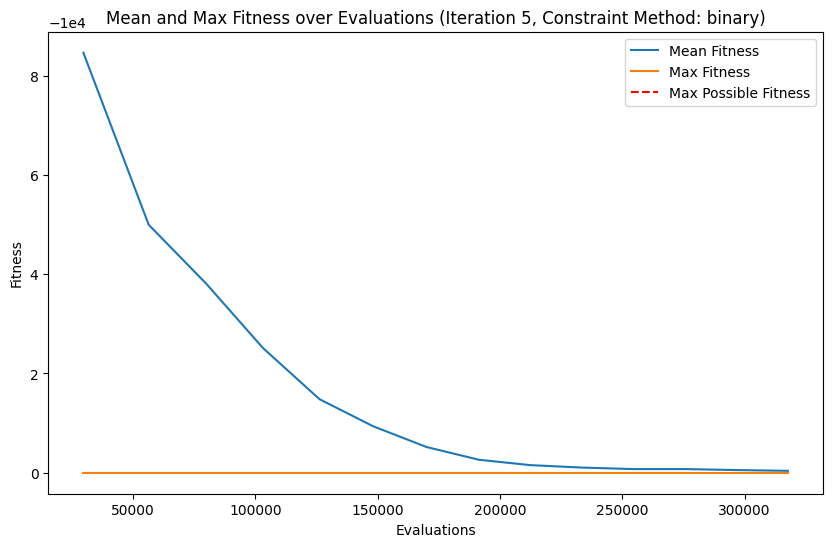

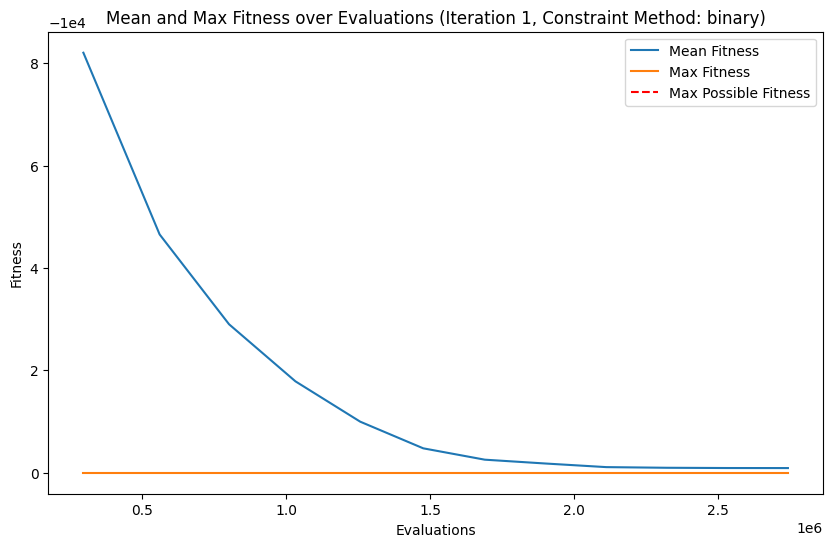

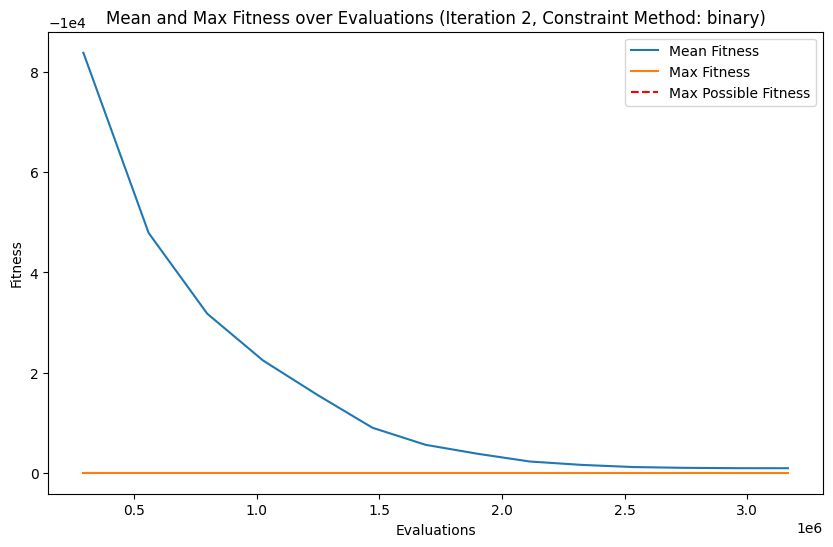

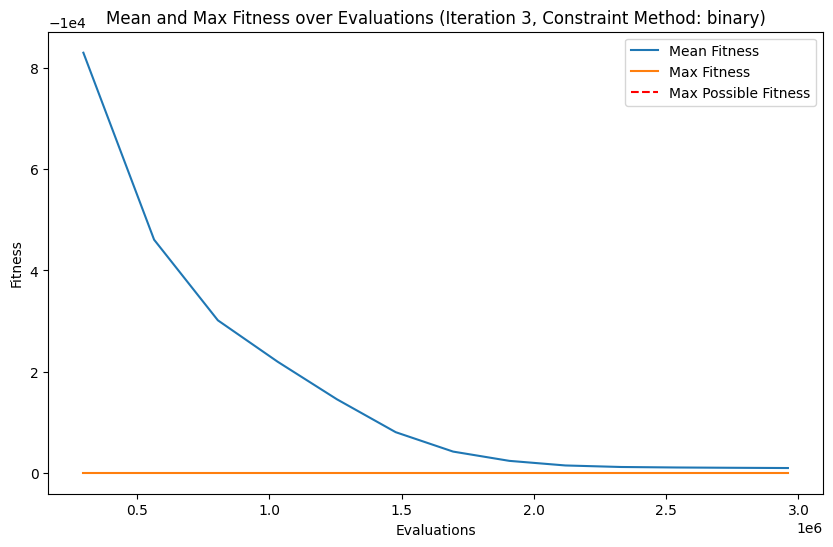

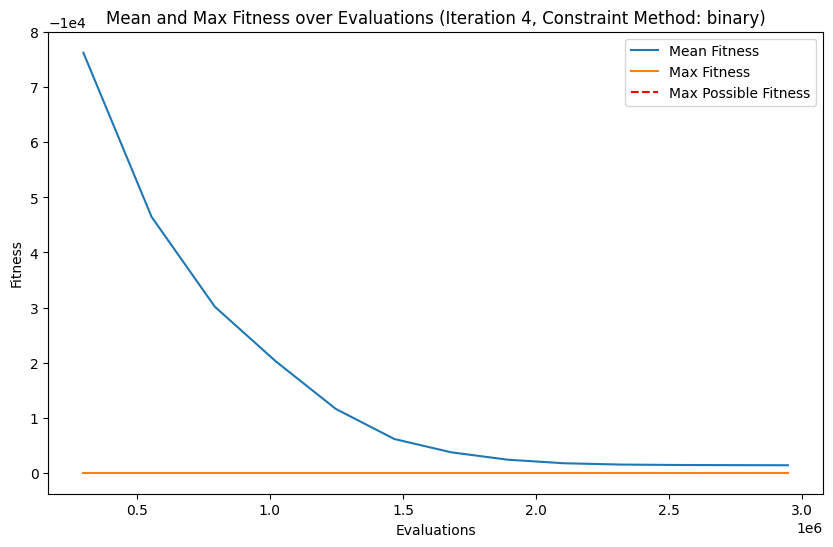

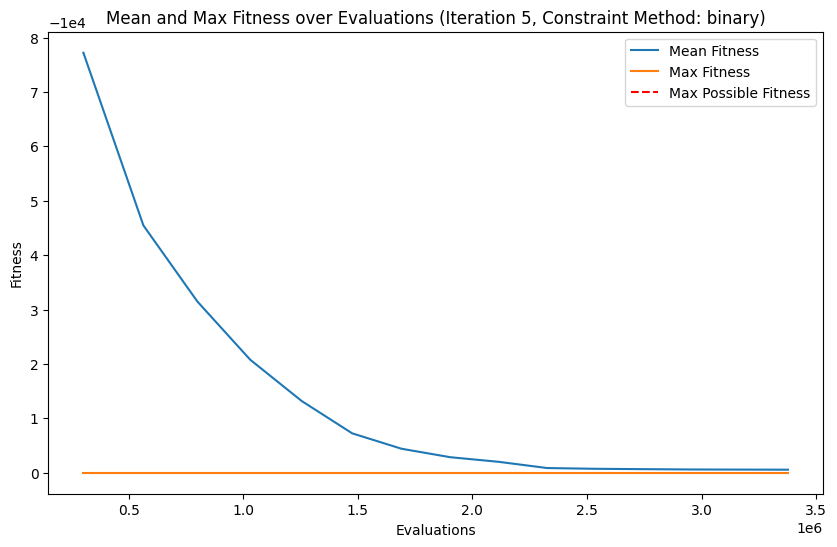

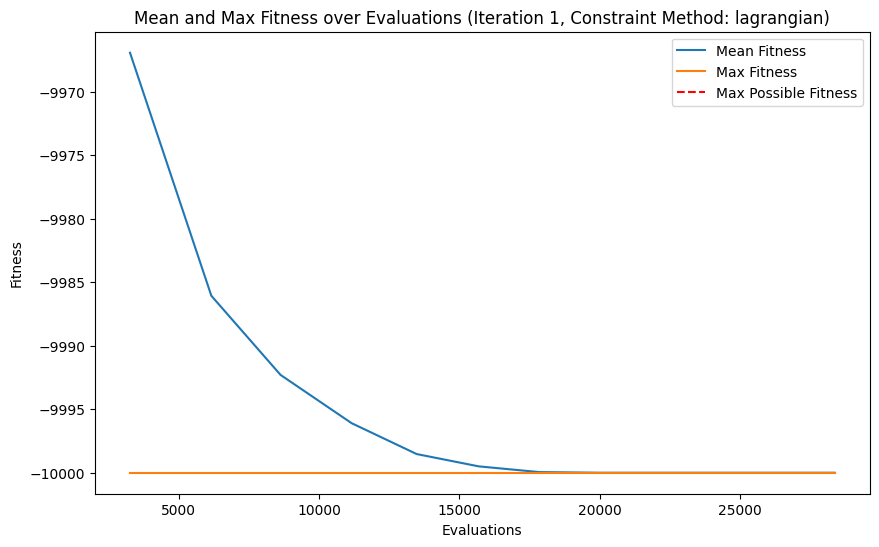

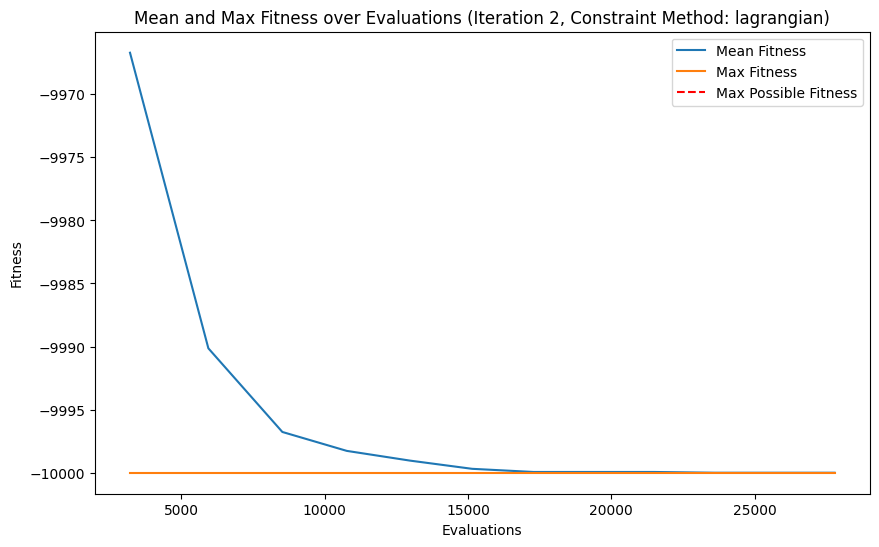

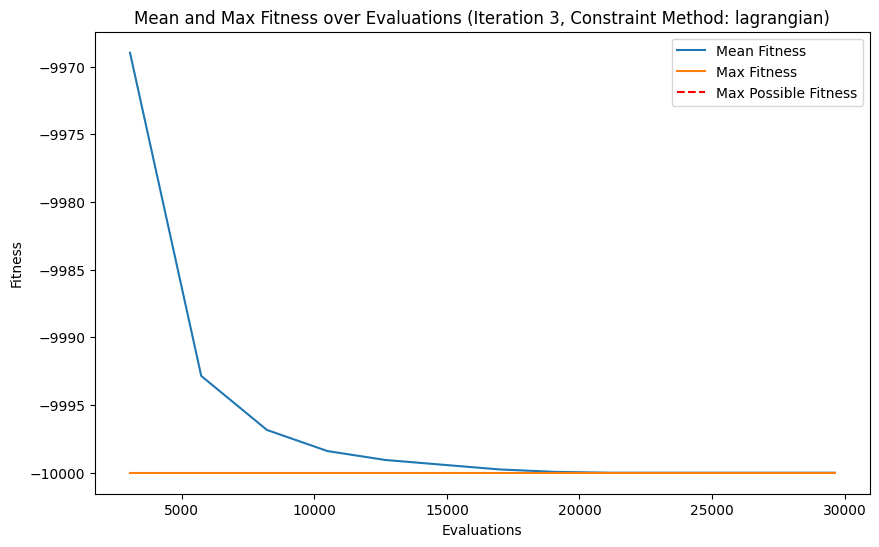

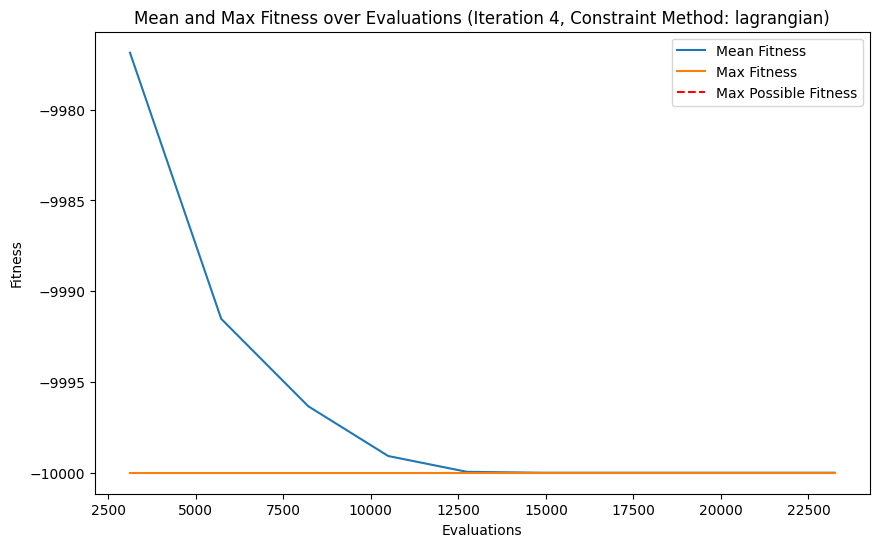

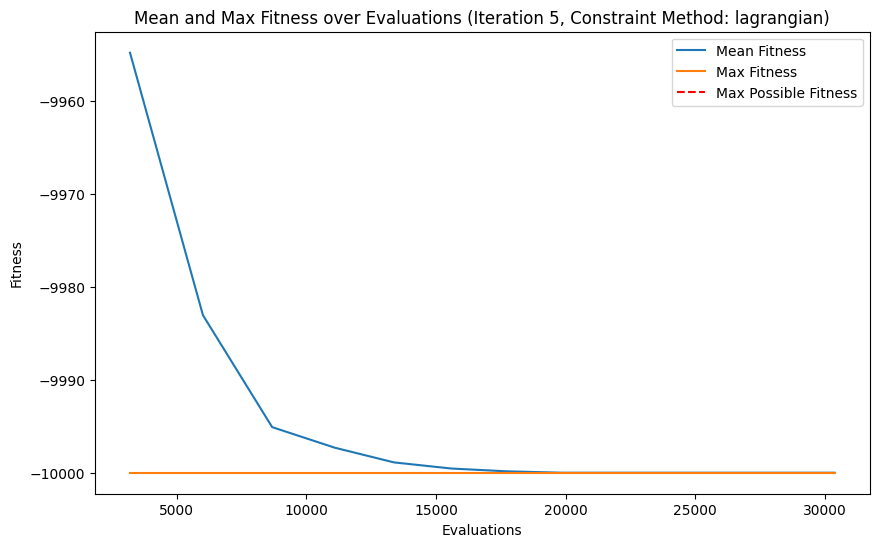

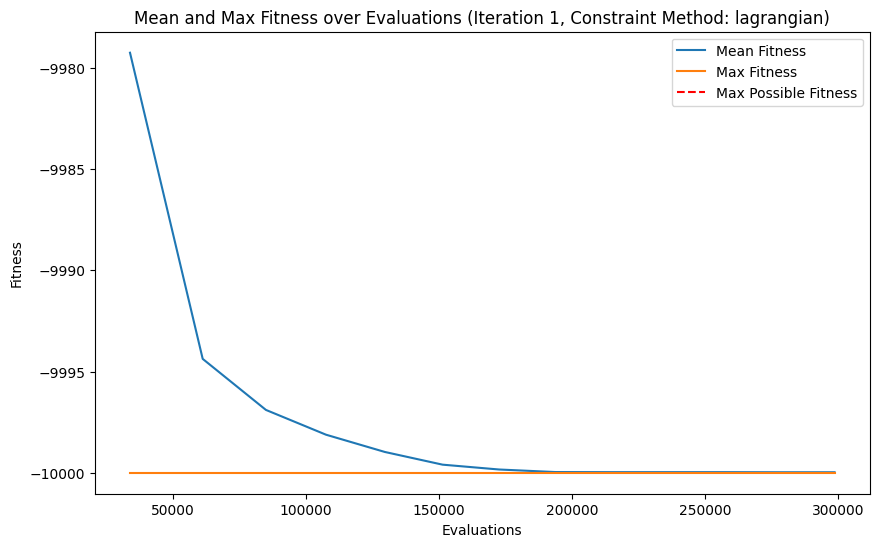

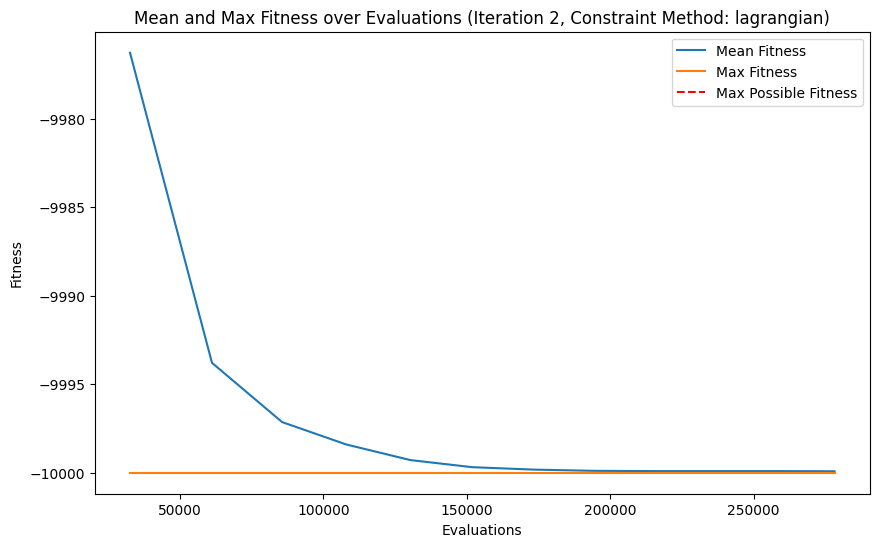

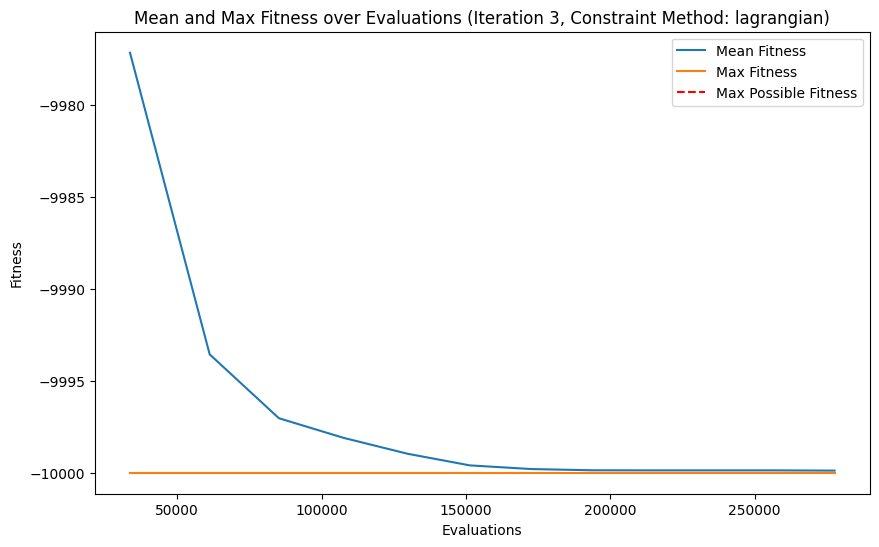

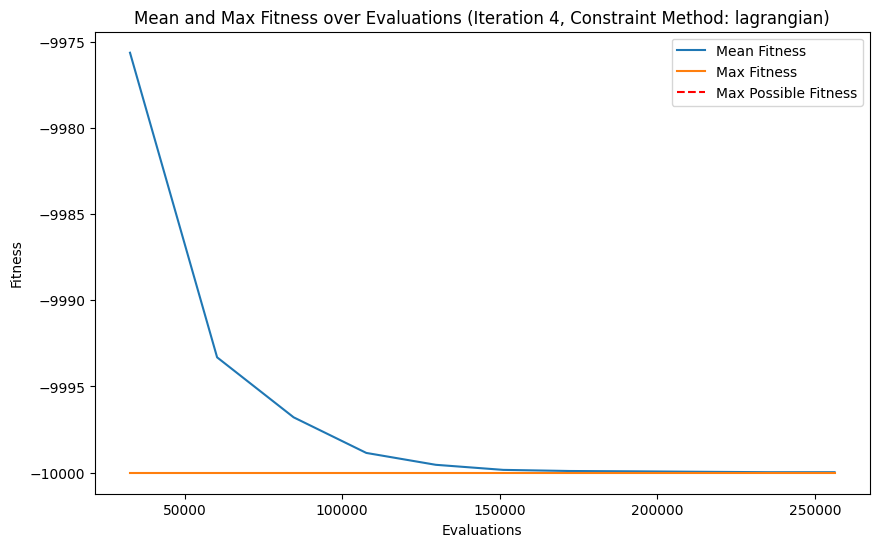

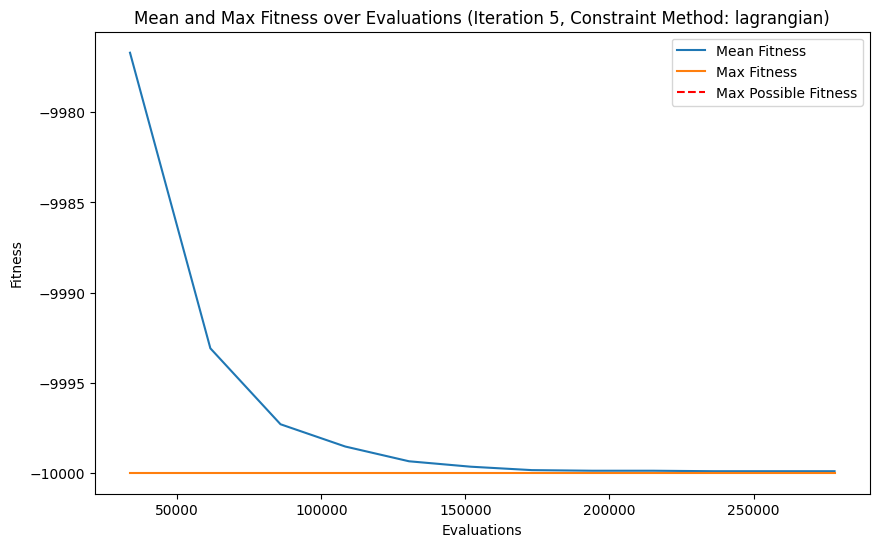

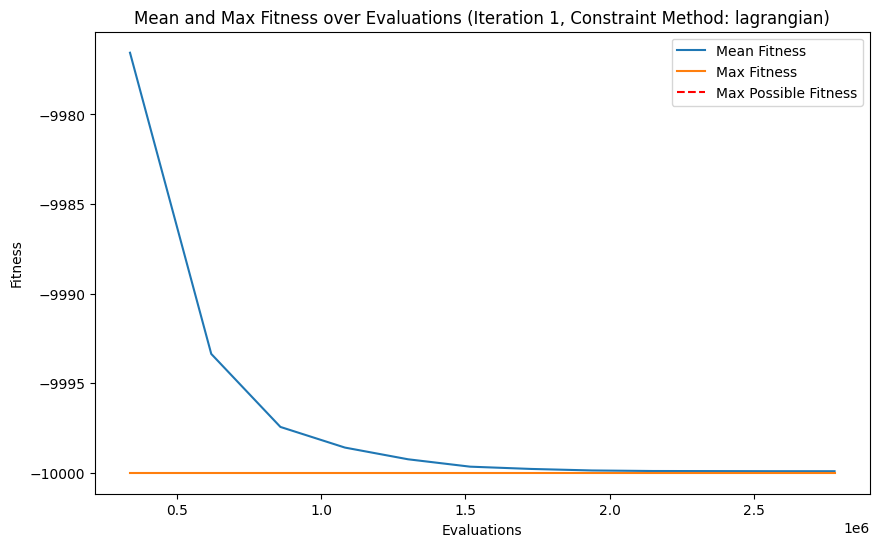

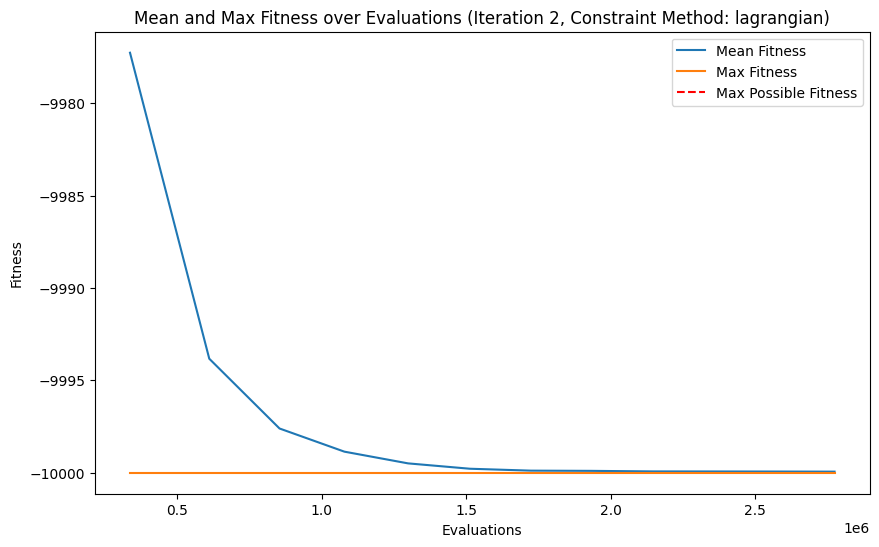

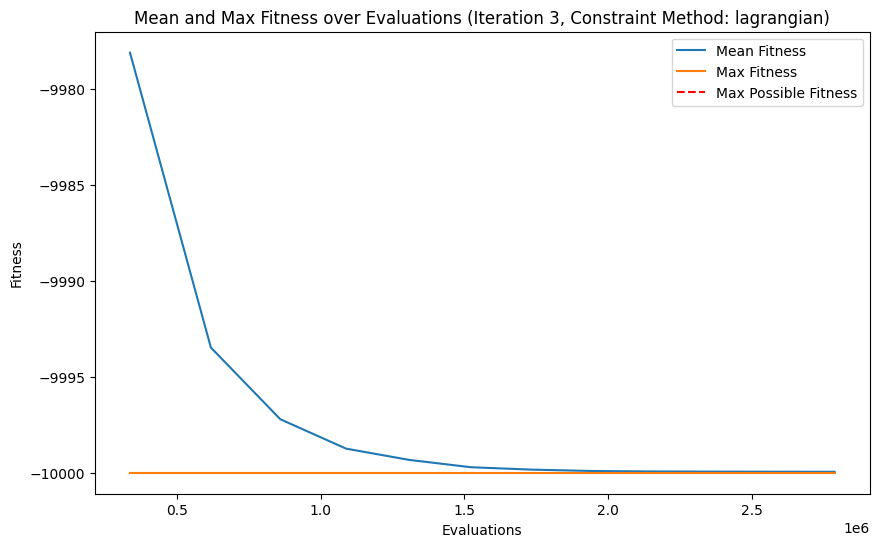

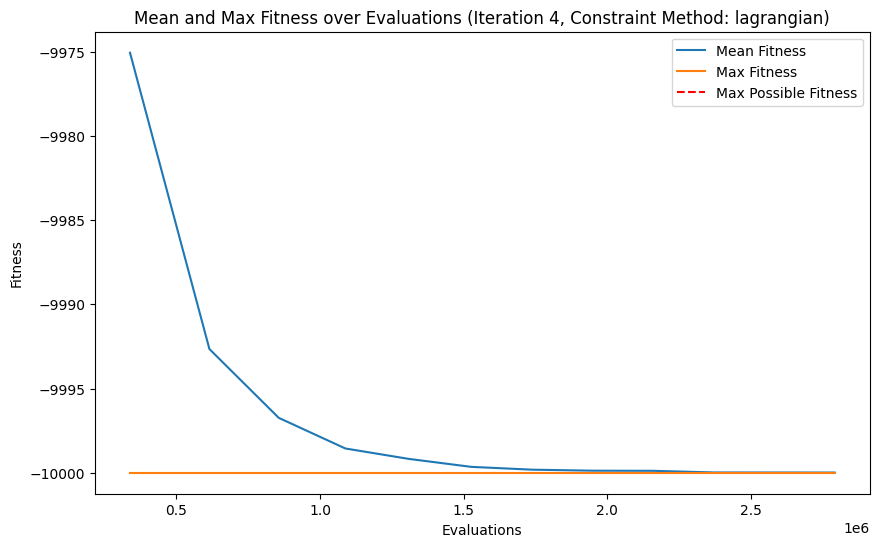

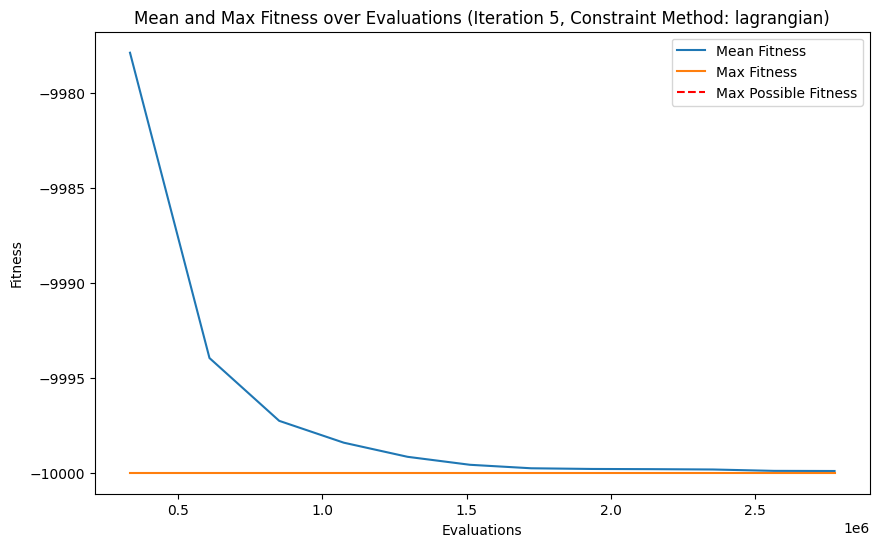

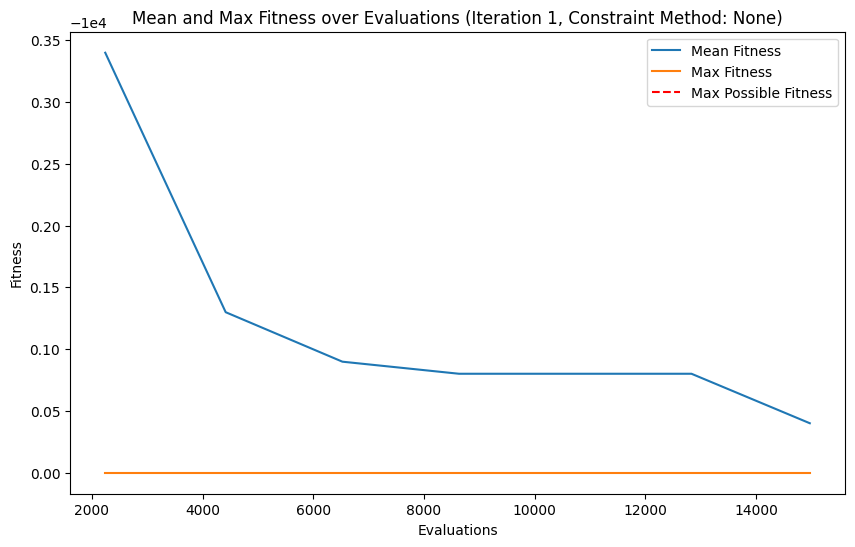

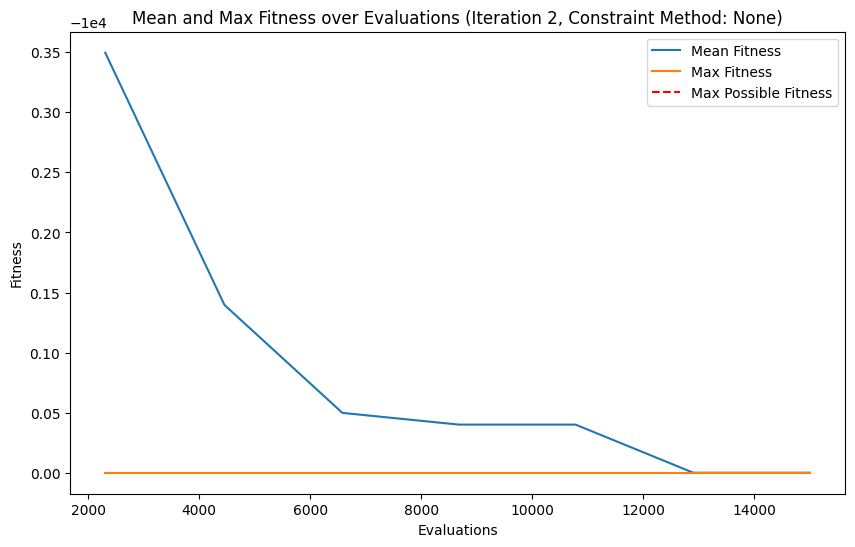

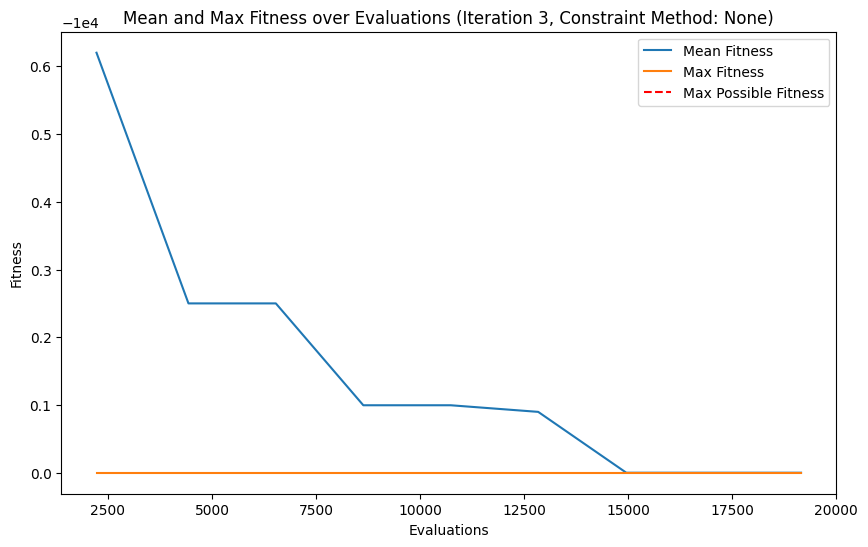

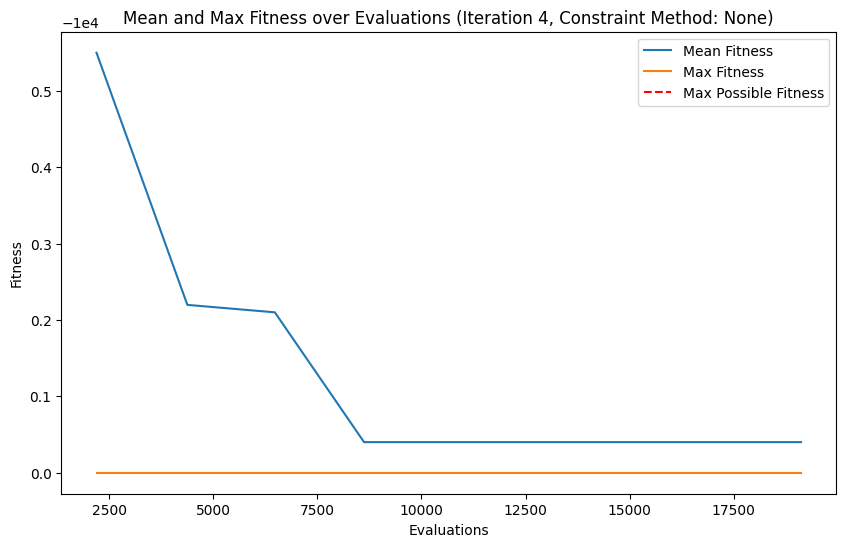

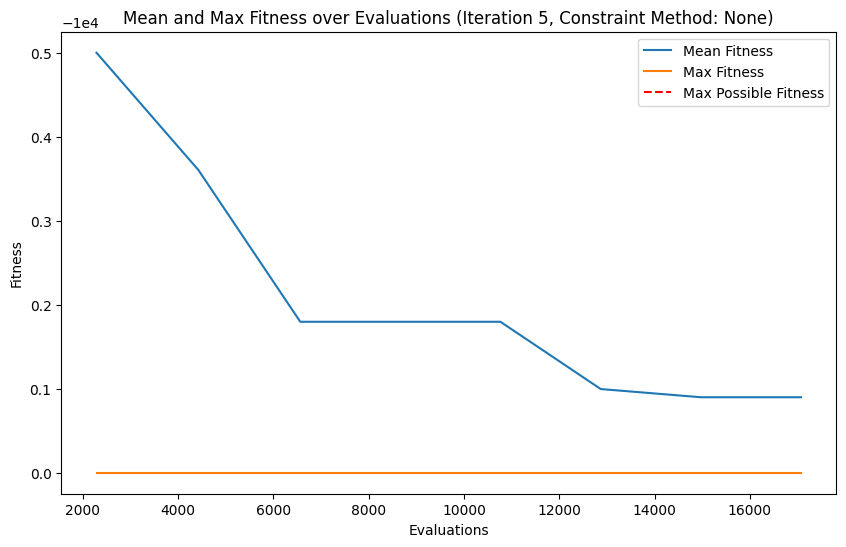

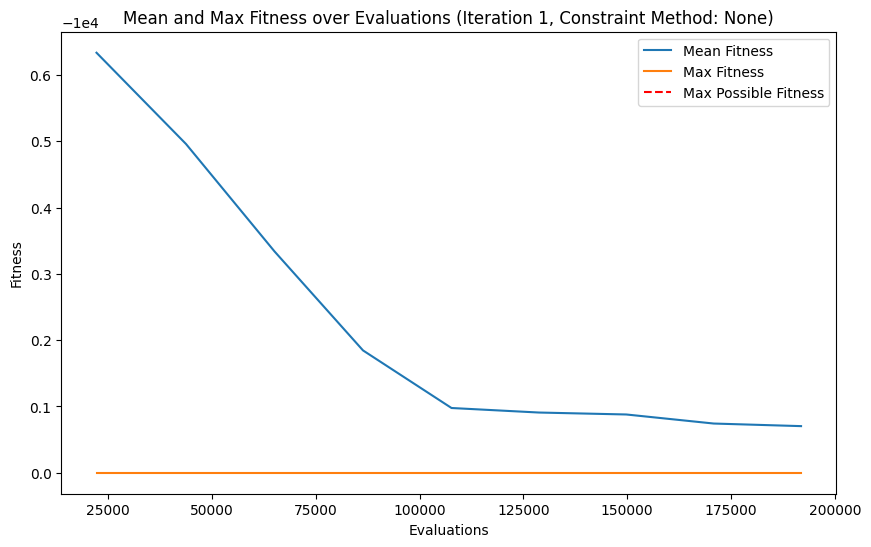

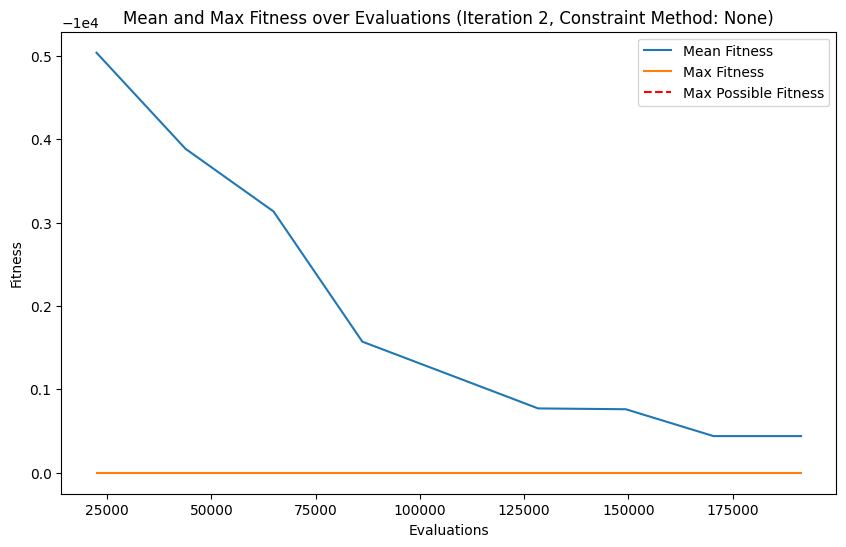

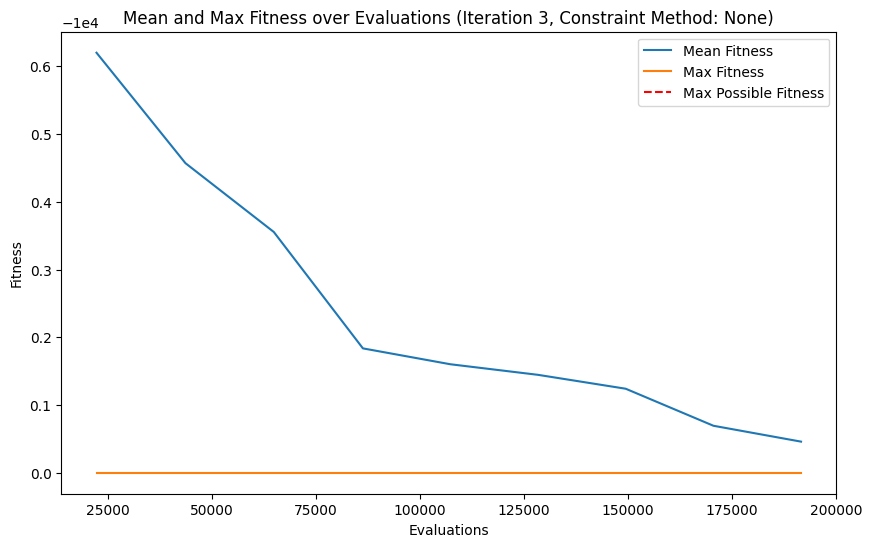

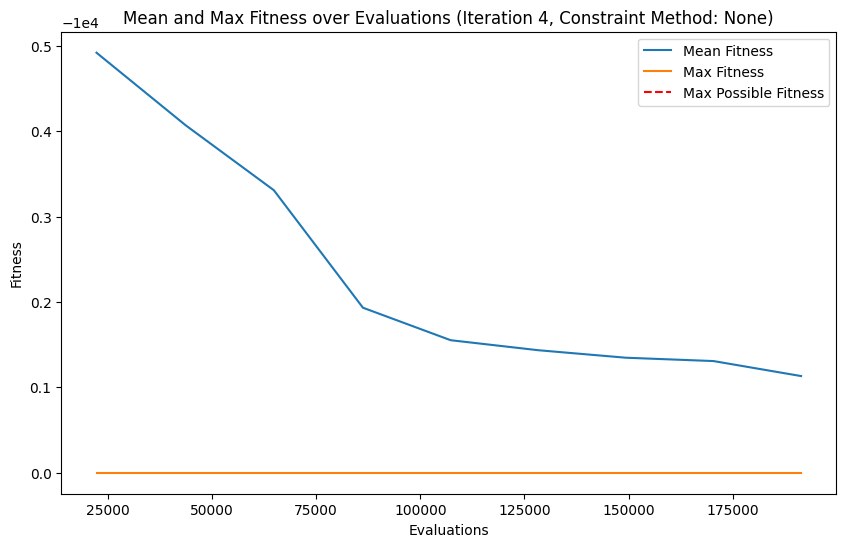

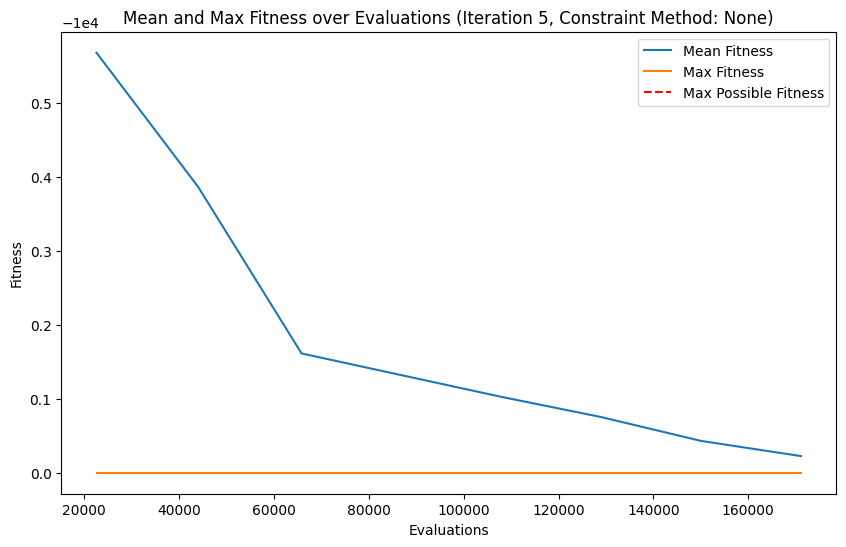

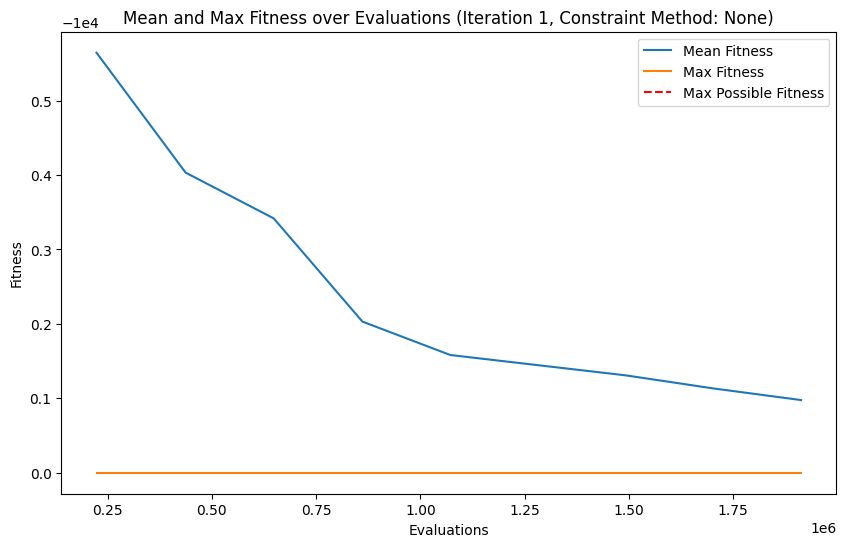

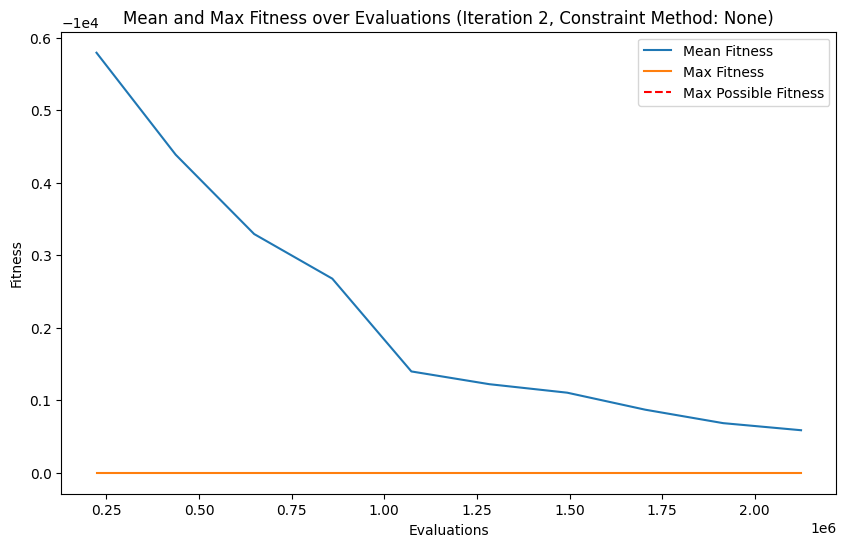

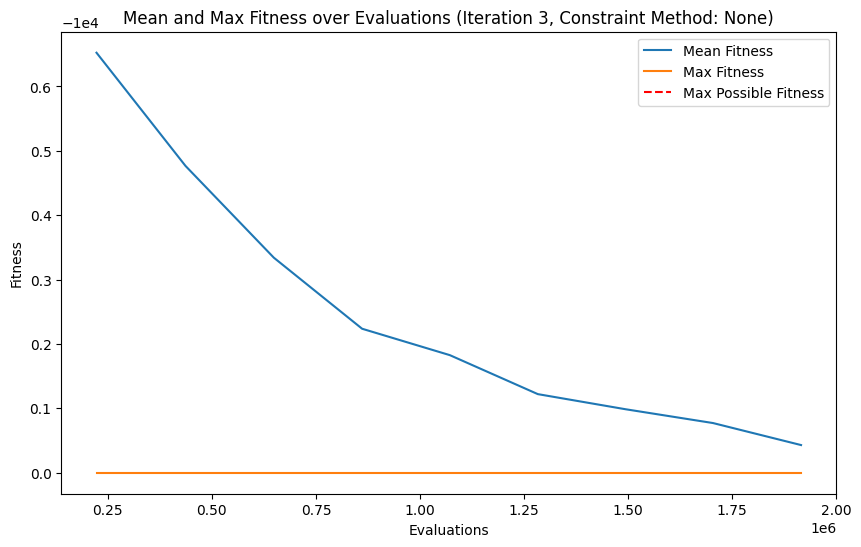

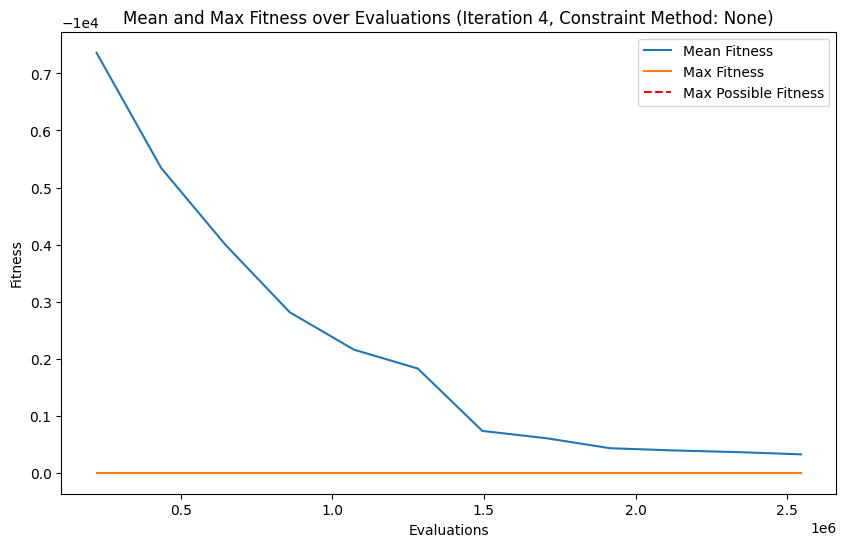

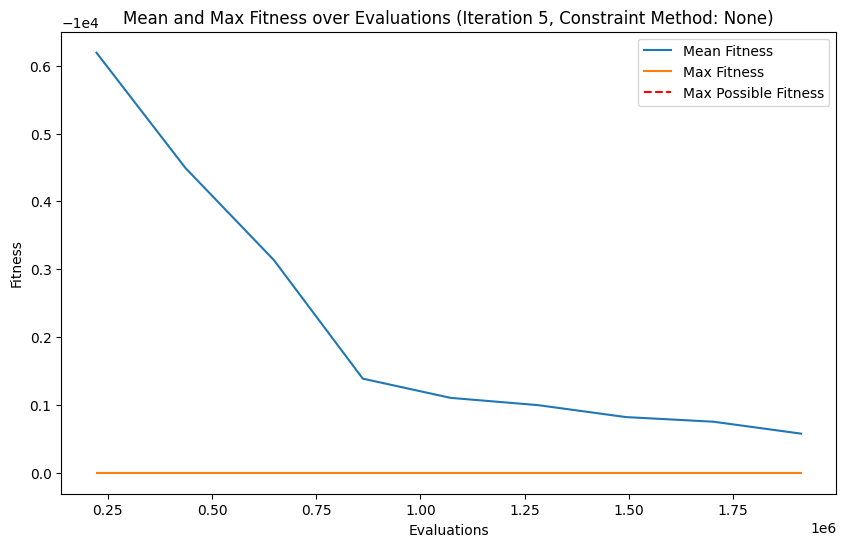

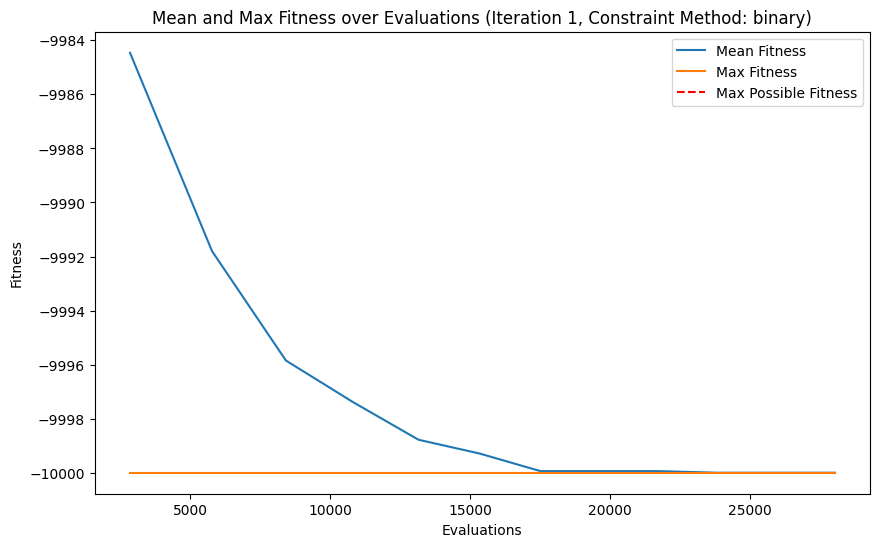

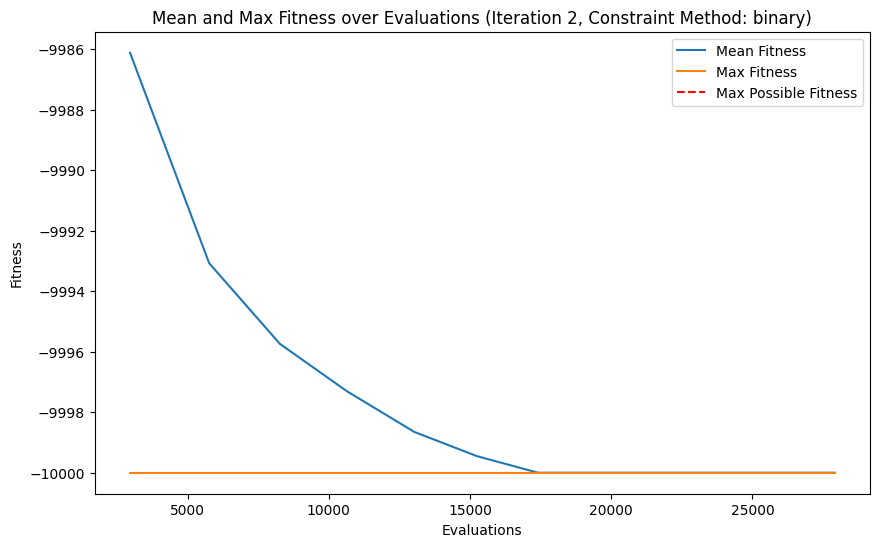

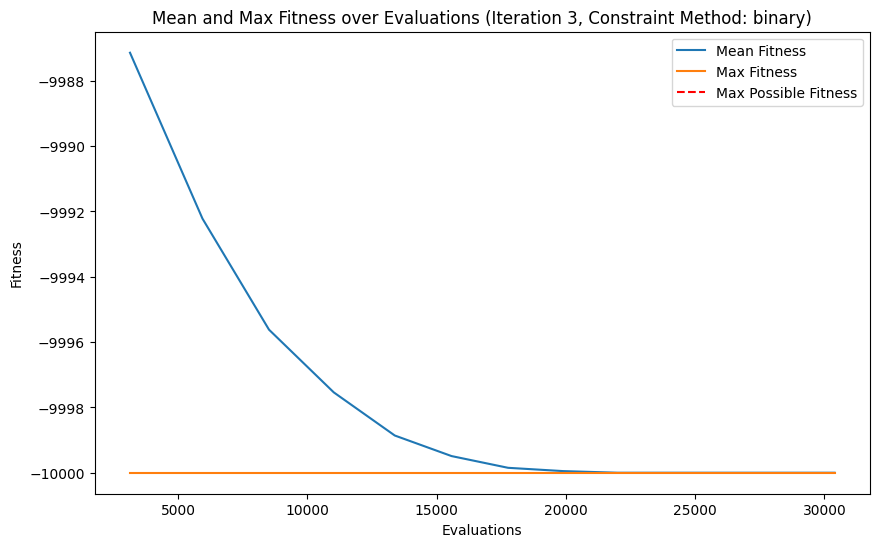

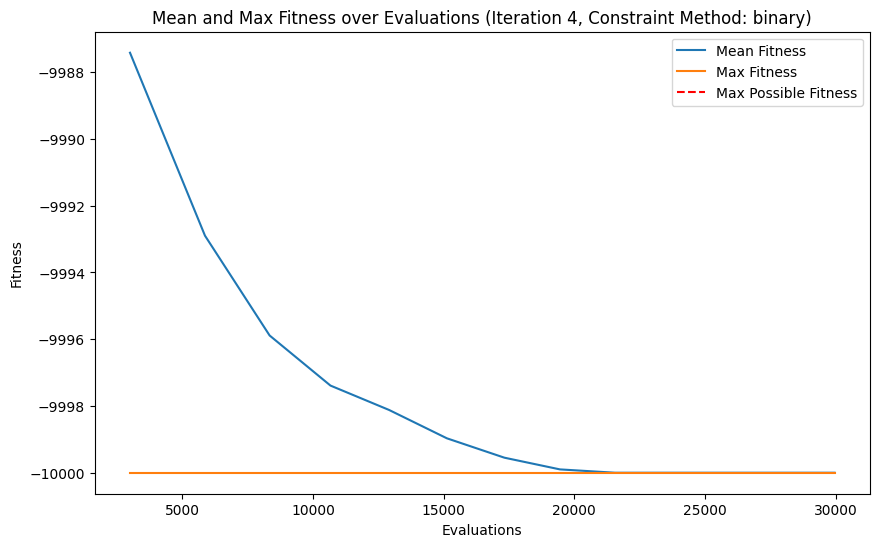

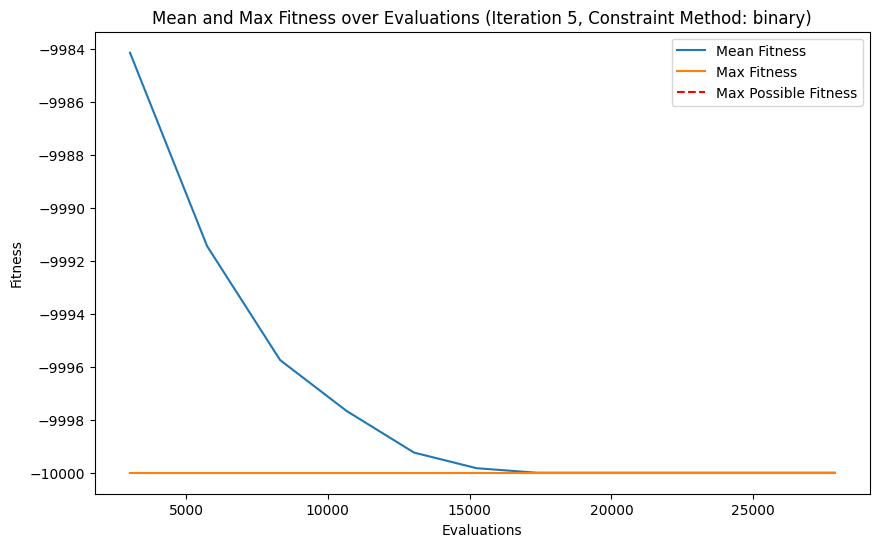

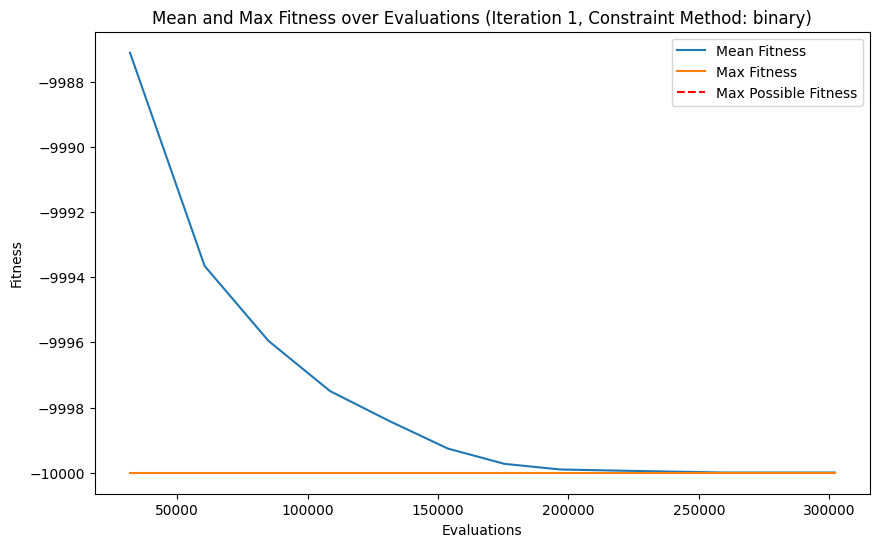

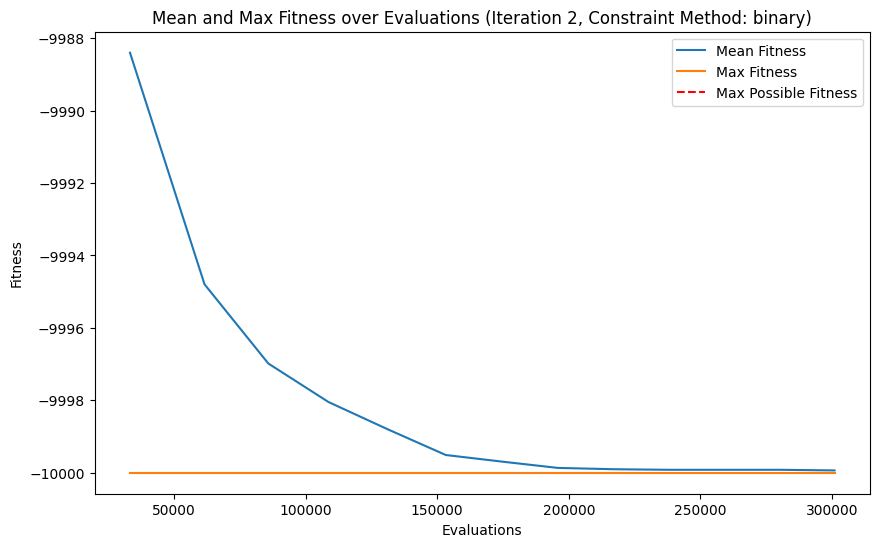

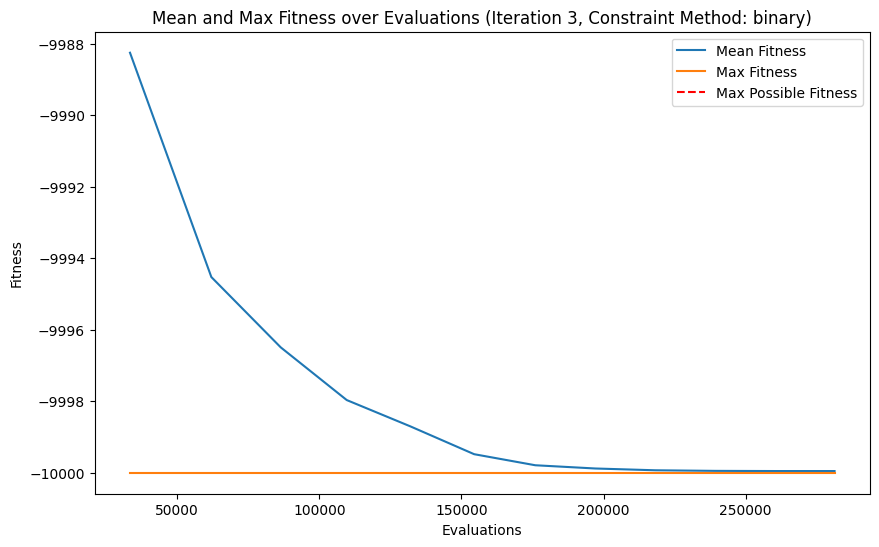

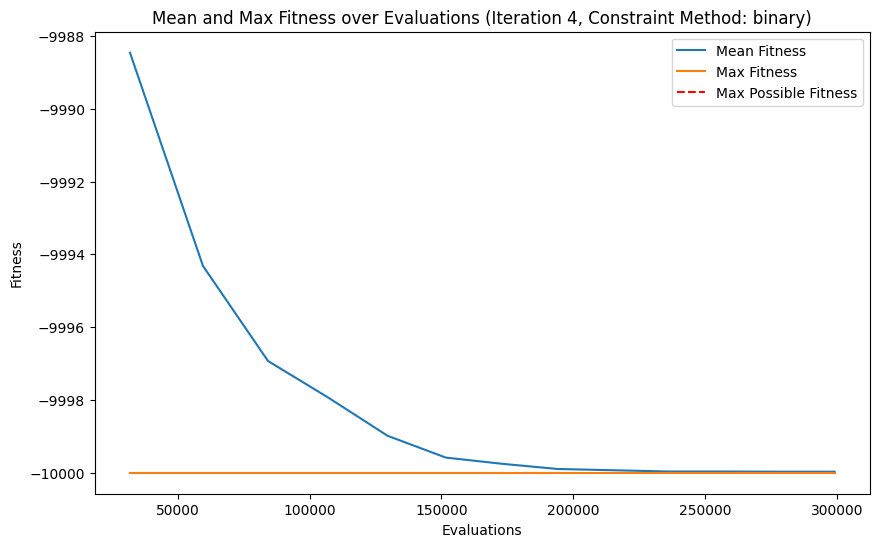

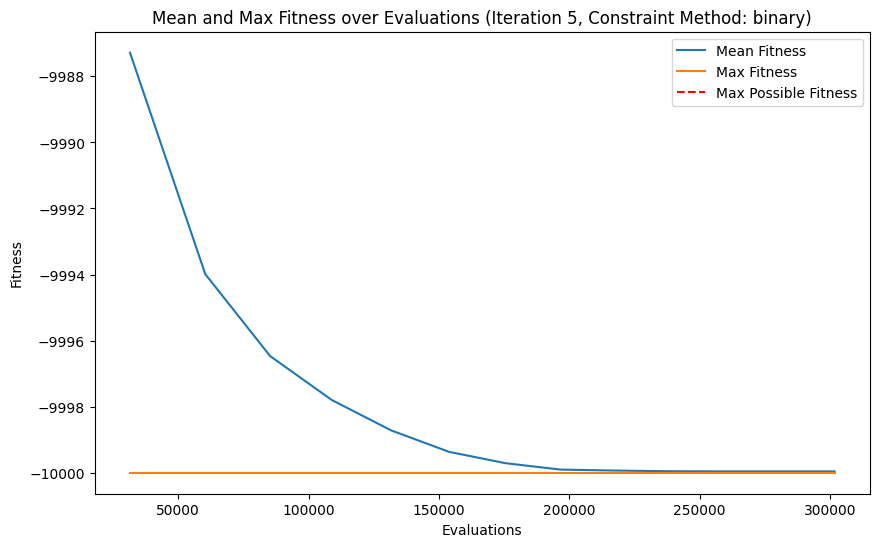

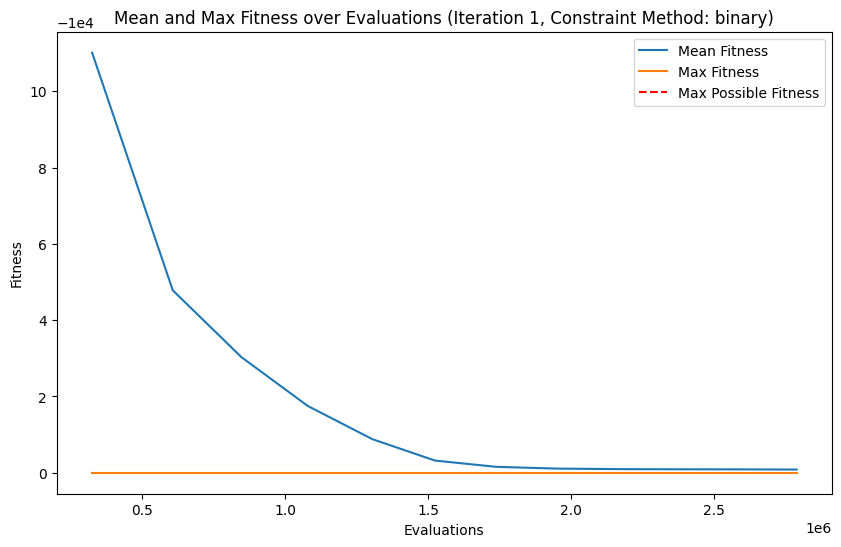

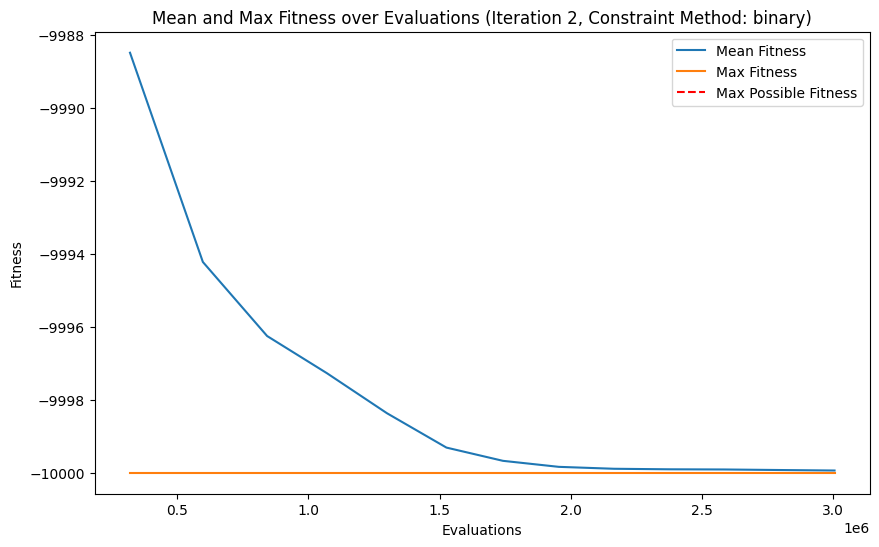

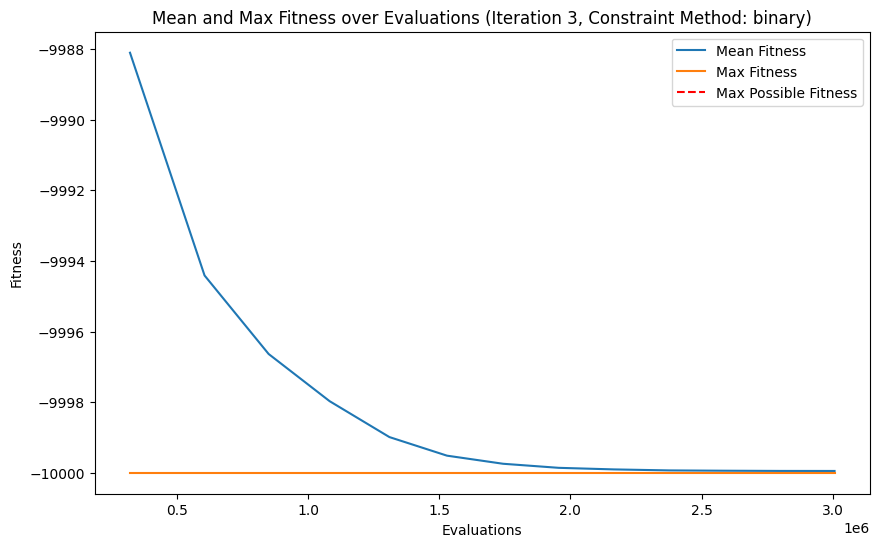

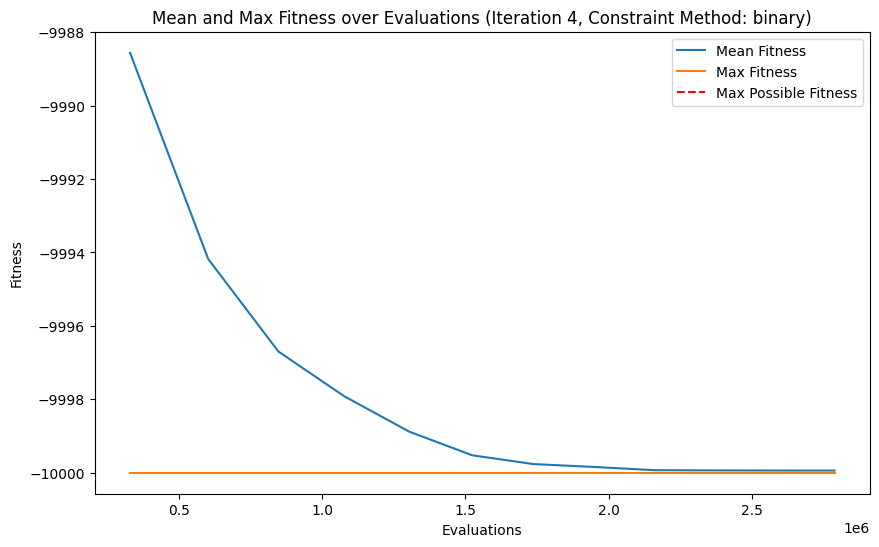

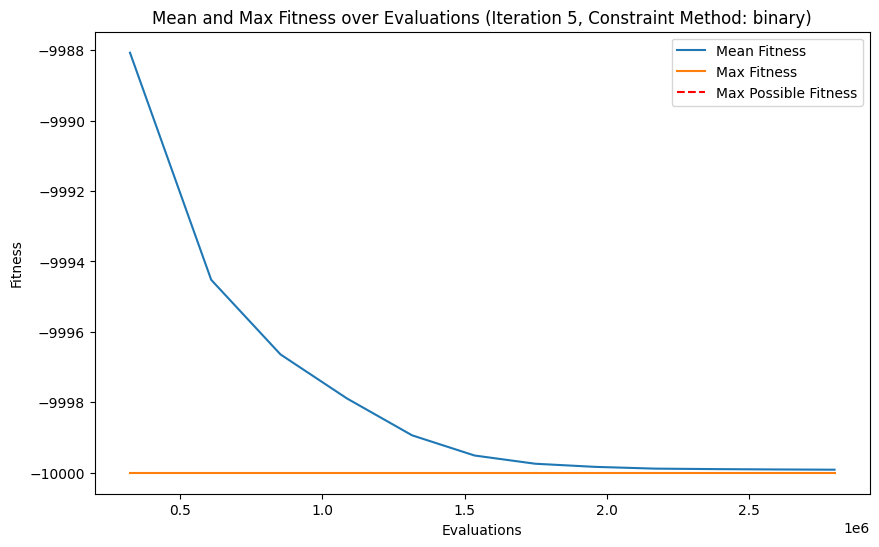

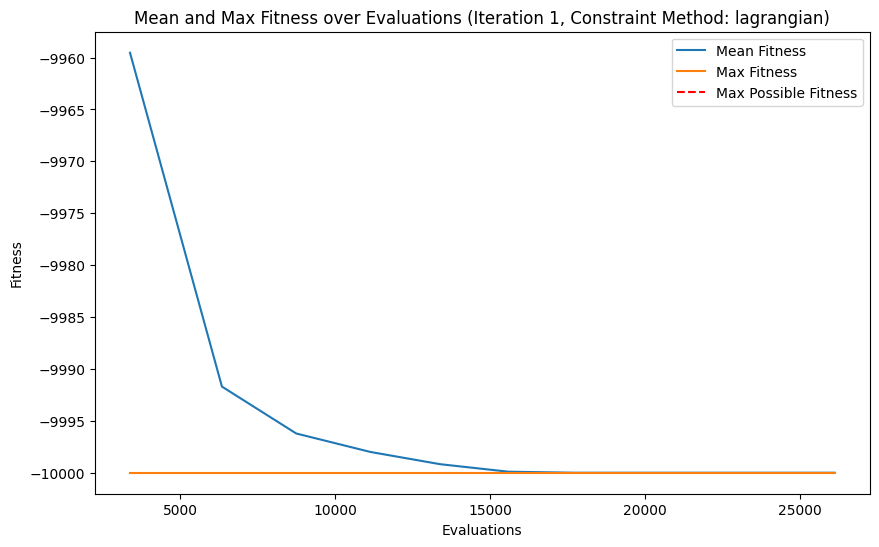

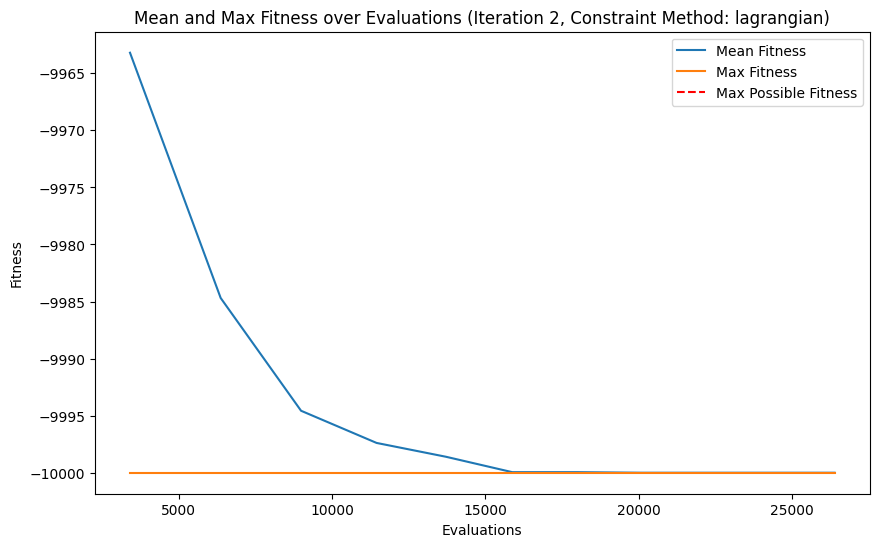

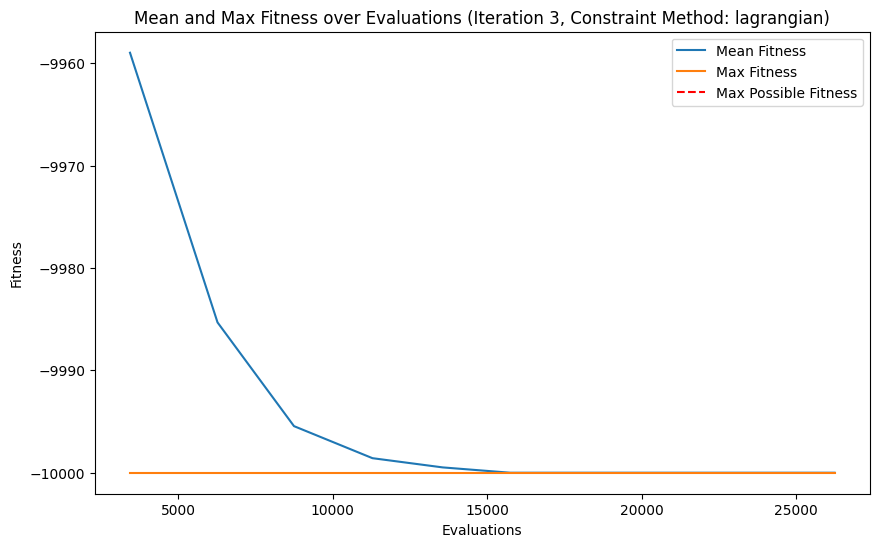

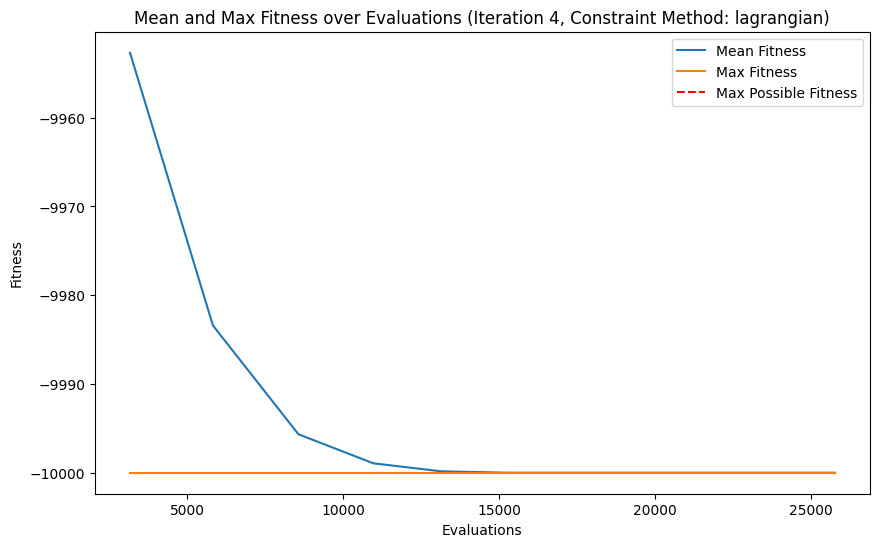

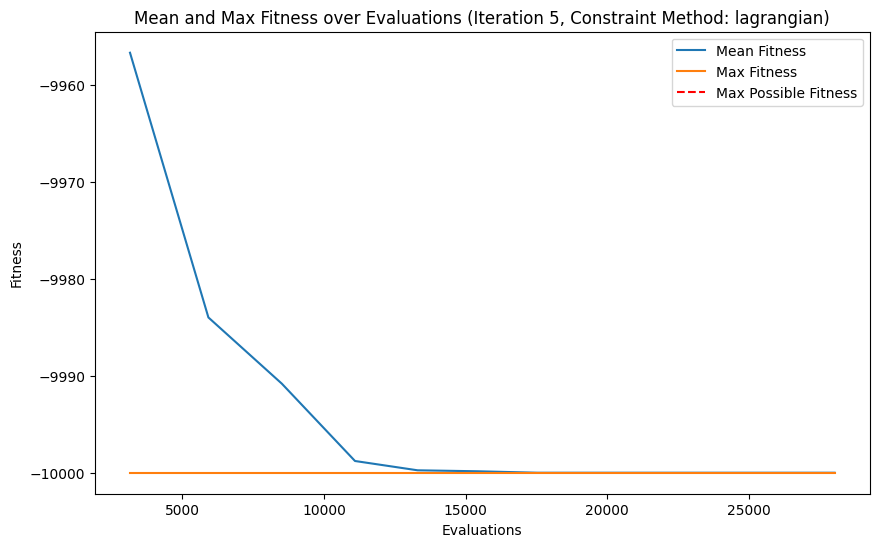

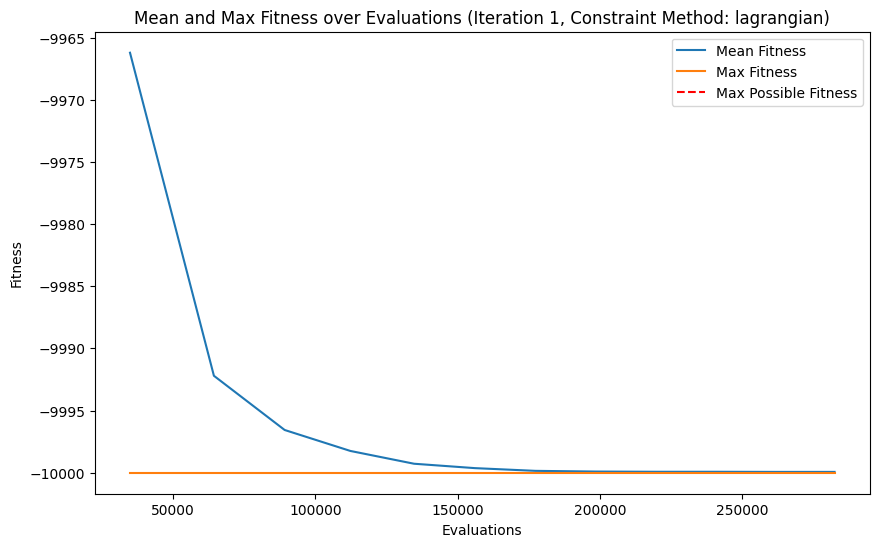

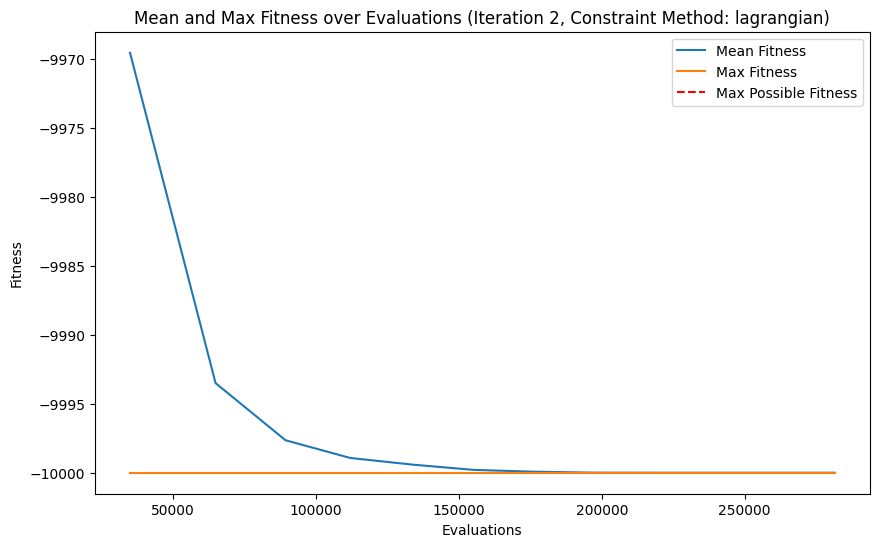

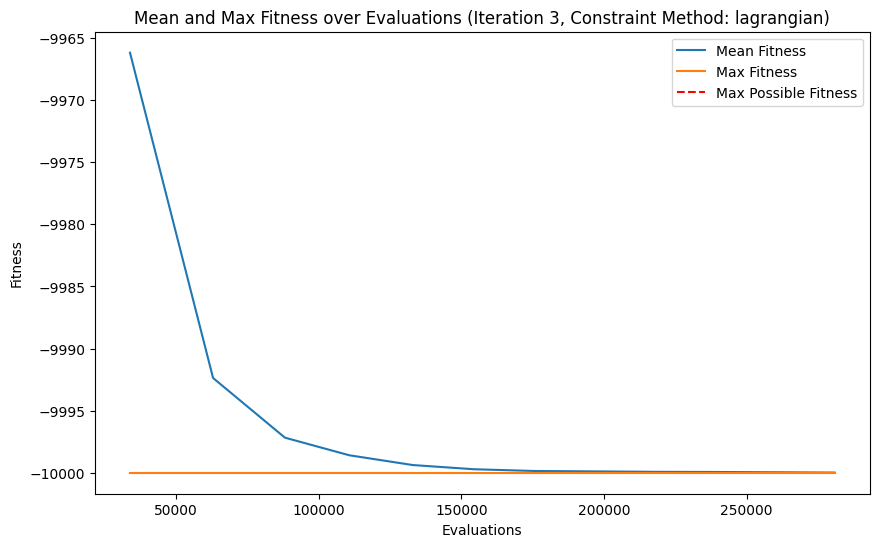

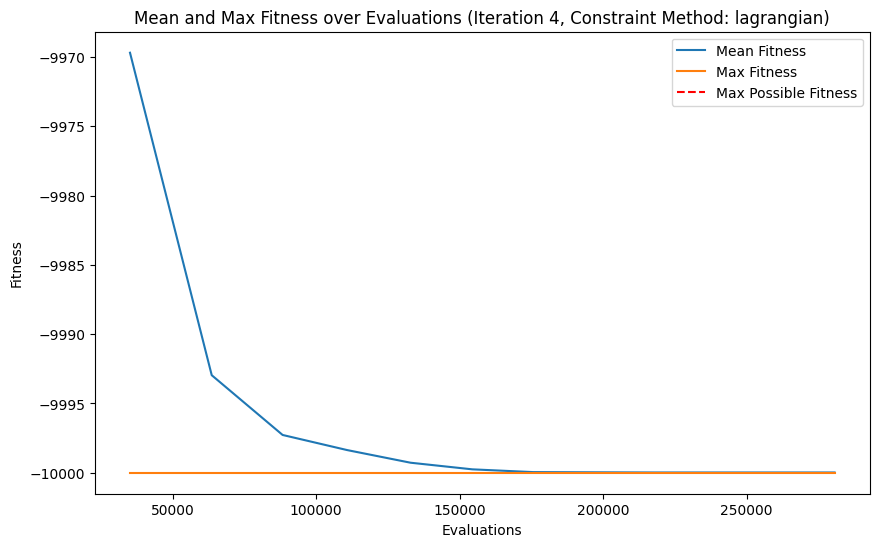

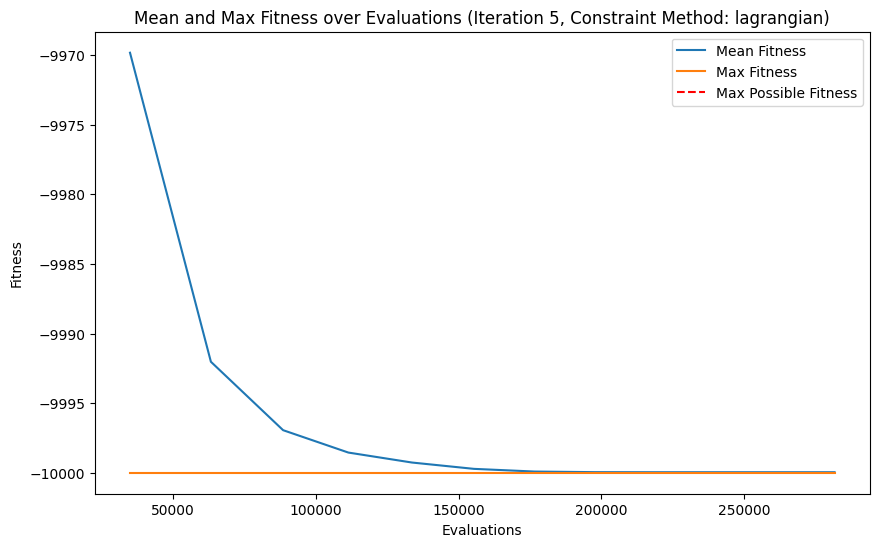

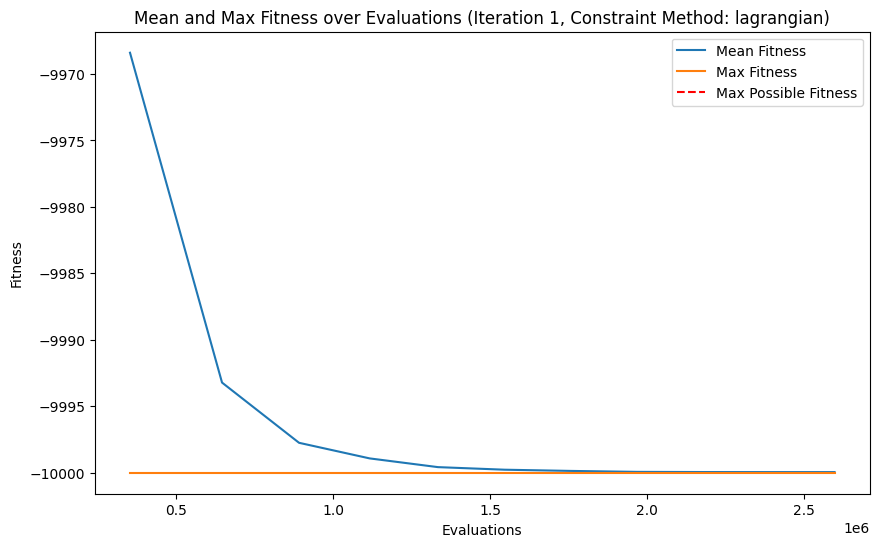

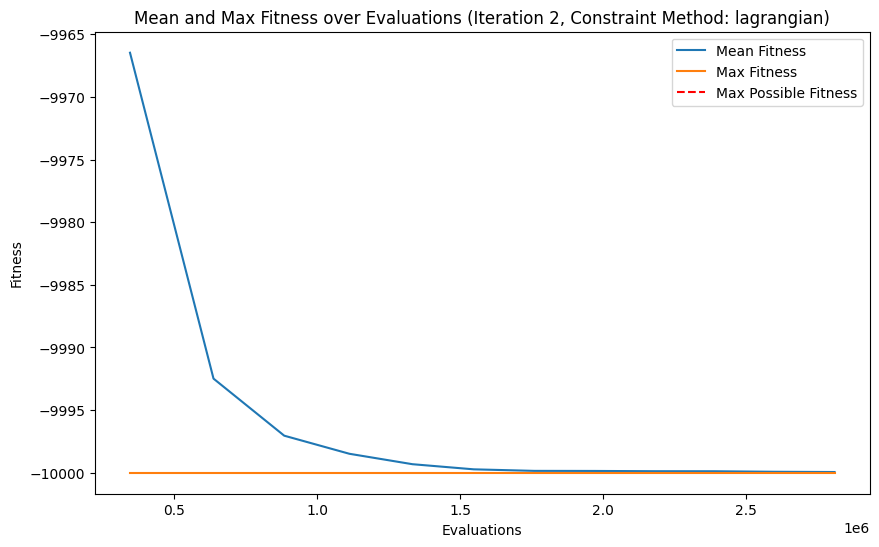

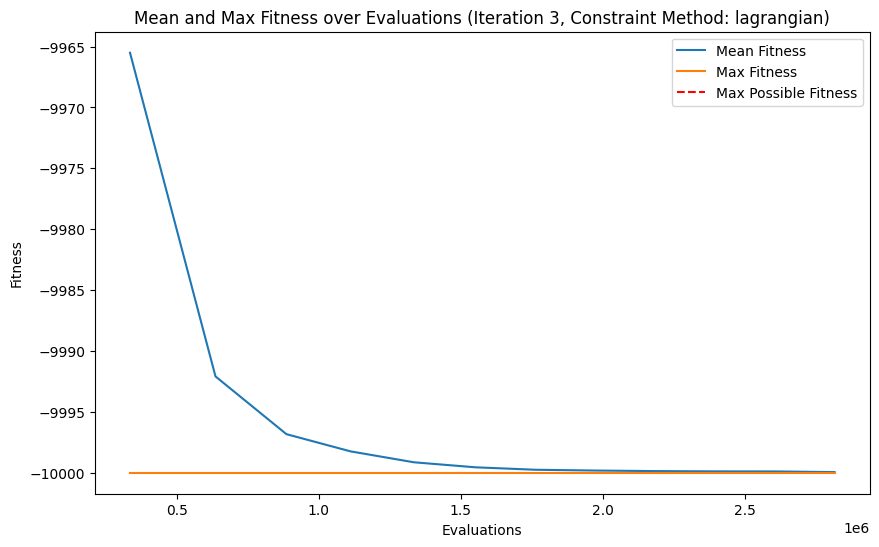

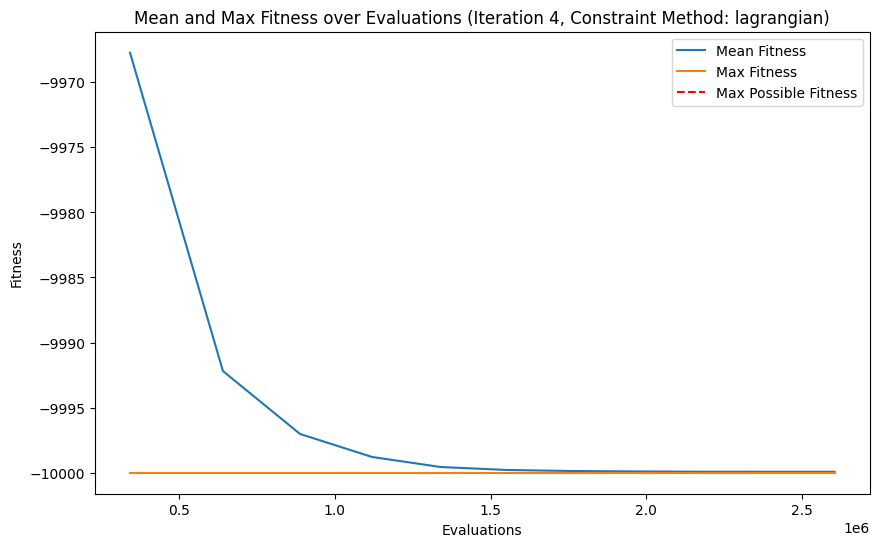

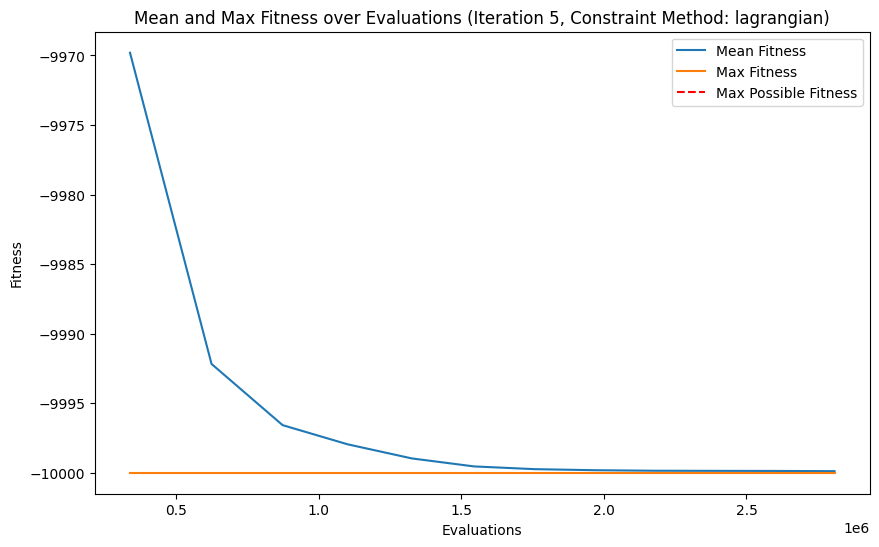

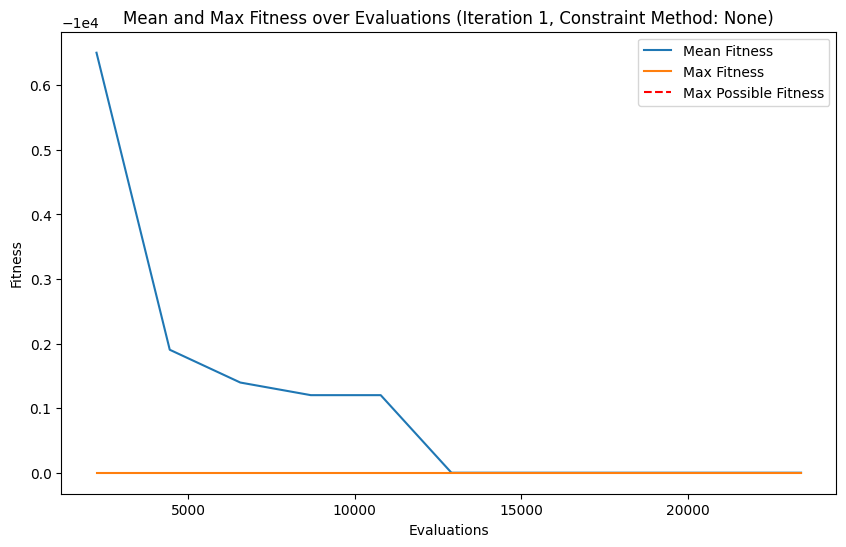

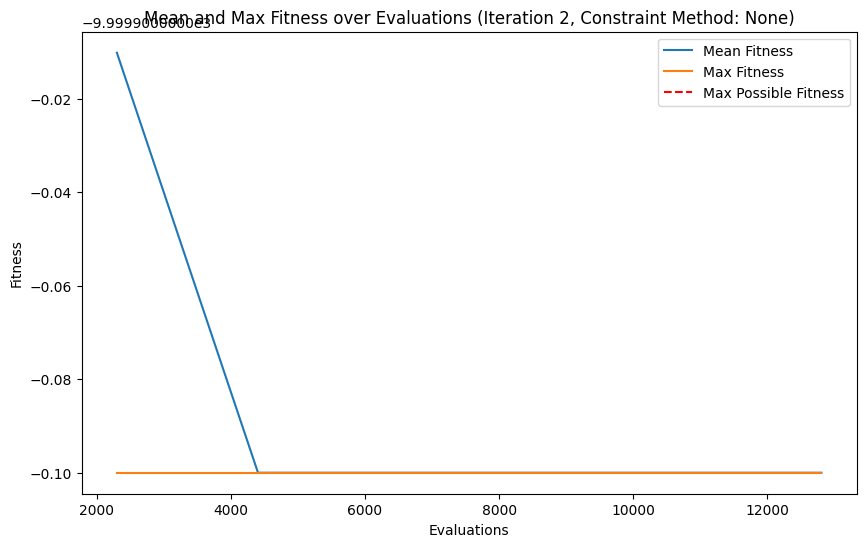

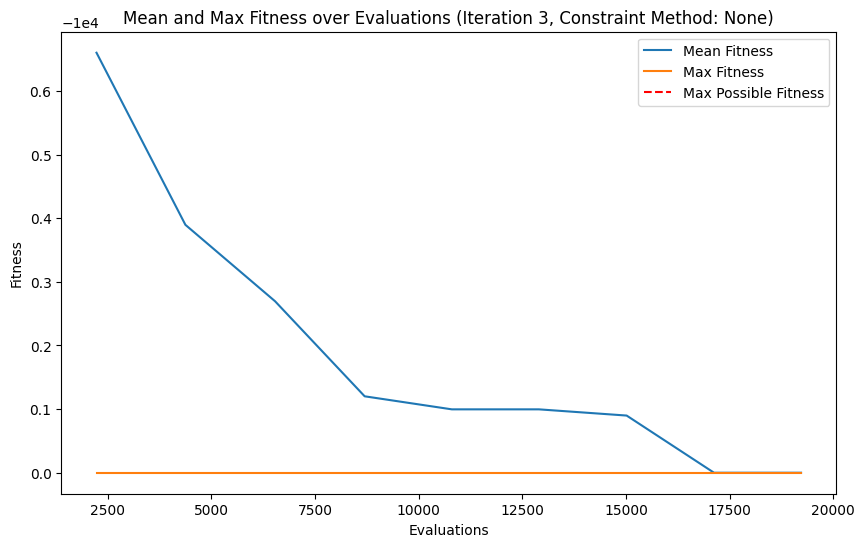

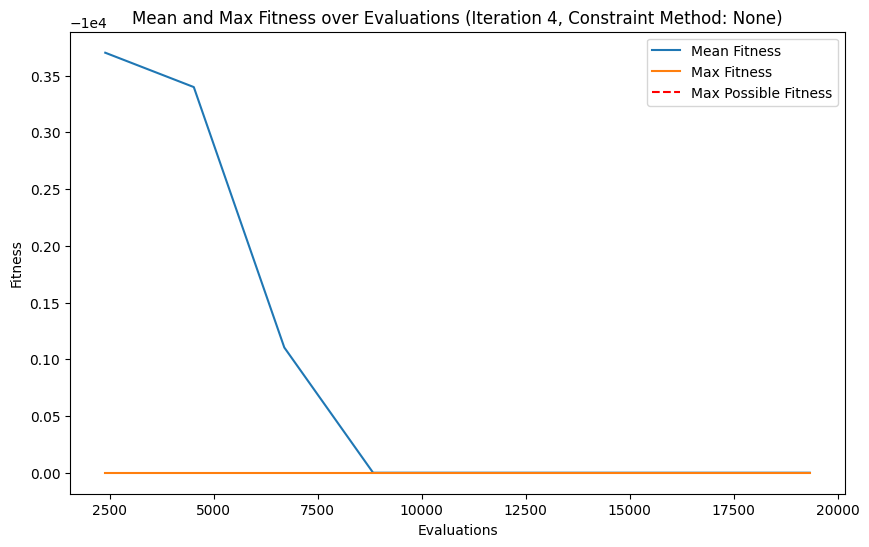

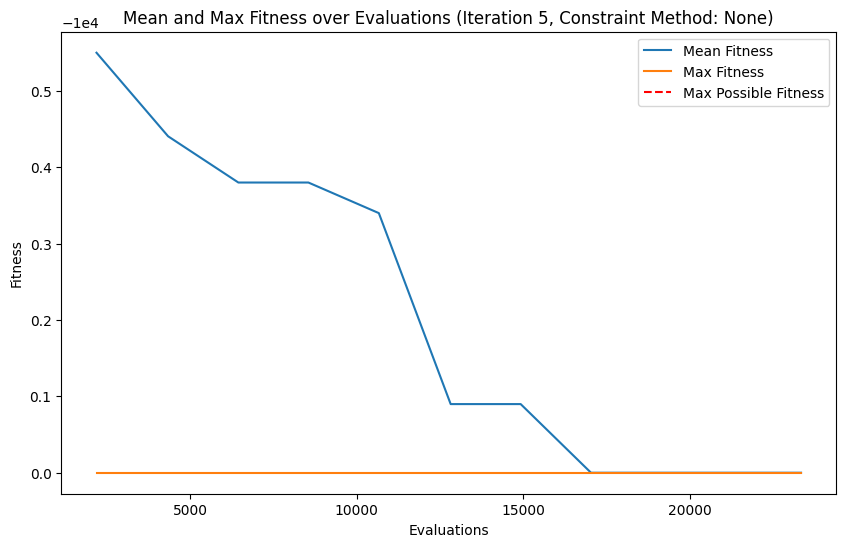

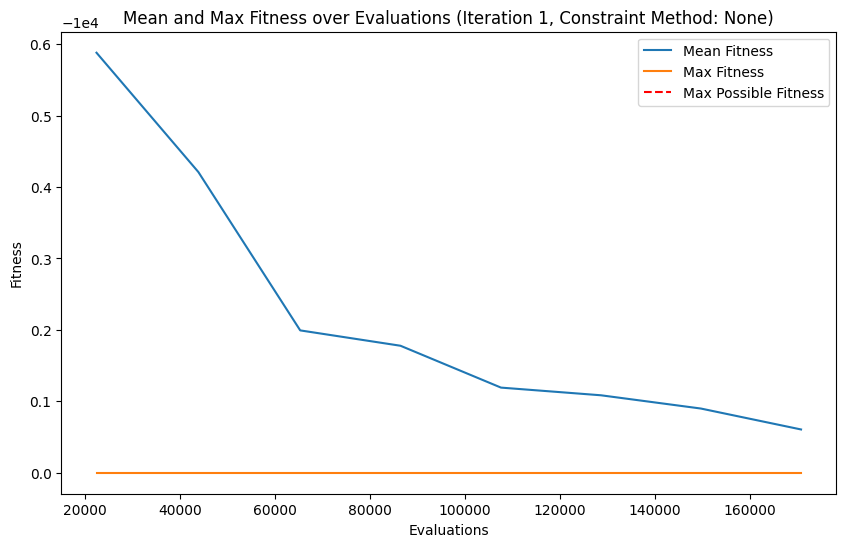

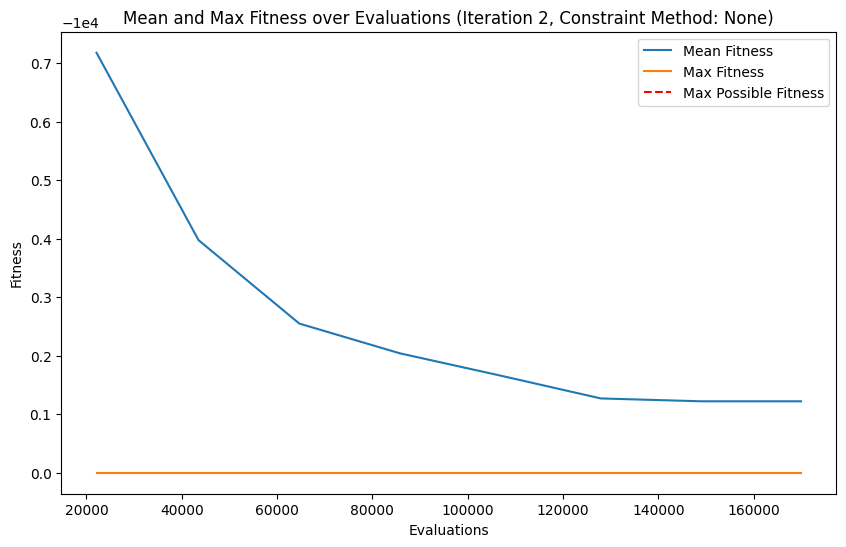

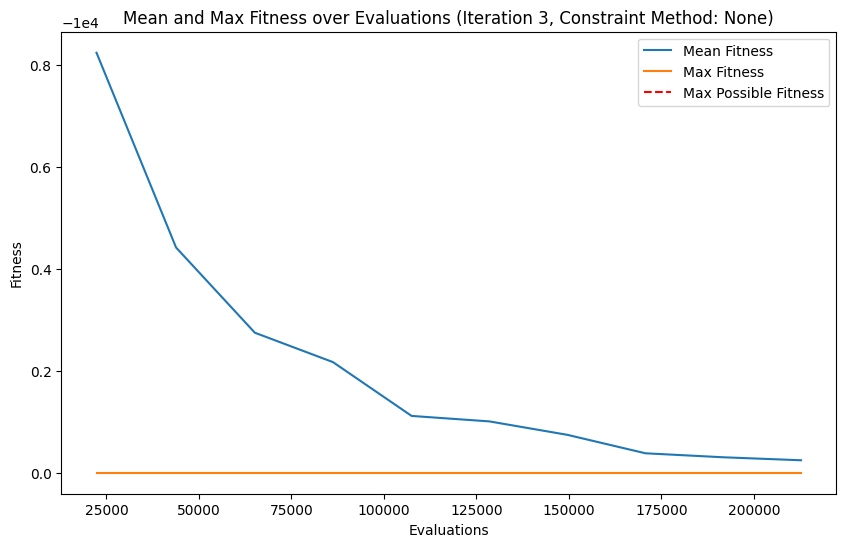

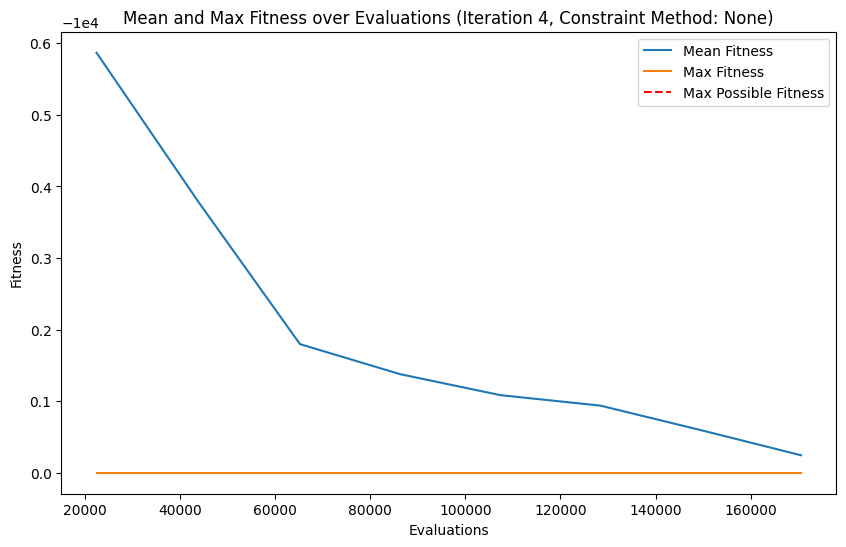

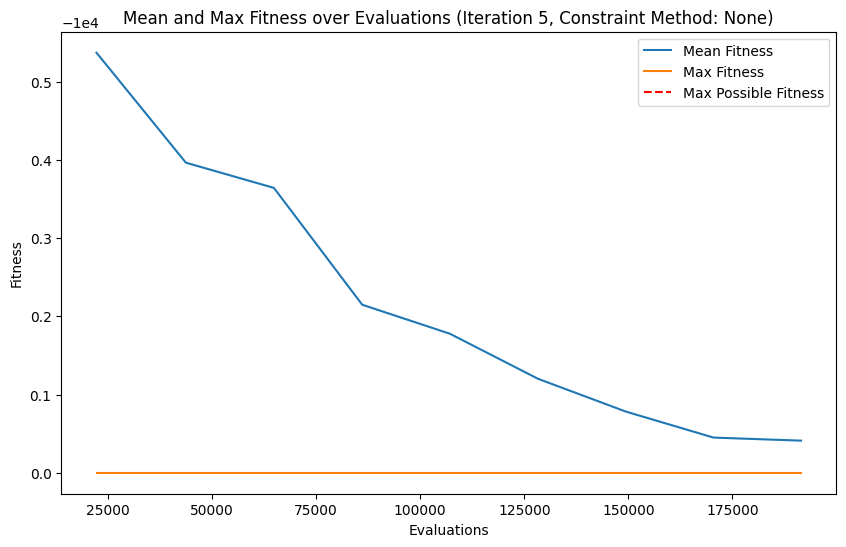

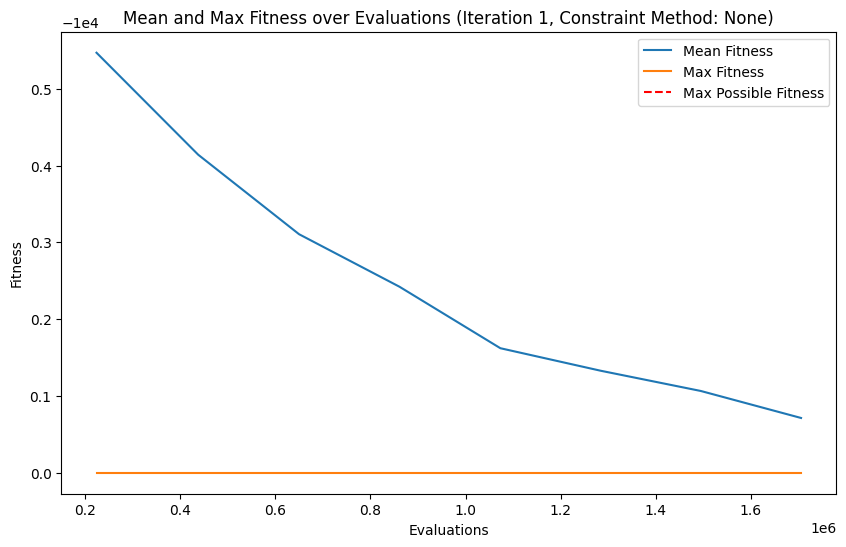

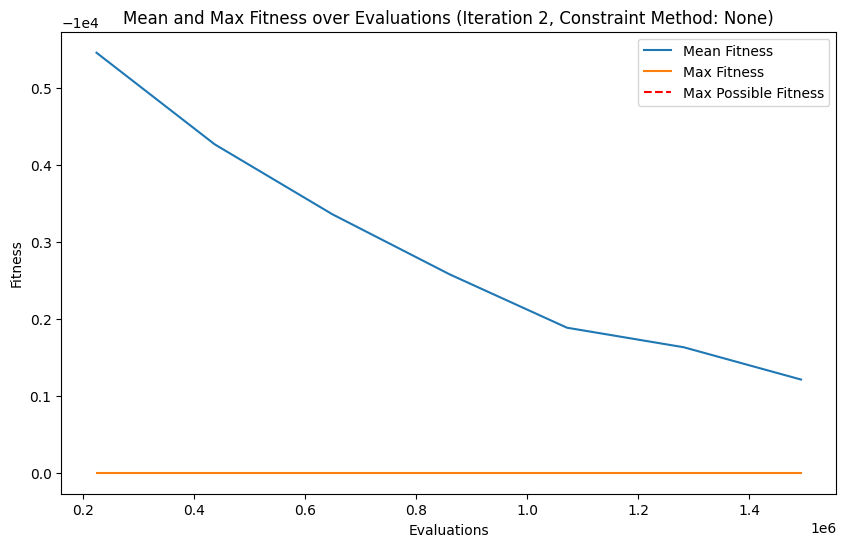

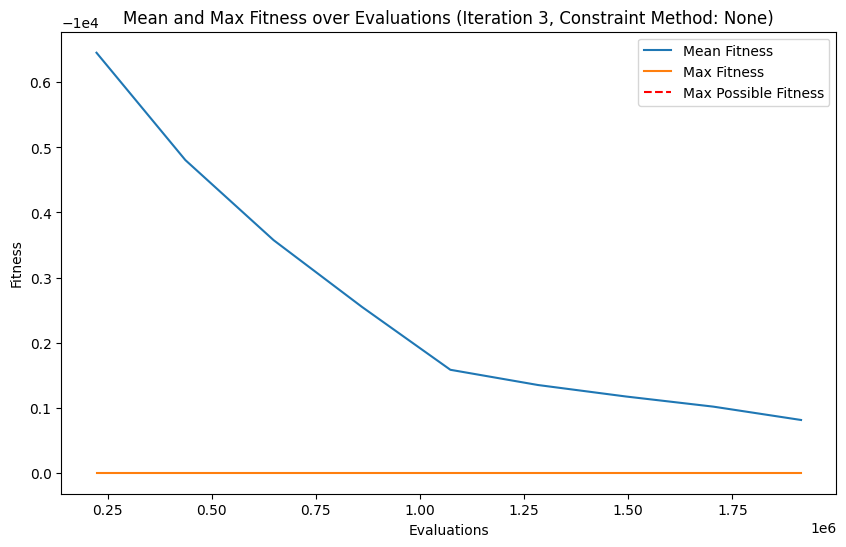

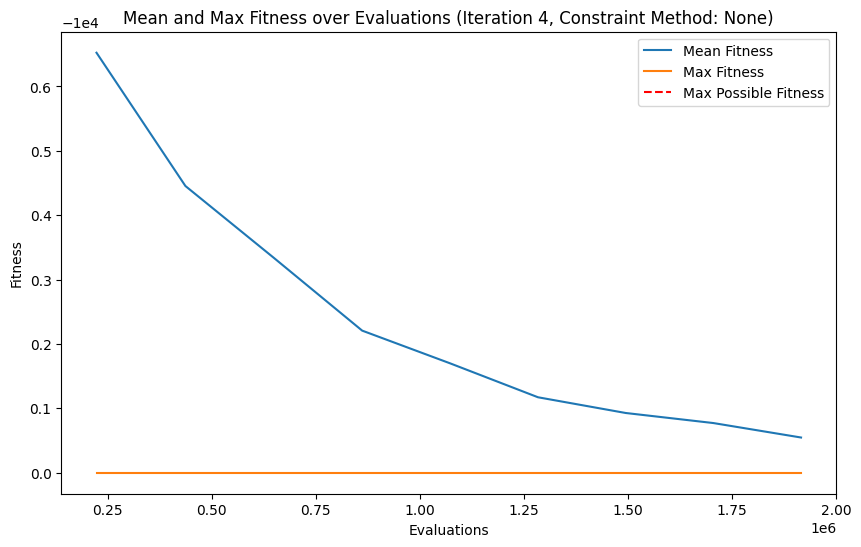

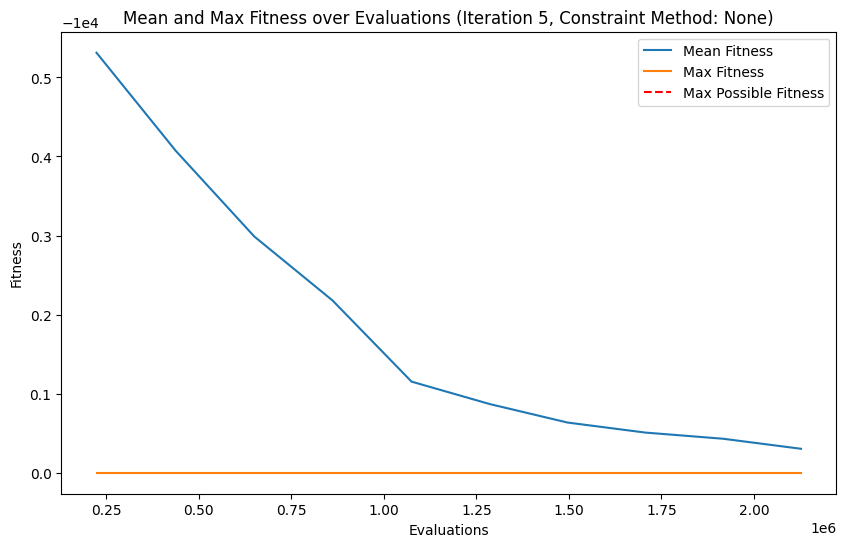

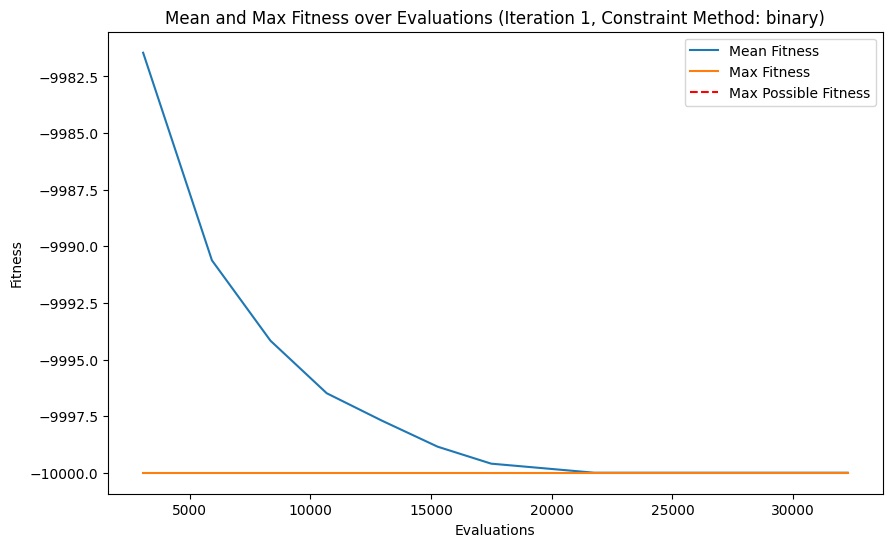

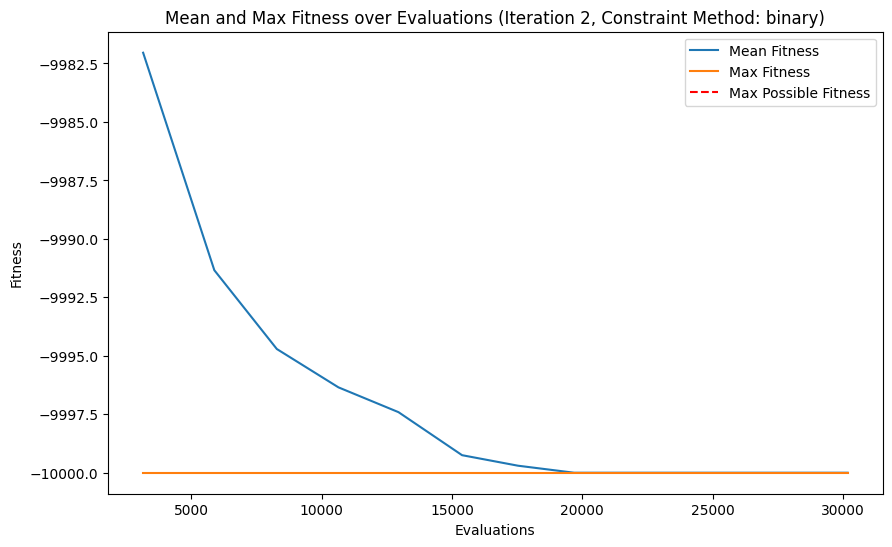

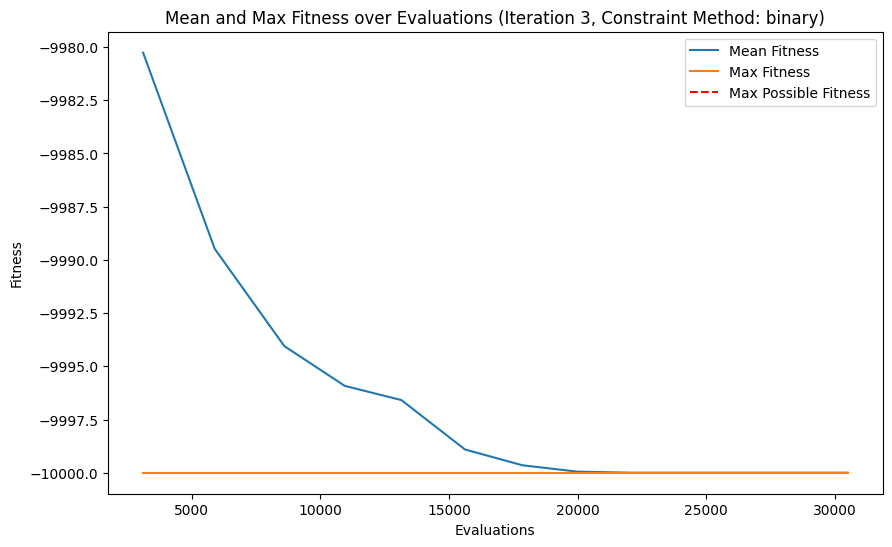

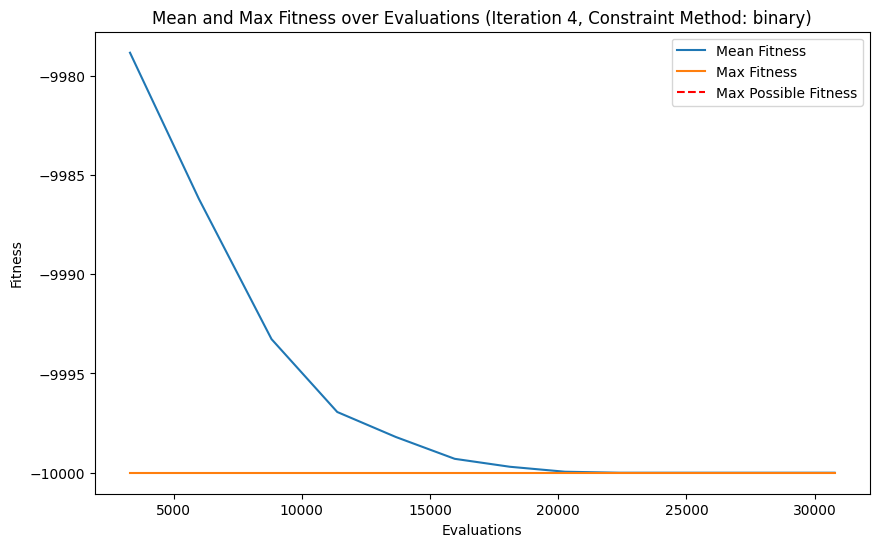

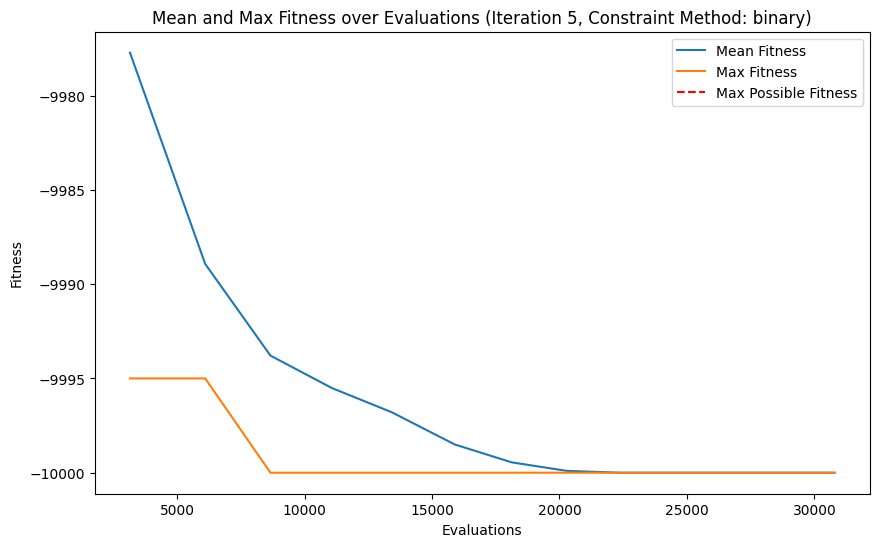

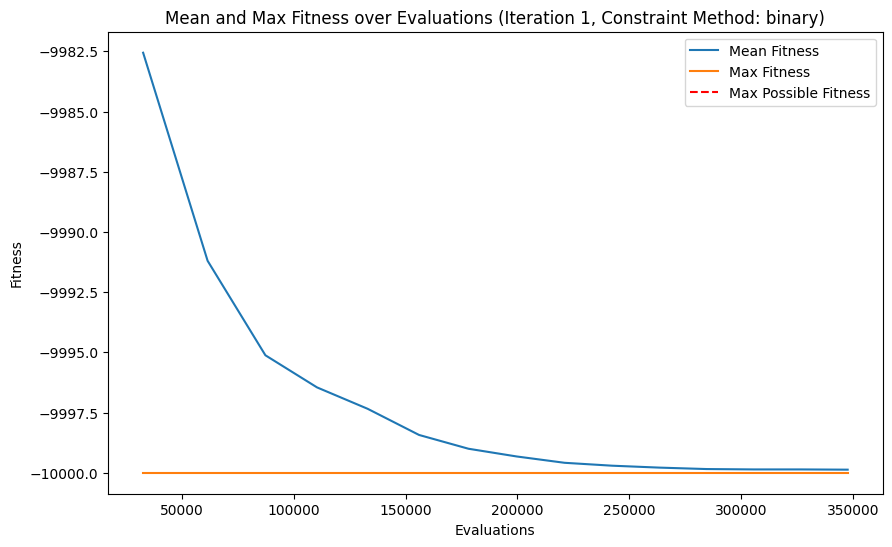

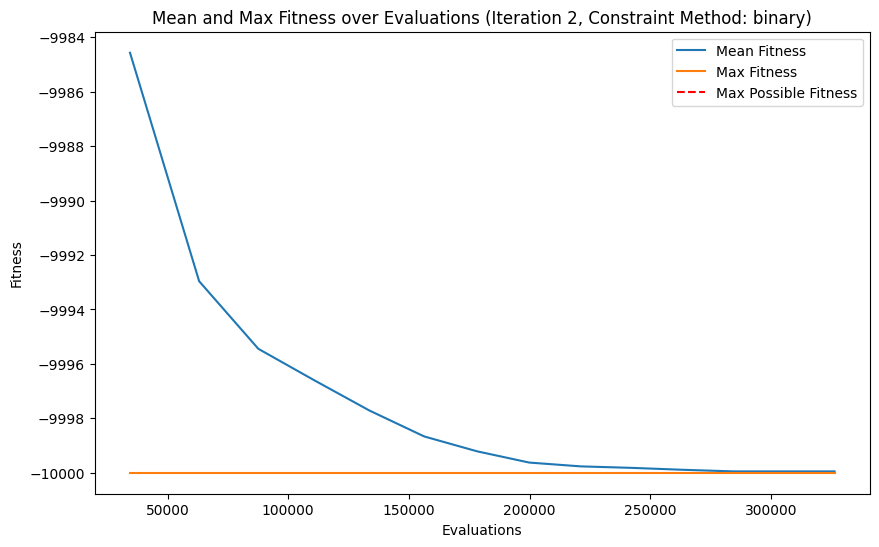

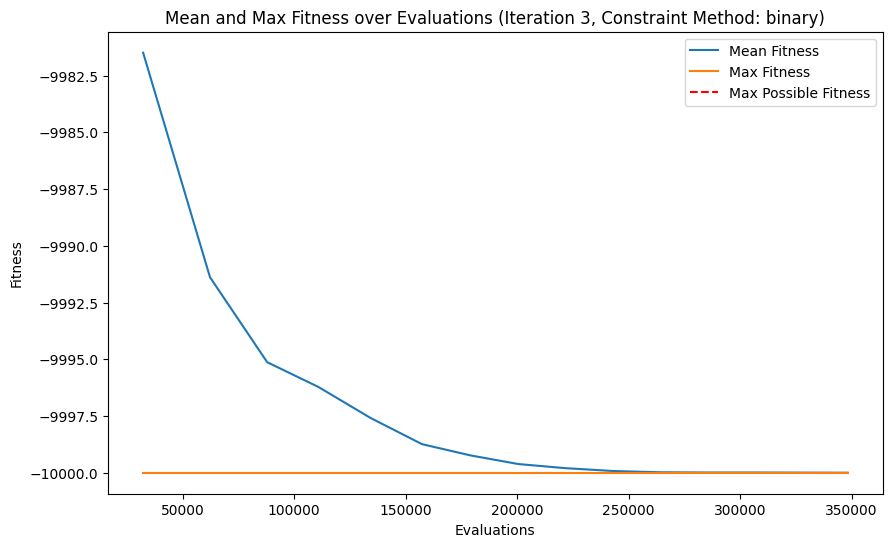

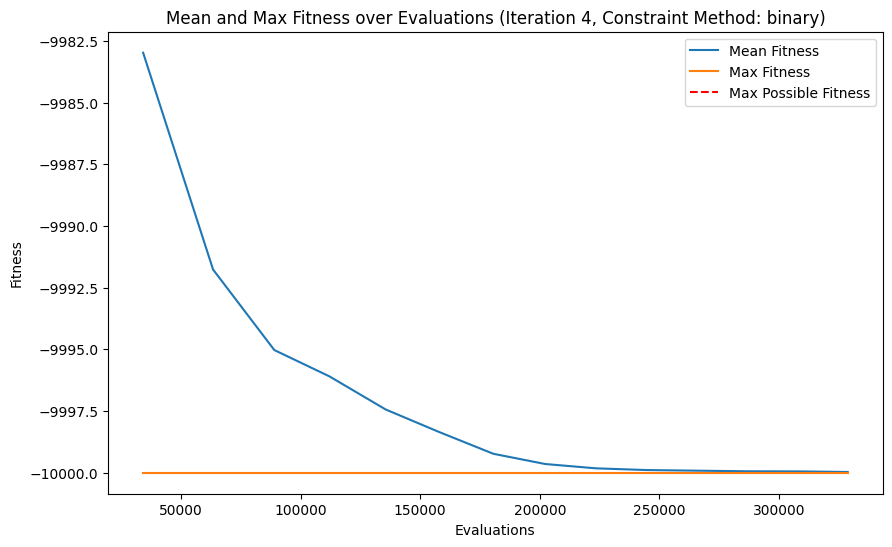

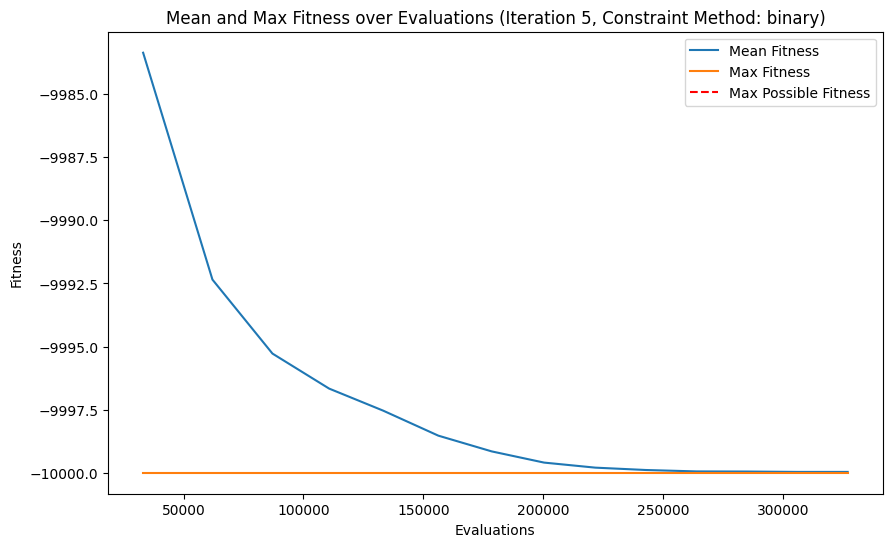

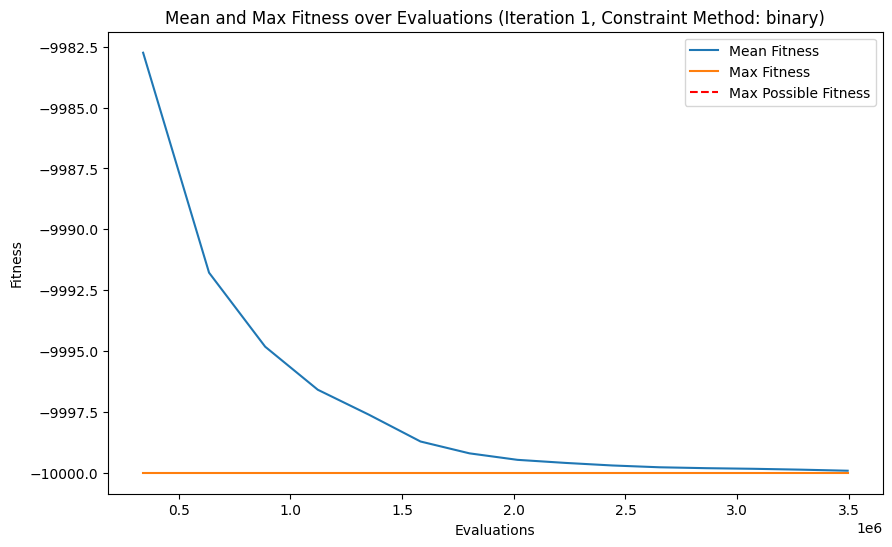

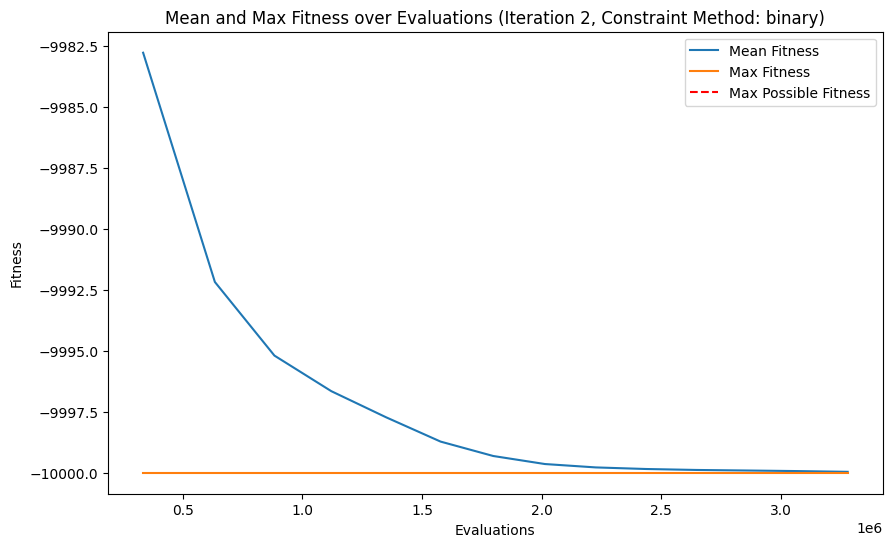

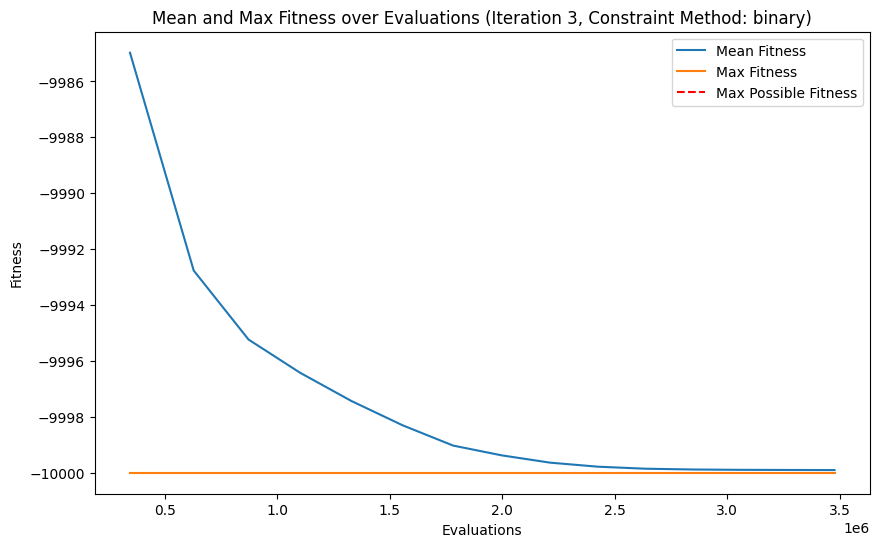

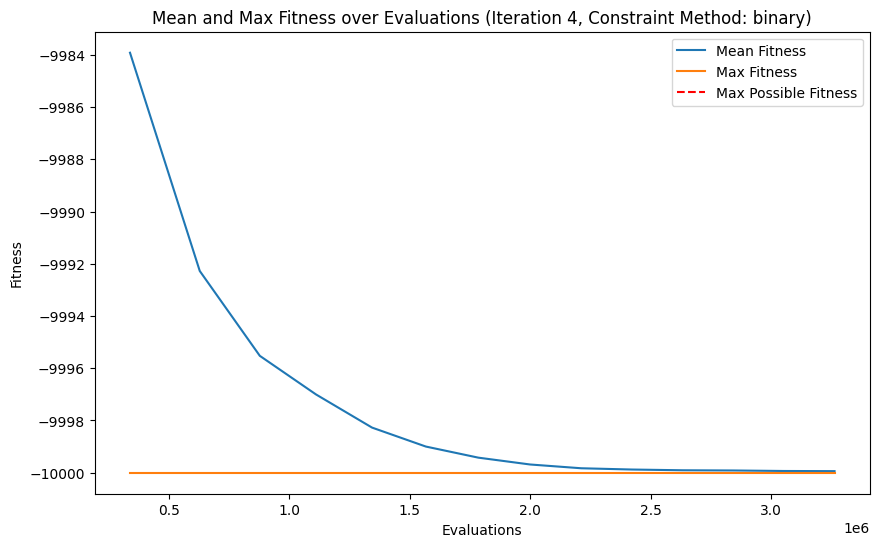

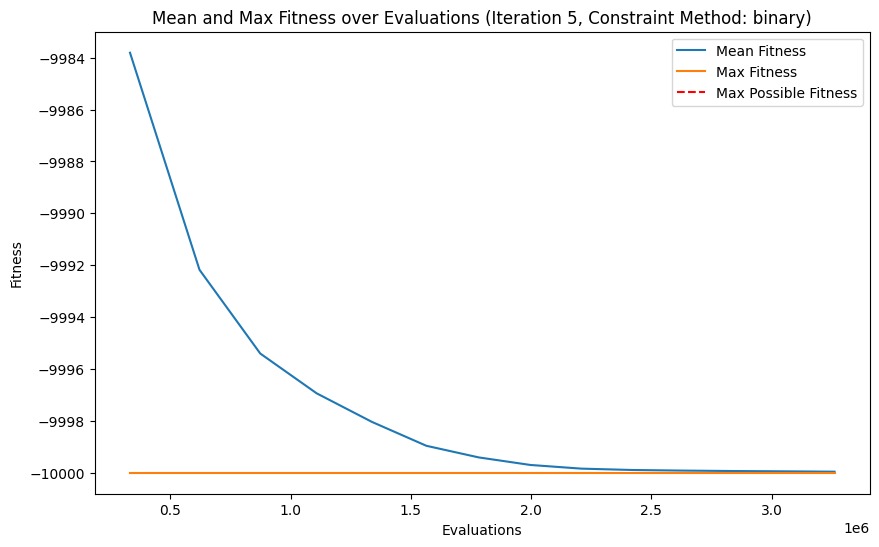

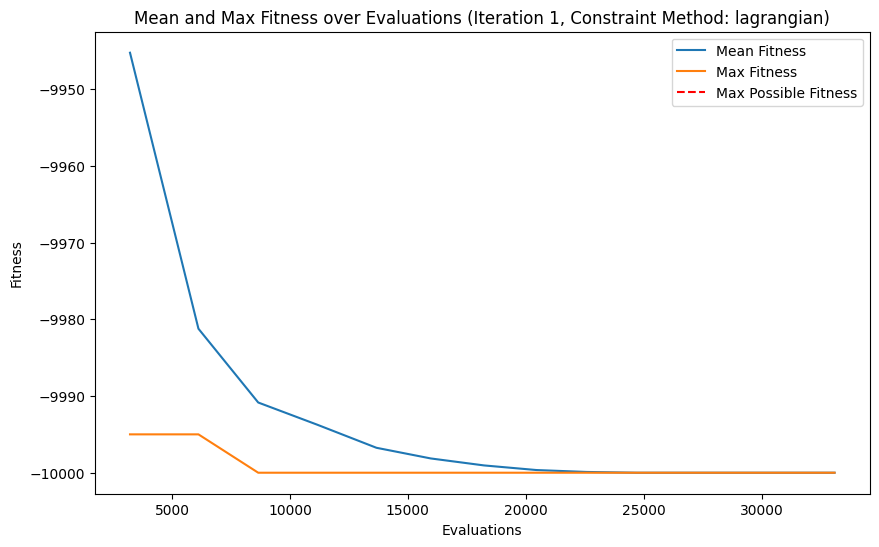

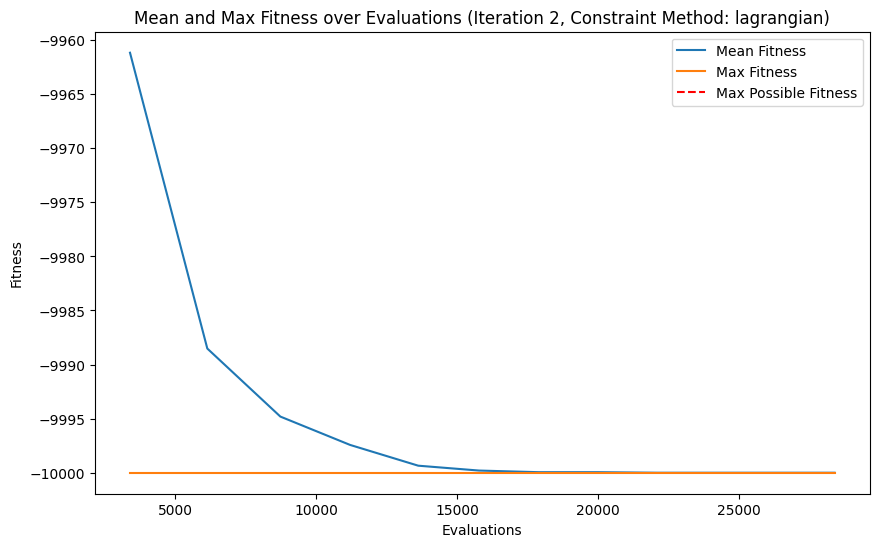

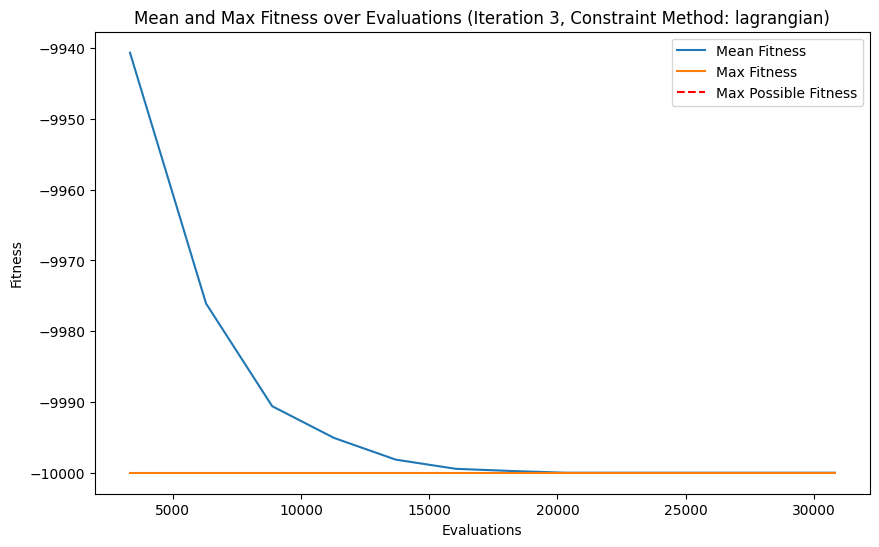

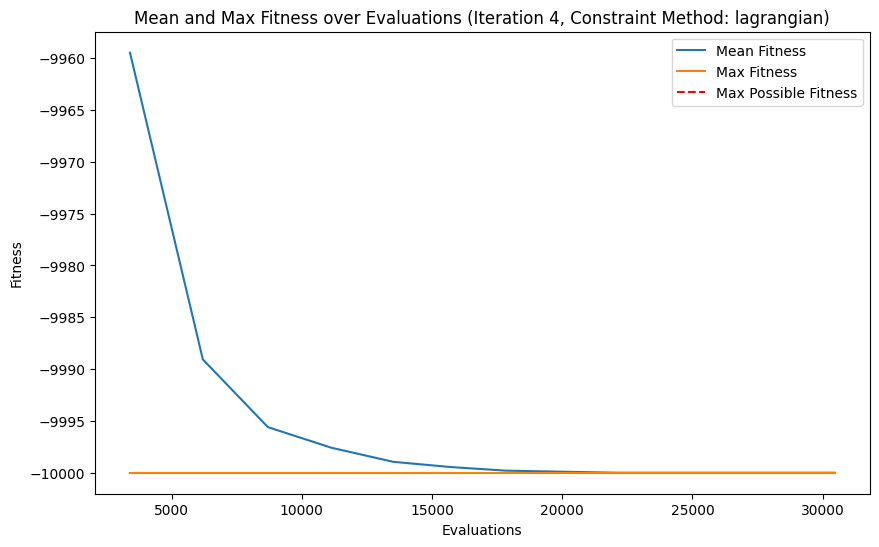

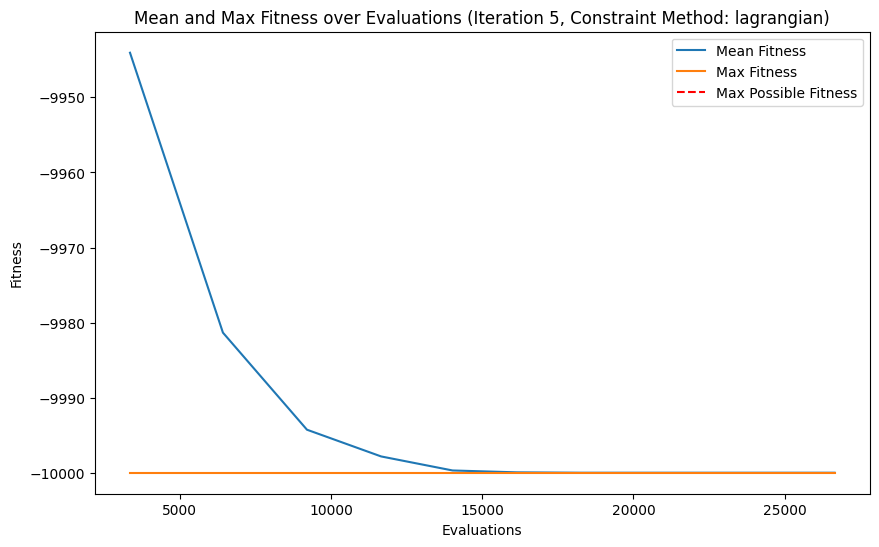

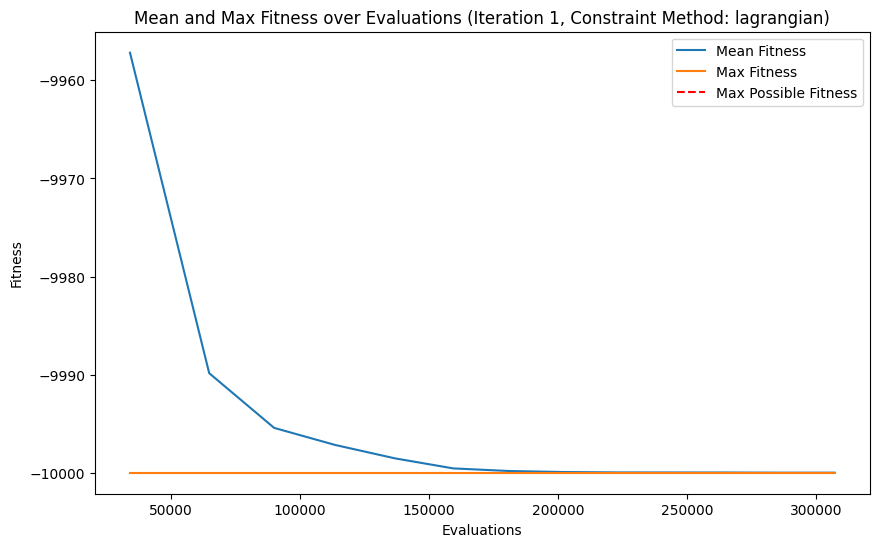

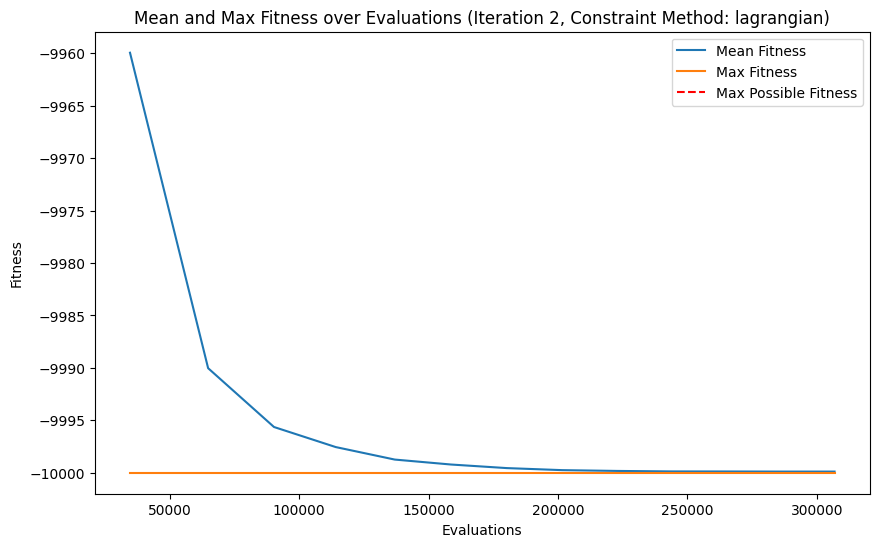

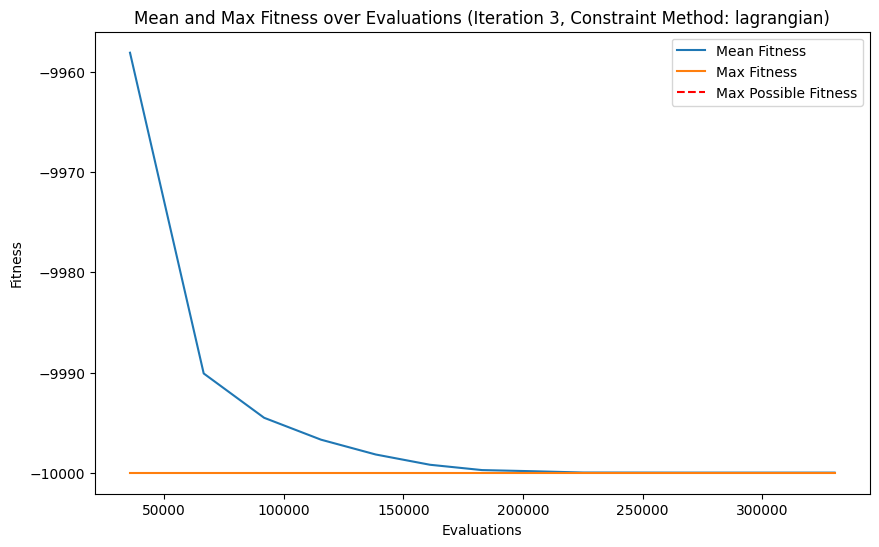

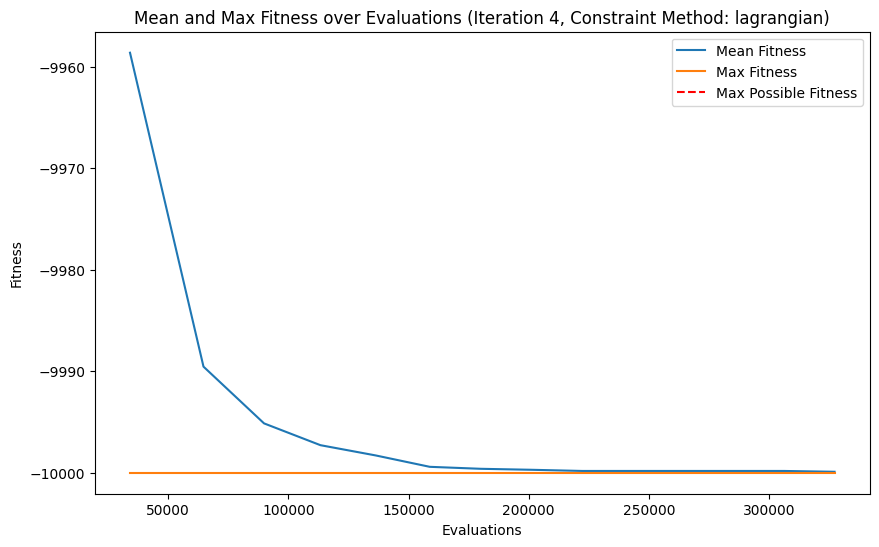

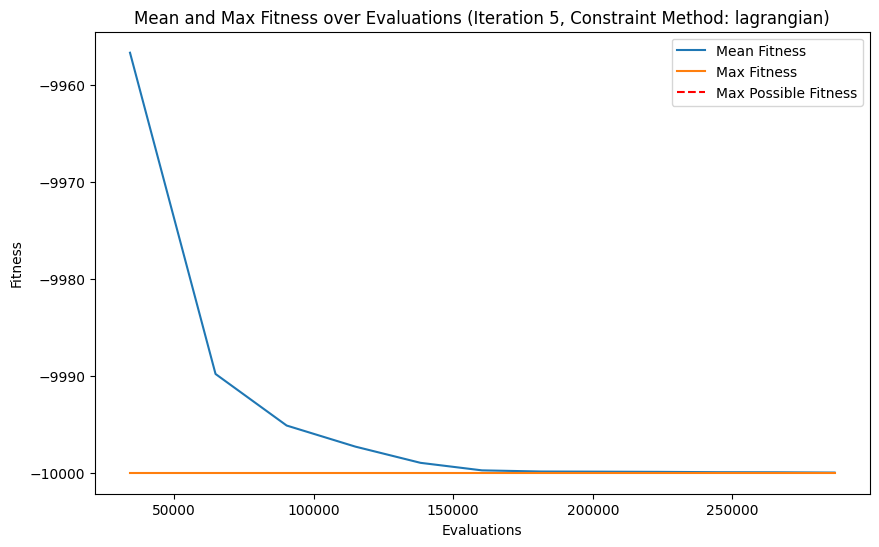

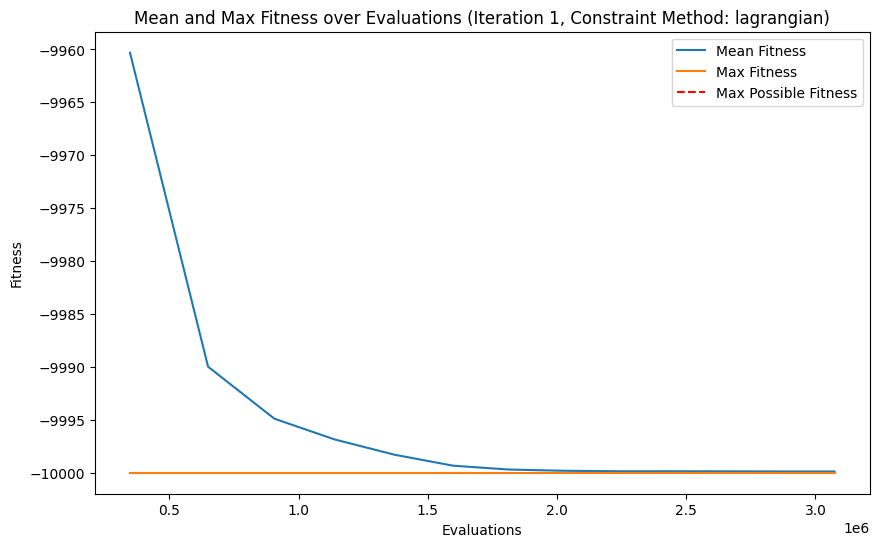

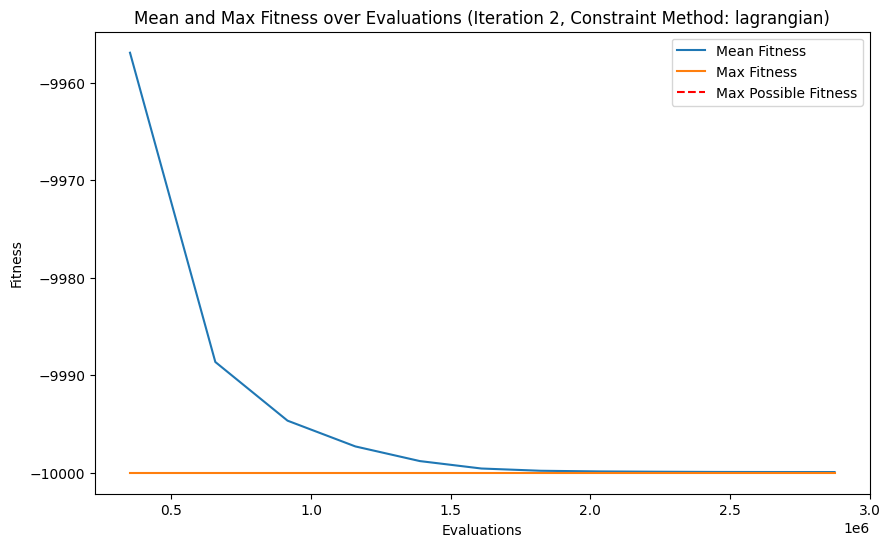

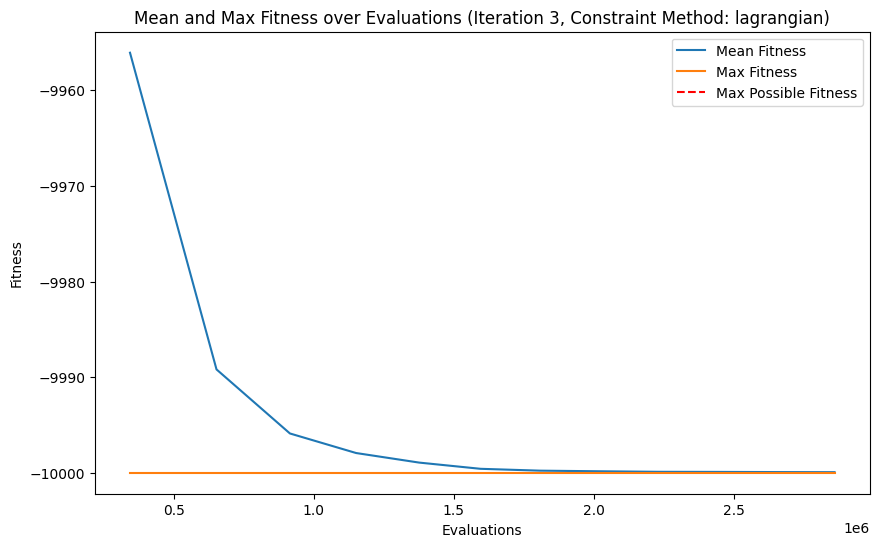

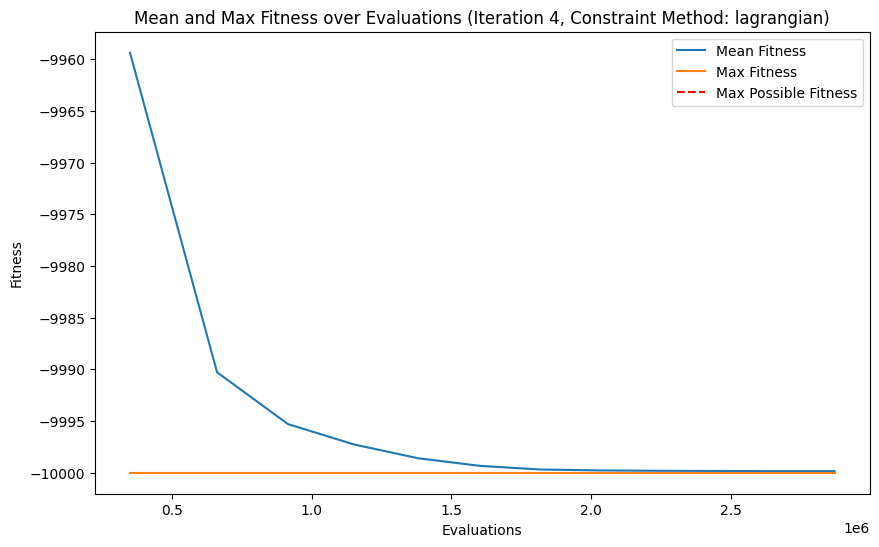

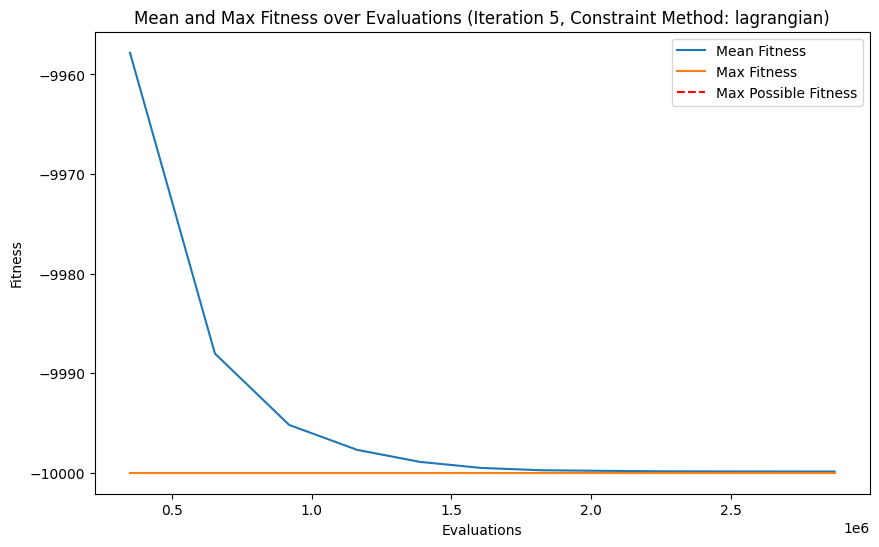

In [6]:
for dataset in datasets:
    for constraint_method in constraint_methods:  # Updated variable name
        for pop_size in pop_size_options:
            # Load jobs
            json_file = f'../data/ssjsp/{dataset}.json'
            jobs = load_jobs_from_json(json_file)

            # Set problem size based on the dataset
            file_paths = [f'../data/qubo/{dataset}.txt']
            problem_size = len(jobs)
            base_params['problem_size'] = problem_size
            base_params['pop_size'] = pop_size
            base_params['constraint_method'] = constraint_method

            print(f"\nStarting experiments for dataset {dataset} with population size {pop_size} and constraint method {constraint_method}")

            # Define a group name for the experiment
            group_name = f"{dataset}_popsize_{pop_size}_constraint_{constraint_method}"

            for iteration in range(num_iterations):
                unique_id = uuid.uuid4().hex  # Generate a unique ID for the pair

                print(f"Iteration {iteration + 1}/{num_iterations} for {dataset}, constraint method: {constraint_method}, population size: {pop_size}")

                if use_wandb:
                    wandb.init(
                        project="Deep Optimization with Constraints",
                        group=group_name,  # Grouping experiments
                        tags=[problem_type, f"constraint_method={constraint_method}", f"id={unique_id}"],
                        name=f"{dataset}_run_{iteration + 1}_{constraint_method}"
                    )
                    wandb.config.update(base_params)
                    wandb.log_artifact(json_file, type='dataset')

                if problem_type == 'QUBO':
                    problem = QUBO(file_paths[0], base_params['problem_instance_id'], device)
                    if base_params['constraint_method']:
                        problem.jobs = jobs
                elif problem_type == 'MKP':
                    problem = MKP(file_paths[0], file_paths[1], base_params['problem_instance_id'], device)
                else:
                    raise ValueError("Unsupported problem type")

                model = DOAE(base_params['problem_size'], base_params['dropout_prob'], device)
                handler = OptimAEHandler(model, problem, device)

                population, fitnesses = handler.generate_population(base_params['pop_size'], base_params['constraint_method'], base_params['penalty_mult'])
                population, fitnesses, _, _ = handler.hilldescent(population, fitnesses, base_params['change_tolerance'], base_params['constraint_method'], base_params['penalty_mult'])
                handler.print_statistics_min(fitnesses)

                total_eval = 0
                depth = 0

                mean_fitnesses = []
                min_max_fitnesses = []
                total_evaluations = []
                mean_fitness_changes = []

                while True:
                    if depth < base_params['max_depth']:
                        hidden_size = round(base_params['problem_size'] * base_params['compression_ratio'])
                        model.transition(hidden_size)
                        depth += 1
                        optimizer = torch.optim.Adam(model.parameters(), lr=base_params['learning_rate'], weight_decay=base_params['l2_coef'])
                    
                    handler.learn_from_population(population, optimizer, l1_coef=base_params['l1_coef'], batch_size=base_params['pop_size'])
                    
                    population, fitnesses, evaluations, done = handler.optimise_solutions_min(
                        population, fitnesses, base_params['change_tolerance'], encode=base_params['encode'], repair_solutions=base_params['repair_solutions'], deepest_only=base_params['deepest_only'], 
                        check_constraints=base_params['constraint_method'], penalty_mult=base_params['penalty_mult']
                    )
                    handler.print_statistics_min(fitnesses)

                    mean_fitness = fitnesses.mean().item()
                    min_max_fitness = fitnesses.min().item()
                    total_eval += evaluations

                    mean_fitnesses.append(mean_fitness)
                    min_max_fitnesses.append(min_max_fitness)
                    total_evaluations.append(total_eval)

                    print(f"Iteration {iteration + 1}, Depth {depth}, Evaluations: {total_eval}, Mean Fitness: {mean_fitness:.4f}, Min Fitness: {min_max_fitness:.4f}")

                    if use_wandb:
                        wandb.log({
                            "mean_fitness": mean_fitness,
                            "min_max_fitness": min_max_fitness,
                            "total_eval": total_eval,
                            "depth": depth,
                            "current_iteration": iteration + 1,
                            "population_size": pop_size,
                            "constraint_method": constraint_method,
                            "dataset": dataset,
                        })

                    if len(mean_fitnesses) > 1:
                        mean_fitness_change = abs(mean_fitnesses[-1] - mean_fitnesses[-2])
                        mean_fitness_changes.append(mean_fitness_change)
                        
                        if len(mean_fitness_changes) >= base_params['patience']:
                            recent_changes = mean_fitness_changes[-base_params['patience']:]
                            if all(change < base_params['delta_mean_population'] for change in recent_changes):
                                break
                    
                    if done:
                        break

                plt.figure(figsize=(10, 6))
                plt.plot(total_evaluations, mean_fitnesses, label='Mean Fitness')
                plt.plot(total_evaluations, min_max_fitnesses, label='Max Fitness')
                plt.axhline(y=problem.max_fitness, color='r', linestyle='--', label='Max Possible Fitness')
                plt.xlabel('Evaluations')
                plt.ylabel('Fitness')
                plt.title(f'Mean and Max Fitness over Evaluations (Iteration {iteration + 1}, Constraint Method: {constraint_method})')
                plt.legend()

                if use_wandb:
                    wandb.log({"fitness_plot": wandb.Image(plt)})

                solutions = get_solutions(population, fitnesses, mode='low')
                total_feasible_solutions = 0
                total_infeasible_solutions = 0
                logs = []

                for i, solution in enumerate(solutions):
                    feasible, infeasible_jobs, makespans = check_constraints(solution, jobs)
                    if feasible:
                        total_feasible_solutions += 1
                    else:
                        total_infeasible_solutions += 1
                    
                    logs.append({
                        'solution_number': i + 1,
                        'feasible': feasible,
                        'infeasible_jobs': infeasible_jobs,
                        'makespans': makespans
                    })

                print(f"Completed Iteration {iteration + 1} for dataset {dataset} with constraint method {constraint_method}.")
                print(f'Total feasible solutions: {total_feasible_solutions}')
                print(f'Total infeasible solutions: {total_infeasible_solutions}')

                if use_wandb:
                    wandb.log({
                        'solutions': logs,
                        'total_feasible_solutions_count': total_feasible_solutions,
                        'total_infeasible_solutions': total_infeasible_solutions
                    })

                if use_wandb:
                    wandb.finish()

In [7]:
'aaaa'

'aaaa'